In [3]:
import pandas as pd
import re

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    """
    تابعی برای ایجاد کلید مرتب‌سازی برای نام ستون‌های تاریخ فارسی.
    مثال: "فروردین 96" -> (96, 0)
           "مرداد 103" -> (103, 4)
    """
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        # نرمال سازی سال های دو رقمی به چهار رقمی برای جلوگیری از ابهام در مرتب سازی بلند مدت
        # البته با توجه به بازه 96 تا 103، مرتب سازی عددی سال به تنهایی کافی است.
        # if year < 90: # فرض بر اینکه سال های زیر 90 مربوط به 14xx هستند
        #     year += 1400
        # else: # فرض بر اینکه سال های 90 به بالا مربوط به 13xx هستند
        #     year += 1300
        # با توجه به اینکه کاربر سالها را به صورت "96" و "103" مشخص کرده، به نظر میرسد منظور همان سالهای شمسی بدون قرن است.
        # برای بازه "96" تا "103", مرتب سازی عددی مستقیم سال صحیح خواهد بود.

        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    # اگر فرمت ستون با فرمت مورد انتظار مطابقت نداشته باشد، آن را در انتها قرار می دهیم
    return (float('inf'), float('inf'))

try:
    # خواندن فایل CSV
    # فرض بر این است که ردیف اول فایل، نام ستون‌ها (تاریخ‌ها) است و ستون اول، نام معیارهاست.
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')


    #print("اطلاعات اولیه فایل خوانده شده:")
    #print(f"تعداد کل ردیف‌ها: {df.shape[0]}, تعداد کل ستون‌ها: {df.shape[1]}")
    #print("ستون‌های شناسایی شده (قبل از مرتب‌سازی):", df.columns.tolist())
    #print("-" * 50)

    # مرتب‌سازی ستون‌ها بر اساس تاریخ
    sorted_columns = sorted(df.columns, key=get_sort_key)
    df = df[sorted_columns]

    #print("ستون‌های شناسایی شده (بعد از مرتب‌سازی):", df.columns.tolist())
    #print("-" * 50)

    # انتخاب ۱۰ ردیف اول که داده‌های کامل دارند
    df_processed = df.head(10).copy() # .copy() برای جلوگیری از SettingWithCopyWarning

    #print(f"داده‌ها پس از انتخاب ۱۰ ردیف اول (ابعاد: {df_processed.shape}):")
    #print(df_processed.head())
    #print("-" * 50)

    # پاک‌سازی و تبدیل داده‌ها به نوع عددی
    # این بخش تلاش می‌کند کاماها را حذف کرده و مقادیر را به عدد تبدیل کند
    # ممکن است نیاز به تنظیمات بیشتری بر اساس نوع دقیق داده‌های شما داشته باشد
    for col in df_processed.columns:
        if df_processed[col].dtype == 'object':
            # حذف کاراکترهای غیر عددی (به جز نقطه برای اعشار و علامت منفی)
            # ابتدا کاماها را حذف می‌کنیم
            df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
            # سپس تلاش برای تبدیل به عدد
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

    #print("اطلاعات داده‌ها پس از پاک‌سازی و تبدیل به نوع عددی:")
    #df_processed.info()
    #print("-" * 50)

    #print("نمونه‌ای از داده‌های پردازش شده (۵ ردیف و ۵ ستون اول):")
    #print(df_processed.iloc[:5, :5])
    #print("-" * 50)

    print("فایل با موفقیت خوانده، مرتب و داده‌های اولیه آن پاک‌سازی شد.")
    print("دیتافریم 'df_processed' آماده برای تحلیل و رسم نمودار است.")

except FileNotFoundError:
    print(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید.")
except pd.errors.EmptyDataError:
    print(f"خطا: فایل '{file_path}' خالی است.")
except Exception as e:
    print(f"خطای دیگری رخ داد: {e}")

فایل با موفقیت خوانده، مرتب و داده‌های اولیه آن پاک‌سازی شد.
دیتافریم 'df_processed' آماده برای تحلیل و رسم نمودار است.


In [2]:
df_processed

فروردین 96   اردیبهشت 96      خرداد 96        تیر 96  \
قیمت(تومان)        4.370000e+06  4.530000e+06  4.560000e+06  4.620000e+06   
تعداد معاملات      5.384000e+03  1.637400e+04  1.536200e+04  1.453300e+04   
رشد تعداد معاملات  8.500000e+00  6.400000e+00  8.000000e-01  2.500000e+00   
شاخص اجاره         1.096000e+02  1.090000e+02  1.097000e+02  1.073000e+02   
رشد شاخص اجاره     1.110000e+01  1.150000e+01  1.100000e+01  1.100000e+01   
نرخ ارز(ریال)      3.700000e+04  3.700000e+04  3.700000e+04  3.700000e+04   
CPI                1.071000e+02  1.071000e+02  1.078000e+02  1.075000e+02   
P/R                3.987226e+04  4.155963e+04  4.156791e+04  4.305685e+04   
P/ER               1.181081e+03  1.224324e+03  1.232432e+03  1.248649e+03   
P/CPI              4.080299e+04  4.229692e+04  4.230056e+04  4.297674e+04   

                      مرداد 96      شهریور 96       مهر 96       آبان 96   \
قیمت(تومان)        4.670000e+06  4.760000e+06  4.790000e+06  4.890000e+06   
تعداد معاملات      1.798400e+04  1.554500e+04  1.381500e+04  1.476400e+04   
رشد تعداد معاملات  6.100000e+00  9.200000e+00  7.200000e+00  7.500000e+00   
شاخص اجاره         1.075000e+02  1.070000e+02  1.082000e+02  1.084000e+02   
رشد شاخص اجاره     8.100000e+00  8.600000e+00  6.100000e+00  6.400000e+00   
نرخ ارز(ریال)      3.800000e+04  3.900000e+04  3.550000e+04  3.600000e+04   
CPI                1.077000e+02  1.080000e+02  2.518000e+02  2.539000e+02   
P/R                4.344186e+04  4.448598e+04  4.426987e+04  4.511070e+04   
P/ER               1.228947e+03  1.220513e+03  1.349296e+03  1.358333e+03   
P/CPI              4.336119e+04  4.407407e+04  1.902303e+04  1.925955e+04   

                         آذر 96         دی 96  ...      آبان 102  \
قیمت(تومان)        5.090000e+06  5.240000e+06  ...  6.972000e+07   
تعداد معاملات      1.777600e+04  1.900400e+04  ...  3.593000e+03   
رشد تعداد معاملات  8.400000e+00  8.900000e+00  ...  1.468241e-01   
شاخص اجاره         1.086000e+02  1.088000e+02  ...  1.341036e+02   
رشد شاخص اجاره     6.700000e+00  6.900000e+00  ...  2.000000e+00   
نرخ ارز(ریال)      3.650000e+04  3.700000e+04  ...  3.524300e+05   
CPI                2.562000e+02  2.585000e+02  ...  2.099000e+02   
P/R                4.686924e+04  4.816176e+04  ...  5.198964e+05   
P/ER               1.394521e+03  1.416216e+03  ...  1.978265e+03   
P/CPI              1.986729e+04  2.027079e+04  ...  3.321582e+05   

                        آذر 102        دی 102      بهمن 102     اسفند 102  \
قیمت(تومان)        6.846000e+07  6.980000e+07  7.274000e+07  8.144000e+07   
تعداد معاملات      3.550000e+03  5.048000e+03  6.183000e+03  6.179000e+03   
رشد تعداد معاملات -1.196772e-02  4.219718e-01  2.248415e-01 -6.469350e-04   
شاخص اجاره         1.359811e+02  1.387007e+02  1.417521e+02  1.445872e+02   
رشد شاخص اجاره     1.400000e+00  2.000000e+00  2.200000e+00  2.000000e+00   
نرخ ارز(ریال)      3.560900e+05  3.602300e+05  3.569900e+05  3.689000e+05   
CPI                2.160000e+02  2.218000e+02  2.251000e+02  2.296000e+02   
P/R                5.034523e+05  5.032418e+05  5.131492e+05  5.632588e+05   
P/ER               1.922548e+03  1.937651e+03  2.037592e+03  2.207644e+03   
P/CPI              3.169444e+05  3.146979e+05  3.231453e+05  3.547038e+05   

                    فروردین 103  اردیبهشت 103     خرداد 103       تیر 103  \
قیمت(تومان)        8.163000e+07  8.475000e+07  8.591000e+07  8.746000e+07   
تعداد معاملات      1.508000e+03  4.875000e+03  3.872000e+03  3.559000e+03   
رشد تعداد معاملات -7.559476e-01  2.232759e+00 -2.057436e-01 -8.083678e-02   
شاخص اجاره         2.220000e+00  2.280000e+00  2.330000e+00  2.400000e+00   
رشد شاخص اجاره     4.180000e+01  4.300000e+01  4.250000e+01  4.320000e+01   
نرخ ارز(ریال)      6.373000e+05  6.087000e+05  6.036000e+05  5.718600e+05   
CPI                2.363000e+02  2.430000e+02  2.497000e+02  2.552000e+02   
P/R                3.677027e+07  3.717105e+07  3.687124e+07  3.644167e+07   
P/ER               1.280872e+03  1.

دیتافریم پردازش شده آماده است.


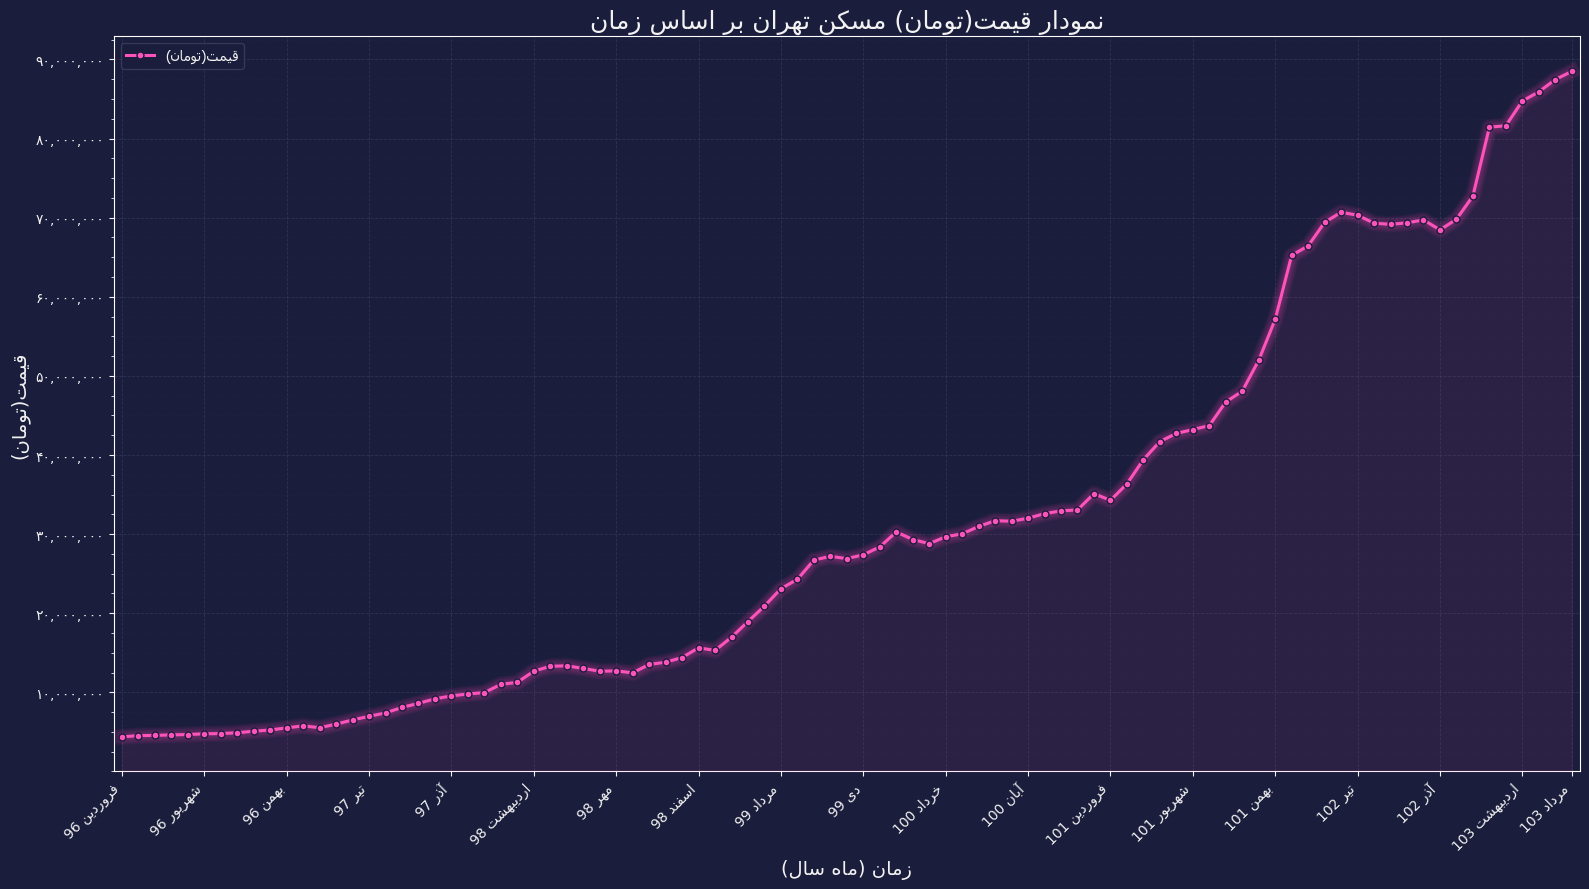

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# رنگ های جدید
main_line_color = '#FE53BB'  # صورتی (از نمونه کد شما)
grid_color = '#3C3F5D'      # رنگ خطوط شبکه متناسب با پس زمینه جدید (کمی روشن تر از پس زمینه)

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    persian_numerals_map = str.maketrans("0123456789", "۰۱۲۳۴۵۶۷۸۹")
    return text_str.translate(persian_numerals_map)

try:
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df.empty:
        sorted_columns = sorted(df.columns, key=get_sort_key)
        df = df[sorted_columns]
        df_processed = df.head(10).copy()

        for col in df_processed.columns:
            if df_processed[col].dtype == 'object':
                df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        price_row_name = 'قیمت(تومان)'

        if price_row_name in df_processed.index:
            price_data = df_processed.loc[price_row_name]
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            fig, ax = plt.subplots(figsize=(16, 9))
            
            font_name_to_use = 'Tahoma' 
            # font_name_to_use = 'DejaVu Sans' # جایگزین در صورت عدم وجود تاهوما
            plt.rcParams['font.family'] = font_name_to_use


            plot_title = get_persian_display(f'نمودار {price_row_name} مسکن تهران بر اساس زمان')
            x_label_text = get_persian_display('زمان (ماه سال)')
            y_label_text = get_persian_display(price_row_name)
            legend_label = get_persian_display(price_row_name)

            # --- رسم نمودار اصلی و افکت تابش (Glow Effect) ---
            # خط اصلی با مارکر فقط در نقاط داده
            ax.plot(x_numeric, price_data, color=main_line_color, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=main_line_color, markeredgecolor=new_background_color, # برای برجستگی بیشتر مارکر
                    label=legend_label, zorder=10)

            # ایجاد افکت تابش (بدون مارکر)
            n_shades = 10
            diff_linewidth = 1.0 # کمی کاهش برای تابش ملایم تر
            alpha_value = 0.035 

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, price_data,
                        linewidth=2.2 + (diff_linewidth * n), # شروع از ضخامت خط اصلی
                        alpha=alpha_value,
                        color=main_line_color,
                        linestyle='-', # اطمینان از اینکه خطوط تابش هم پیوسته هستند
                        marker='', # بدون مارکر برای خطوط تابش
                        zorder=9)

            # --- پر کردن ناحیه زیر نمودار ---
            ax.fill_between(x_numeric, price_data, 0, color=main_line_color, alpha=0.08, zorder=5) # آلفا کمی کمتر شد


            ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
            ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            processed_time_periods = [get_persian_display(tp) for tp in time_periods]
            num_ticks_x = 15 
            step_x = max(1, int(len(processed_time_periods) / num_ticks_x)) # اطمینان از گام صحیح
            selected_ticks_x_indices = x_numeric[::step_x]
            selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)] # جلوگیری از خطای ایندکس
            
            # اگر آخرین نقطه داده در selected_ticks_x_indices نیست، آن را اضافه کنید تا مطمئن شوید آخرین برچسب نمایش داده می شود
            if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
                 # اطمینان از عدم تکرار و مرتب بودن
                if selected_ticks_x_indices[-1] < x_numeric[-1] :
                    selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                    selected_ticks_x_labels.append(processed_time_periods[-1])


            ax.set_xticks(selected_ticks_x_indices)
            ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)


            def y_tick_formatter(value, pos):
                formatted_value = f'{int(value):,}' 
                return convert_to_persian_numerals(formatted_value)

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(y_tick_formatter))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # تعداد خطوط فرعی کمی تغییر کرد
            
            ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)


            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            ax.set_ylim(bottom=0) 
            ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)


            legend = ax.legend(frameon=True, loc='upper left', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            for text_obj in legend.get_texts():
                 text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()

        else:
            print(f"خطا: ردیف با نام '{price_row_name}' در داده‌های پردازش شده یافت نشد.")
            print("ردیف‌های موجود عبارتند از:", get_persian_display(str(df_processed.index.tolist())))

    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


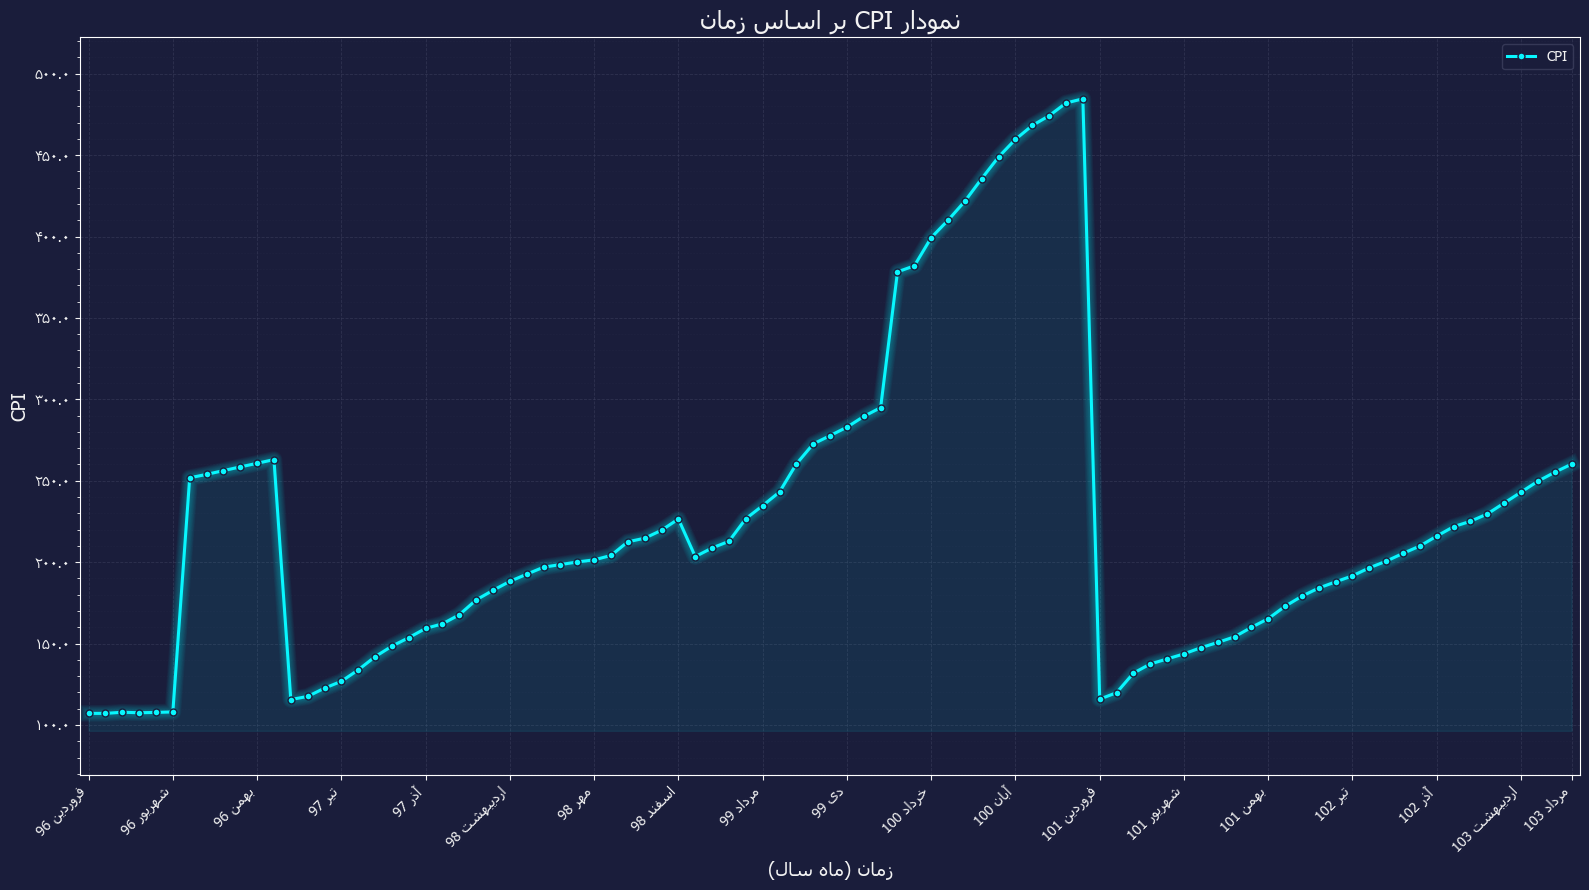

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ های جدید برای نمودار CPI ---
main_line_color_cpi = '#08F7FE'  # آبی فیروزه ای / سیان
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-") # اضافه کردن نقطه و منفی
    return text_str.translate(persian_numerals_map)

try:
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df.empty:
        sorted_columns = sorted(df.columns, key=get_sort_key)
        df = df[sorted_columns]
        df_processed = df.head(10).copy()

        for col in df_processed.columns:
            if df_processed[col].dtype == 'object':
                df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
                # برای CPI، ممکن است مقادیر به صورت مستقیم عدد باشند یا نیاز به تبدیل داشته باشند
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        # --- تغییر برای استفاده از داده CPI ---
        data_row_name = 'CPI' # ردیف داده مورد نظر

        if data_row_name in df_processed.index:
            cpi_data = df_processed.loc[data_row_name].astype(float) # اطمینان از نوع داده float
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            fig, ax = plt.subplots(figsize=(16, 9))
            
            font_name_to_use = 'Tahoma' 
            plt.rcParams['font.family'] = font_name_to_use


            plot_title = get_persian_display(f'نمودار {data_row_name} بر اساس زمان')
            x_label_text = get_persian_display('زمان (ماه سال)')
            y_label_text = get_persian_display(data_row_name) # برچسب محور Y
            legend_label = get_persian_display(data_row_name)

            # --- رسم نمودار اصلی و افکت تابش (Glow Effect) با رنگ جدید ---
            ax.plot(x_numeric, cpi_data, color=main_line_color_cpi, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=main_line_color_cpi, markeredgecolor=new_background_color,
                    label=legend_label, zorder=10)

            n_shades = 10
            diff_linewidth = 1.0
            alpha_value = 0.035 

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, cpi_data,
                        linewidth=2.2 + (diff_linewidth * n),
                        alpha=alpha_value,
                        color=main_line_color_cpi,
                        linestyle='-',
                        marker='',
                        zorder=9)

            # --- پر کردن ناحیه زیر نمودار با رنگ جدید ---
            # برای CPI ممکن است پر کردن ناحیه از صفر مناسب نباشد، مگر اینکه شاخص همیشه مثبت و بزرگتر از یک معیار باشد
            # اگر CPI حول یک عدد مثل 100 نوسان می کند، fill_between از یک مقدار پایه دیگر می تواند بهتر باشد.
            # در اینجا فرض می کنیم از صفر مناسب است یا CPI همیشه مثبت است.
            min_cpi_val = cpi_data.min() if cpi_data.min() > 0 else 0 # یک پایه برای fill_between
            ax.fill_between(x_numeric, cpi_data, min_cpi_val * 0.9, color=main_line_color_cpi, alpha=0.08, zorder=5)


            ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
            ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            processed_time_periods = [get_persian_display(tp) for tp in time_periods]
            num_ticks_x = 15 
            step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
            selected_ticks_x_indices = x_numeric[::step_x]
            selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
            
            if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
                if selected_ticks_x_indices[-1] < x_numeric[-1] :
                    selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                    selected_ticks_x_labels.append(processed_time_periods[-1])

            ax.set_xticks(selected_ticks_x_indices)
            ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)

            # --- فرمت‌کننده جدید برای مقادیر محور Y (مناسب برای CPI) ---
            def cpi_y_tick_formatter(value, pos):
                # نمایش یک رقم اعشار برای CPI
                formatted_value = f'{value:.1f}' 
                return convert_to_persian_numerals(formatted_value)

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both')) # تعداد تیک ها برای CPI
            ax.yaxis.set_major_formatter(FuncFormatter(cpi_y_tick_formatter)) # استفاده از فرمت کننده جدید
            ax.yaxis.set_minor_locator(AutoMinorLocator(5)) # خطوط فرعی برای CPI
            
            ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            # تنظیم محدوده محور Y بر اساس داده‌های CPI
            # ax.set_ylim(bottom=0) # ممکن است برای CPI همیشه از صفر شروع نشود
            # تنظیم خودکار محدوده Y یا بر اساس داده‌ها:
            padding_factor = 0.10 # 10% فضای خالی بالا و پایین داده ها
            data_min = cpi_data.min()
            data_max = cpi_data.max()
            range_cpi = data_max - data_min
            if range_cpi == 0 : range_cpi = data_max * 0.2 # اگر همه مقادیر یکسان باشند
                
            ax.set_ylim(bottom = data_min - (range_cpi * padding_factor) if data_min > 0 else data_min * (1+padding_factor) , 
                        top = data_max + (range_cpi * padding_factor))


            ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)

            legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            for text_obj in legend.get_texts():
                 text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()

        else:
            print(f"خطا: ردیف با نام '{data_row_name}' در داده‌های پردازش شده یافت نشد.")
            print("ردیف‌های موجود عبارتند از:", get_persian_display(str(df_processed.index.tolist())))
            print(f"لطفا مطمئن شوید '{data_row_name}' یکی از ایندکس‌های فوق است.")


    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


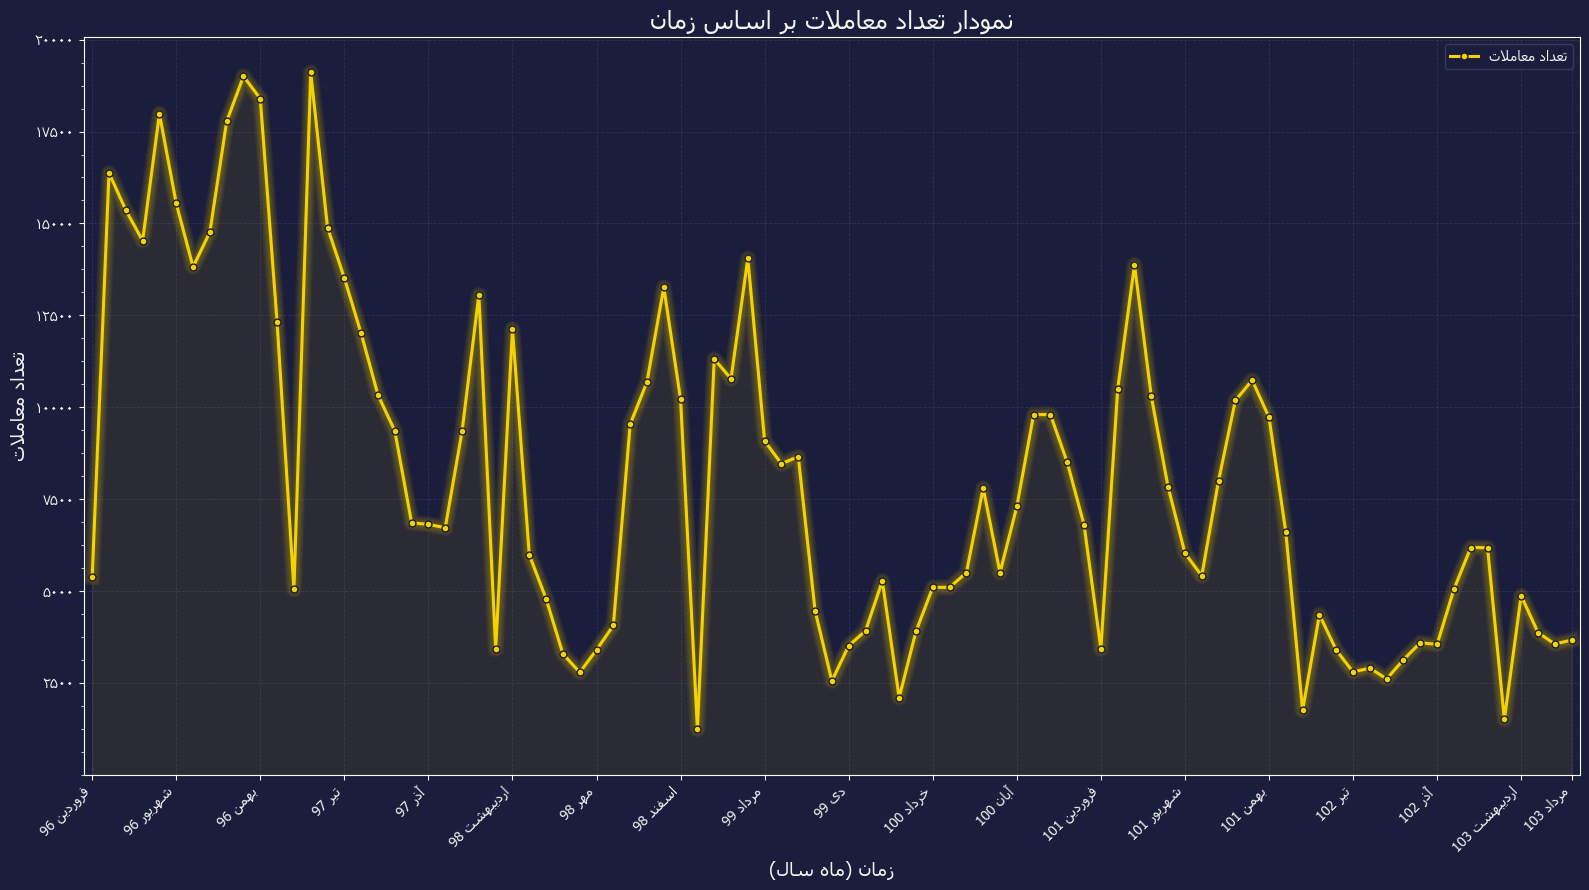

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ های جدید برای نمودار تعداد معاملات ---
main_line_color_transactions = '#F5D300'  # زرد
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    # اطمینان از اینکه کاماها ابتدا حذف شده اند اگر از قبل وجود دارند (هرچند فرمت کننده باید این را مدیریت کند)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

try:
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df.empty:
        sorted_columns = sorted(df.columns, key=get_sort_key)
        df = df[sorted_columns]
        df_processed = df.head(10).copy()

        for col in df_processed.columns:
            if df_processed[col].dtype == 'object':
                df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        # --- تغییر برای استفاده از داده "تعداد معاملات" ---
        data_row_name = 'تعداد معاملات' # ردیف داده مورد نظر

        if data_row_name in df_processed.index:
            transactions_data = df_processed.loc[data_row_name].astype(float) # بهتر است float باشد تا با NaN ها سازگار باشد، در فرمت به int تبدیل می شود
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            fig, ax = plt.subplots(figsize=(16, 9))
            
            font_name_to_use = 'Tahoma' 
            plt.rcParams['font.family'] = font_name_to_use


            plot_title = get_persian_display(f'نمودار {data_row_name} بر اساس زمان')
            x_label_text = get_persian_display('زمان (ماه سال)')
            y_label_text = get_persian_display(data_row_name)
            legend_label = get_persian_display(data_row_name)

            # --- رسم نمودار اصلی و افکت تابش (Glow Effect) با رنگ زرد ---
            ax.plot(x_numeric, transactions_data, color=main_line_color_transactions, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=main_line_color_transactions, markeredgecolor=new_background_color,
                    label=legend_label, zorder=10)

            n_shades = 10
            diff_linewidth = 1.0
            alpha_value = 0.035 

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, transactions_data,
                        linewidth=2.2 + (diff_linewidth * n),
                        alpha=alpha_value,
                        color=main_line_color_transactions,
                        linestyle='-',
                        marker='',
                        zorder=9)

            # --- پر کردن ناحیه زیر نمودار با رنگ زرد ---
            ax.fill_between(x_numeric, transactions_data, 0, color=main_line_color_transactions, alpha=0.08, zorder=5)


            ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
            ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            processed_time_periods = [get_persian_display(tp) for tp in time_periods]
            num_ticks_x = 15 
            step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
            selected_ticks_x_indices = x_numeric[::step_x]
            selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
            
            if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
                if selected_ticks_x_indices[-1] < x_numeric[-1] :
                    selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                    selected_ticks_x_labels.append(processed_time_periods[-1])

            ax.set_xticks(selected_ticks_x_indices)
            ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)

            # --- فرمت‌کننده مقادیر محور Y (مناسب برای تعداد معاملات) ---
            def transactions_y_tick_formatter(value, pos):
                # نمایش به صورت عدد صحیح با جداکننده هزارگان
                formatted_value = f'{int(value):,}' 
                return convert_to_persian_numerals(formatted_value)

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(transactions_y_tick_formatter)) # استفاده از فرمت کننده جدید
            ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # تعداد خطوط فرعی مانند نمودار قیمت
            
            ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            ax.set_ylim(bottom=0) # تعداد معاملات از صفر شروع می شود
            ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)

            legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            for text_obj in legend.get_texts():
                 text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()

        else:
            print(f"خطا: ردیف با نام '{data_row_name}' در داده‌های پردازش شده یافت نشد.")
            print("ردیف‌های موجود عبارتند از:", get_persian_display(str(df_processed.index.tolist())))
            print(f"لطفا مطمئن شوید '{data_row_name}' یکی از ایندکس‌های فوق است.")


    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


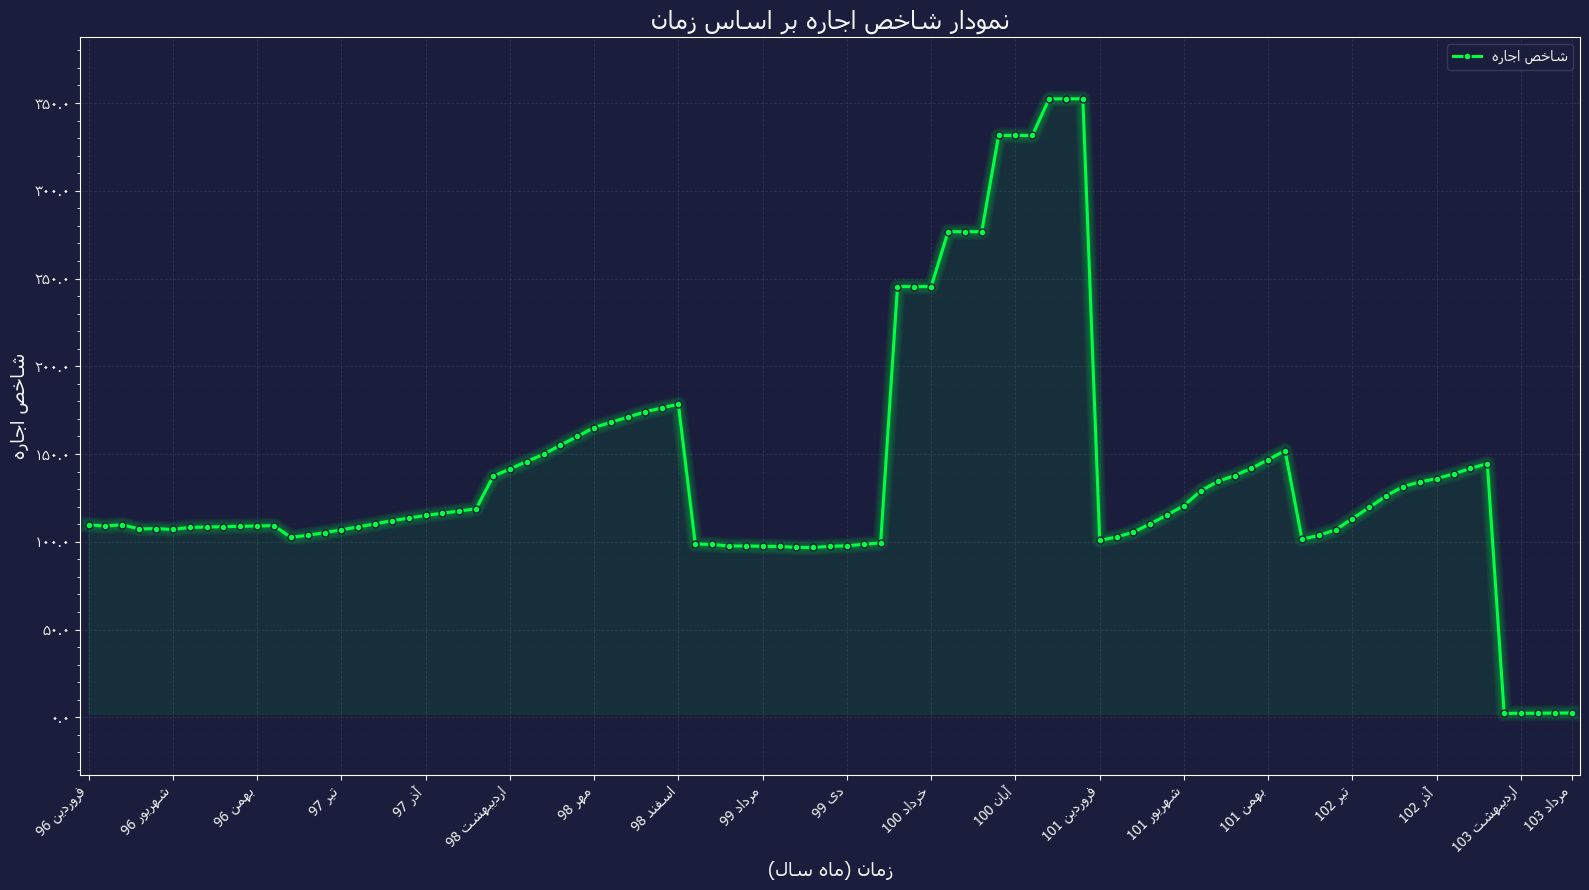

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ های جدید برای نمودار شاخص اجاره ---
main_line_color_rental = '#00ff41'  # سبز ماتریکسی
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

try:
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df.empty:
        sorted_columns = sorted(df.columns, key=get_sort_key)
        df = df[sorted_columns]
        df_processed = df.head(10).copy()

        for col in df_processed.columns:
            if df_processed[col].dtype == 'object':
                df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        # --- تغییر برای استفاده از داده "شاخص اجاره" ---
        data_row_name = 'شاخص اجاره' # ردیف داده مورد نظر

        if data_row_name in df_processed.index:
            rental_index_data = df_processed.loc[data_row_name].astype(float)
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            fig, ax = plt.subplots(figsize=(16, 9))
            
            font_name_to_use = 'Tahoma' 
            plt.rcParams['font.family'] = font_name_to_use


            plot_title = get_persian_display(f'نمودار {data_row_name} بر اساس زمان')
            x_label_text = get_persian_display('زمان (ماه سال)')
            y_label_text = get_persian_display(data_row_name)
            legend_label = get_persian_display(data_row_name)

            # --- رسم نمودار اصلی و افکت تابش (Glow Effect) با رنگ سبز ---
            ax.plot(x_numeric, rental_index_data, color=main_line_color_rental, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=main_line_color_rental, markeredgecolor=new_background_color,
                    label=legend_label, zorder=10)

            n_shades = 10
            diff_linewidth = 1.0
            alpha_value = 0.035 

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, rental_index_data,
                        linewidth=2.2 + (diff_linewidth * n),
                        alpha=alpha_value,
                        color=main_line_color_rental,
                        linestyle='-',
                        marker='',
                        zorder=9)

            # --- پر کردن ناحیه زیر نمودار با رنگ سبز ---
            min_rental_val = rental_index_data.min() if rental_index_data.min() > 0 else 0
            ax.fill_between(x_numeric, rental_index_data, min_rental_val * 0.9, color=main_line_color_rental, alpha=0.08, zorder=5)


            ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
            ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            processed_time_periods = [get_persian_display(tp) for tp in time_periods]
            num_ticks_x = 15 
            step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
            selected_ticks_x_indices = x_numeric[::step_x]
            selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
            
            if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
                if selected_ticks_x_indices[-1] < x_numeric[-1] :
                    selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                    selected_ticks_x_labels.append(processed_time_periods[-1])

            ax.set_xticks(selected_ticks_x_indices)
            ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)

            # --- فرمت‌کننده مقادیر محور Y (مناسب برای شاخص اجاره) ---
            def index_y_tick_formatter(value, pos):
                # نمایش یک رقم اعشار برای شاخص ها
                formatted_value = f'{value:.1f}' 
                return convert_to_persian_numerals(formatted_value)

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(index_y_tick_formatter)) # استفاده از فرمت کننده جدید
            ax.yaxis.set_minor_locator(AutoMinorLocator(5))
            
            ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            # تنظیم محدوده محور Y بر اساس داده‌های شاخص اجاره
            padding_factor = 0.10 
            data_min = rental_index_data.min()
            data_max = rental_index_data.max()
            range_rental = data_max - data_min
            if range_rental == 0 : range_rental = abs(data_max * 0.2) if data_max != 0 else 0.2 # اگر همه مقادیر یکسان باشند یا صفر باشند
                
            ax.set_ylim(bottom = data_min - (range_rental * padding_factor), 
                        top = data_max + (range_rental * padding_factor))

            ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)

            legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            for text_obj in legend.get_texts():
                 text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()

        else:
            print(f"خطا: ردیف با نام '{data_row_name}' در داده‌های پردازش شده یافت نشد.")
            print("ردیف‌های موجود عبارتند از:", get_persian_display(str(df_processed.index.tolist())))
            print(f"لطفا مطمئن شوید '{data_row_name}' یکی از ایندکس‌های فوق است.")


    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


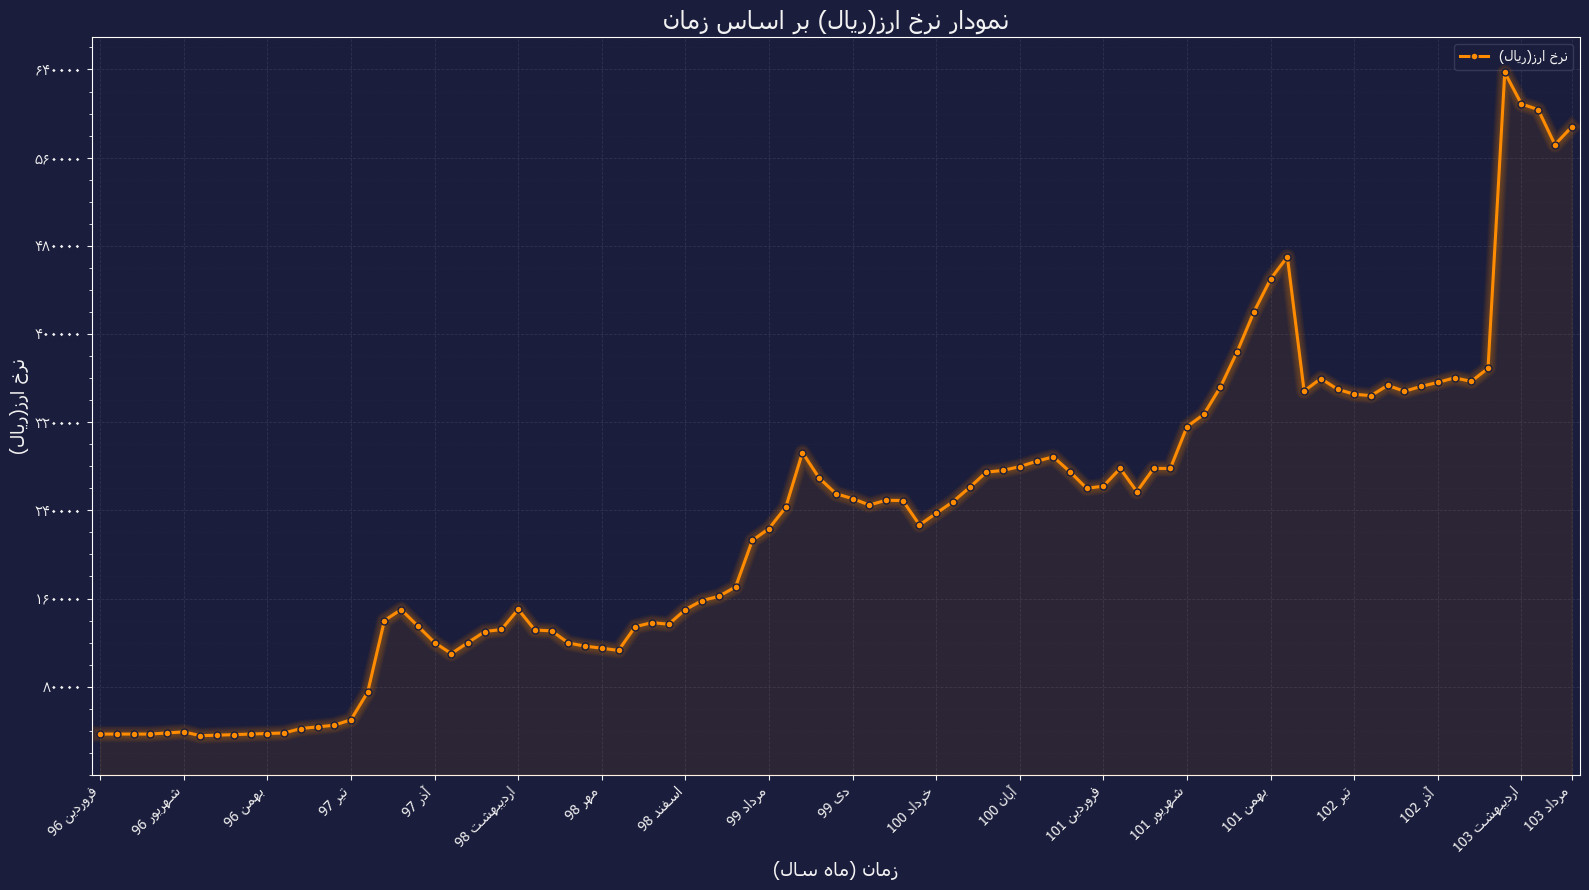

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ های جدید برای نمودار نرخ ارز ---
main_line_color_exchange_rate = '#FF8C00'  # نارنجی تیره
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

try:
    df = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df.empty:
        df = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df.empty:
         df = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df.empty:
        sorted_columns = sorted(df.columns, key=get_sort_key)
        df = df[sorted_columns]
        df_processed = df.head(10).copy()

        for col in df_processed.columns:
            if df_processed[col].dtype == 'object':
                df_processed[col] = df_processed[col].astype(str).str.replace(',', '', regex=False)
                df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        # --- تغییر برای استفاده از داده "نرخ ارز(ریال)" ---
        data_row_name = 'نرخ ارز(ریال)' # ردیف داده مورد نظر

        if data_row_name in df_processed.index:
            exchange_rate_data = df_processed.loc[data_row_name].astype(float)
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            fig, ax = plt.subplots(figsize=(16, 9))
            
            font_name_to_use = 'Tahoma' 
            plt.rcParams['font.family'] = font_name_to_use


            plot_title = get_persian_display(f'نمودار {data_row_name} بر اساس زمان')
            x_label_text = get_persian_display('زمان (ماه سال)')
            y_label_text = get_persian_display(data_row_name)
            legend_label = get_persian_display(data_row_name)

            # --- رسم نمودار اصلی و افکت تابش (Glow Effect) با رنگ نارنجی ---
            ax.plot(x_numeric, exchange_rate_data, color=main_line_color_exchange_rate, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=main_line_color_exchange_rate, markeredgecolor=new_background_color,
                    label=legend_label, zorder=10)

            n_shades = 10
            diff_linewidth = 1.0
            alpha_value = 0.035 

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, exchange_rate_data,
                        linewidth=2.2 + (diff_linewidth * n),
                        alpha=alpha_value,
                        color=main_line_color_exchange_rate,
                        linestyle='-',
                        marker='',
                        zorder=9)

            # --- پر کردن ناحیه زیر نمودار با رنگ نارنجی ---
            ax.fill_between(x_numeric, exchange_rate_data, 0, color=main_line_color_exchange_rate, alpha=0.08, zorder=5)


            ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
            ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            processed_time_periods = [get_persian_display(tp) for tp in time_periods]
            num_ticks_x = 15 
            step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
            selected_ticks_x_indices = x_numeric[::step_x]
            selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
            
            if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
                if selected_ticks_x_indices[-1] < x_numeric[-1] :
                    selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                    selected_ticks_x_labels.append(processed_time_periods[-1])

            ax.set_xticks(selected_ticks_x_indices)
            ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)

            # --- فرمت‌کننده مقادیر محور Y (مناسب برای نرخ ارز) ---
            def large_int_y_tick_formatter(value, pos):
                # نمایش به صورت عدد صحیح با جداکننده هزارگان
                formatted_value = f'{int(value):,}' 
                return convert_to_persian_numerals(formatted_value)

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(large_int_y_tick_formatter)) # استفاده از فرمت کننده مناسب
            ax.yaxis.set_minor_locator(AutoMinorLocator(4)) 
            
            ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            ax.set_ylim(bottom=0) # نرخ ارز از صفر شروع می شود
            ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)

            legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            for text_obj in legend.get_texts():
                 text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()

        else:
            print(f"خطا: ردیف با نام '{data_row_name}' در داده‌های پردازش شده یافت نشد.")
            print("ردیف‌های موجود عبارتند از:", get_persian_display(str(df_processed.index.tolist())))
            print(f"لطفا مطمئن شوید '{data_row_name}' یکی از ایندکس‌های فوق است.")


    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


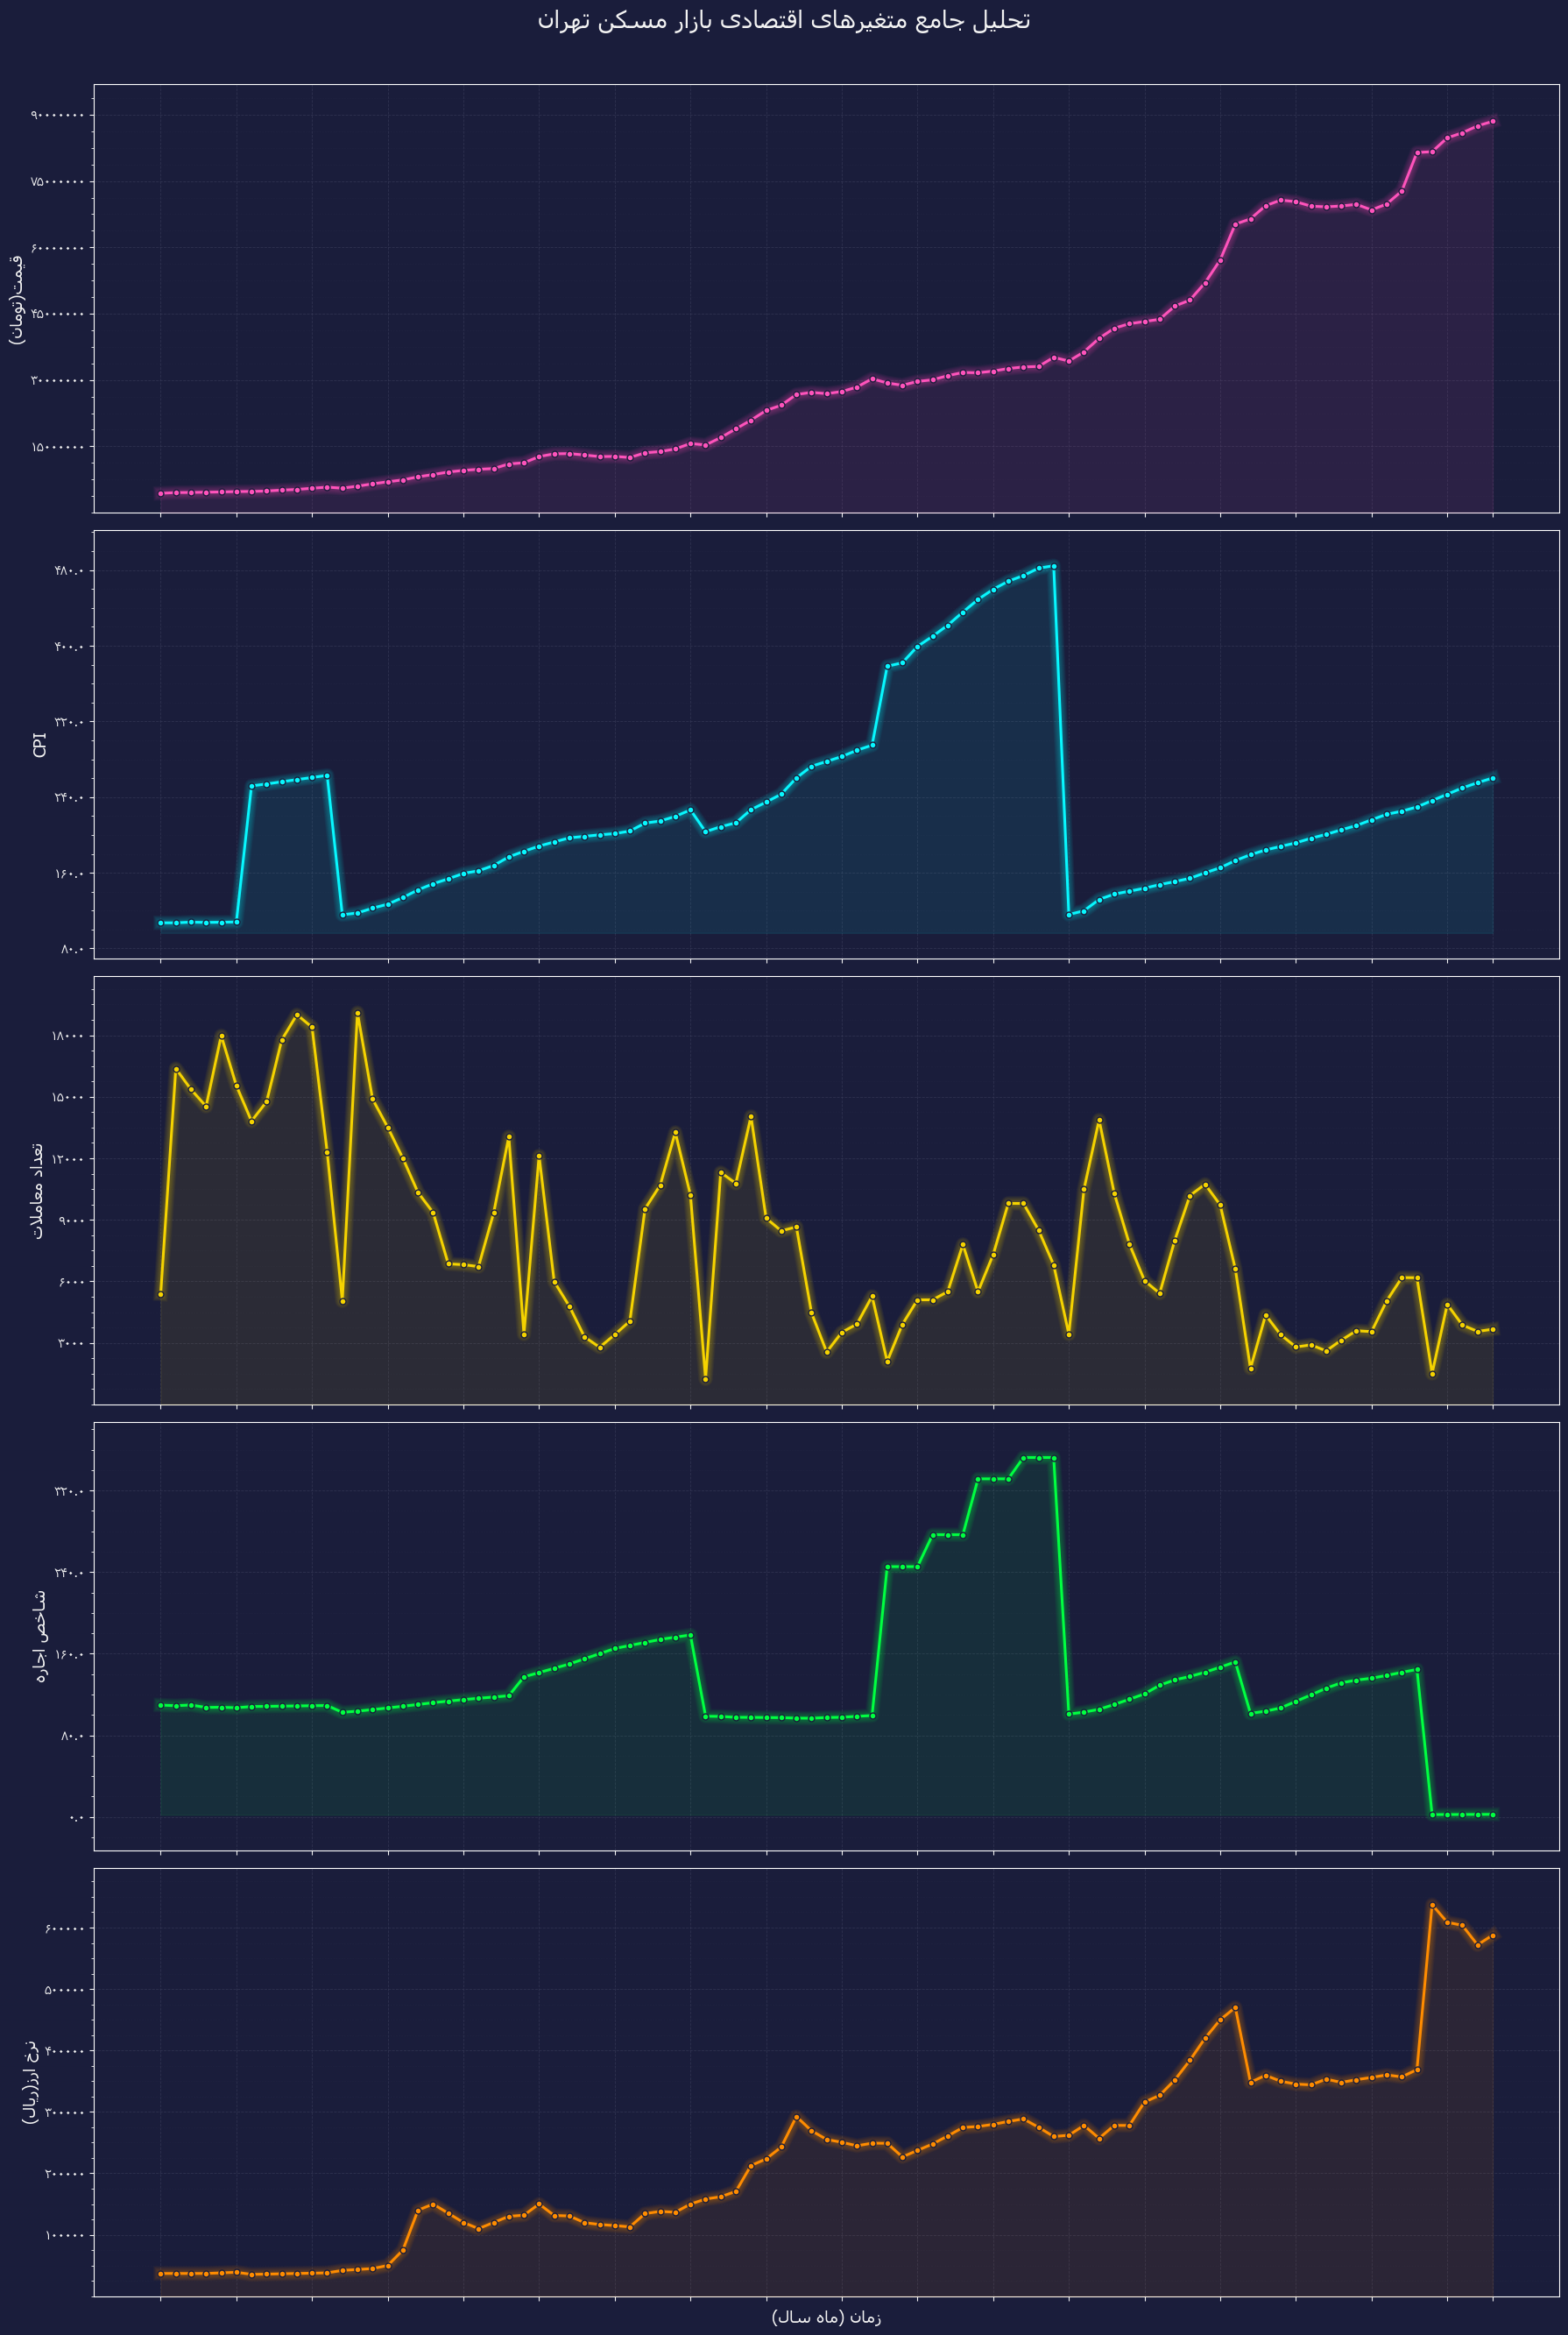

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده ها برای محور Y
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}' 
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}' 
    return convert_to_persian_numerals(formatted_value)

try:
    df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full.empty:
        df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full.empty:
         df_full = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full.empty:
        sorted_columns = sorted(df_full.columns, key=get_sort_key)
        df_full_processed = df_full[sorted_columns].head(10).copy() # انتخاب ۱۰ ردیف اول حاوی داده

        for col in df_full_processed.columns:
            if df_full_processed[col].dtype == 'object':
                df_full_processed[col] = df_full_processed[col].astype(str).str.replace(',', '', regex=False)
                df_full_processed[col] = pd.to_numeric(df_full_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        # تعریف متغیرها و رنگ های مربوطه
        variables_to_plot = {
            'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0},
            'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9},
            'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0},
            'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9},
            'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0}
        }
        
        plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']


        # --- ایجاد نمودار جامع با 5 زیرنمودار ---
        # اندازه فیگور بزرگتر برای جای دادن 5 نمودار
        fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 28), sharex=True) 
        
        font_name_to_use = 'Tahoma' 
        plt.rcParams['font.family'] = font_name_to_use
        
        time_periods = df_full_processed.columns.tolist()
        x_numeric = np.arange(len(time_periods))

        for i, var_name in enumerate(plot_order):
            ax = axes[i]
            if var_name not in df_full_processed.index:
                print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. این زیرنمودار خالی خواهد بود.")
                ax.set_ylabel(get_persian_display(var_name), fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                continue

            data_series = df_full_processed.loc[var_name].astype(float)
            plot_config = variables_to_plot[var_name]
            current_color = plot_config['color']
            
            # رسم نمودار اصلی و افکت تابش
            ax.plot(x_numeric, data_series, color=current_color, linewidth=2.2, linestyle='-', 
                    marker='o', markersize=5, markerfacecolor=current_color, markeredgecolor=new_background_color,
                    label=get_persian_display(var_name), zorder=10)

            n_shades = 10
            diff_linewidth = 1.0
            alpha_value = 0.035
            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, data_series, linewidth=2.2 + (diff_linewidth * n), alpha=alpha_value,
                        color=current_color, linestyle='-', marker='', zorder=9)

            # پر کردن ناحیه زیر نمودار
            fill_base_val = 0
            if 'fill_base' in plot_config:
                fill_base_val = plot_config['fill_base']
            elif 'fill_base_factor' in plot_config:
                min_val = data_series.min()
                fill_base_val = (min_val * plot_config['fill_base_factor']) if min_val > 0 else 0
            
            ax.fill_between(x_numeric, data_series, fill_base_val, color=current_color, alpha=0.08, zorder=5)

            ax.set_ylabel(get_persian_display(var_name), fontsize=14, color=plt.rcParams['axes.labelcolor'])
            
            # تنظیمات محور Y برای هر زیرنمودار
            ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both')) # تعداد تیک کمتر برای هر زیرنمودار
            ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

            # تنظیم محدوده محور Y به صورت پویا
            padding_factor = 0.10 
            data_min_val = data_series.min()
            data_max_val = data_series.max()
            range_val = data_max_val - data_min_val
            if range_val == 0 : range_val = abs(data_max_val * 0.2) if data_max_val != 0 else 0.2
            
            current_bottom = data_min_val - (range_val * padding_factor)
            # اگر fill_base_val صفر است و داده ها منفی نیستند، پایین را صفر در نظر بگیر
            if fill_base_val == 0 and data_min_val >= 0:
                current_bottom = 0
            elif 'fill_base_factor' in plot_config and fill_base_val < current_bottom : # اطمینان از اینکه fill_base پایین تر از شروع داده نباشد
                 current_bottom = fill_base_val * 0.98 # کمی پایین تر از پایه fill

            ax.set_ylim(bottom = current_bottom, top = data_max_val + (range_val * padding_factor))


            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            # لجند برای هر زیرنمودار (چون فقط یک خط دارد، برچسب محور Y کافی است، اما برای کامل بودن می توان اضافه کرد)
            # legend = ax.legend(frameon=True, loc='upper left', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
            # for text_obj in legend.get_texts():
            #      text_obj.set_color(plt.rcParams['text.color'])
        
        # تنظیمات محور X مشترک (فقط برای آخرین زیرنمودار نمایش داده می شود)
        processed_time_periods = [get_persian_display(tp) for tp in time_periods]
        num_ticks_x = 15 
        step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
        selected_ticks_x_indices = x_numeric[::step_x]
        selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
        
        if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 :
            if selected_ticks_x_indices[-1] < x_numeric[-1] :
                selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                selected_ticks_x_labels.append(processed_time_periods[-1])

        axes[-1].set_xticks(selected_ticks_x_indices) # اعمال تیک ها به آخرین محور
        axes[-1].set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)
        axes[-1].set_xlabel(get_persian_display('زمان (ماه سال)'), fontsize=14, color=plt.rcParams['axes.labelcolor'])
        
        for ax_idx in range(len(plot_order) -1): # مخفی کردن برچسب های ایکس برای نمودارهای بالایی
            axes[ax_idx].set_xticklabels([])


        fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی بازار مسکن تهران'), fontsize=20, color=plt.rcParams['text.color'])
        fig.tight_layout(rect=[0, 0.03, 1, 0.97]) # تنظیم فاصله برای suptitle
        plt.show()

    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


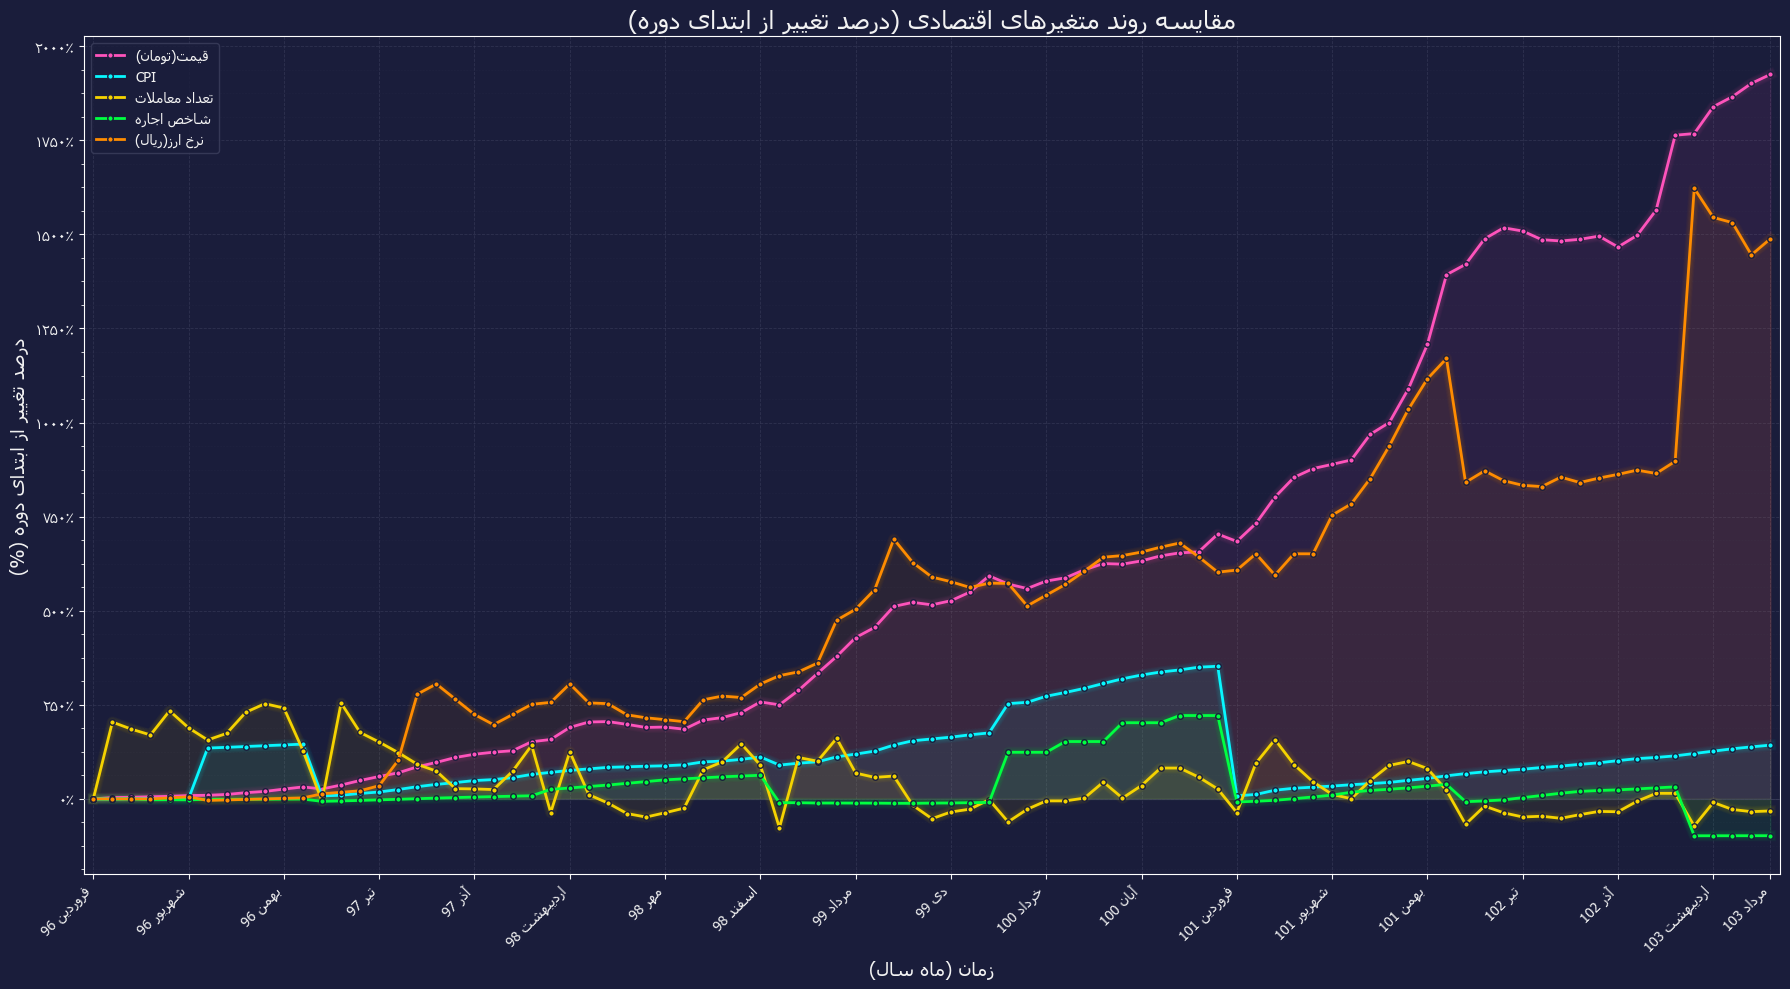

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    # print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.") # این پیام در محیط شما ممکن است تکراری باشد

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use


# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '') # حذف کاما قبل از تبدیل
    persian_numerals_map = str.maketrans("0123456789.-%", "۰۱۲۳۴۵۶۷۸۹.-٪") # اضافه کردن درصد
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای محور Y (درصد)
def percentage_y_tick_formatter(value, pos):
    formatted_value = f'{value:.0f}%' # نمایش درصد به صورت عدد صحیح
    return convert_to_persian_numerals(formatted_value)

try:
    df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full.empty:
        df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full.empty:
         df_full = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full.empty:
        sorted_columns = sorted(df_full.columns, key=get_sort_key)
        df_full_processed = df_full[sorted_columns].head(10).copy()

        for col in df_full_processed.columns:
            if df_full_processed[col].dtype == 'object':
                df_full_processed[col] = df_full_processed[col].astype(str).str.replace(',', '', regex=False)
                df_full_processed[col] = pd.to_numeric(df_full_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        variables_to_plot = {
            'قیمت(تومان)': '#FE53BB',
            'CPI': '#08F7FE',
            'تعداد معاملات': '#F5D300',
            'شاخص اجاره': '#00ff41',
            'نرخ ارز(ریال)': '#FF8C00'
        }
        
        plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

        fig, ax = plt.subplots(figsize=(18, 10)) # اندازه مناسب برای یک نمودار تکی
        
        time_periods = df_full_processed.columns.tolist()
        x_numeric = np.arange(len(time_periods))

        # --- نرمال سازی و رسم هر متغیر ---
        for var_name in plot_order:
            if var_name not in df_full_processed.index:
                print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. از رسم آن صرف نظر می شود.")
                continue

            raw_series = df_full_processed.loc[var_name].astype(float)
            
            # محاسبه درصد تغییر از نقطه شروع
            # جلوگیری از تقسیم بر صفر یا مقدار اولیه NaN
            first_value = raw_series.iloc[0]
            if pd.isna(first_value) or first_value == 0:
                print(f"مقدار اولیه برای '{var_name}' صفر یا NaN است. امکان محاسبه درصد تغییر وجود ندارد. از رسم آن صرف نظر می شود.")
                # normalized_series = pd.Series(0, index=raw_series.index) # یا یک مقدار ثابت دیگر
                continue 
            else:
                normalized_series = (raw_series / first_value - 1) * 100
            
            current_color = variables_to_plot[var_name]
            
            # رسم نمودار اصلی و افکت تابش
            ax.plot(x_numeric, normalized_series, color=current_color, linewidth=2.0, linestyle='-', 
                    marker='o', markersize=4, markerfacecolor=current_color, markeredgecolor=new_background_color,
                    label=get_persian_display(var_name), zorder=10)

            n_shades = 8 # کاهش تعداد لایه های تابش برای جلوگیری از شلوغی
            diff_linewidth = 0.8 # کاهش ضخامت تابش
            alpha_value = 0.025 # کاهش شفافیت تابش

            for n in range(1, n_shades + 1):
                ax.plot(x_numeric, normalized_series, linewidth=2.0 + (diff_linewidth * n), alpha=alpha_value,
                        color=current_color, linestyle='-', marker='', zorder=9)

            # پر کردن ناحیه زیر نمودار (از خط صفر درصد تغییر)
            ax.fill_between(x_numeric, normalized_series, 0, color=current_color, alpha=0.07, zorder=5)

        # --- تنظیمات کلی نمودار ---
        ax.set_title(get_persian_display('مقایسه روند متغیرهای اقتصادی (درصد تغییر از ابتدای دوره)'), fontsize=18)
        ax.set_xlabel(get_persian_display('زمان (ماه سال)'), fontsize=14)
        ax.set_ylabel(get_persian_display('درصد تغییر از ابتدای دوره (%)'), fontsize=14)
        
        # تنظیمات محور X
        processed_time_periods = [get_persian_display(tp) for tp in time_periods]
        num_ticks_x = 15 
        step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
        selected_ticks_x_indices = x_numeric[::step_x]
        selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
        
        if x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0:
            if selected_ticks_x_indices[-1] < x_numeric[-1]:
                selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                selected_ticks_x_labels.append(processed_time_periods[-1])

        ax.set_xticks(selected_ticks_x_indices)
        ax.set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)
        
        # تنظیمات محور Y (درصد)
        ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
        ax.yaxis.set_major_formatter(FuncFormatter(percentage_y_tick_formatter))
        ax.yaxis.set_minor_locator(AutoMinorLocator(4))
        ax.tick_params(axis='y', labelsize=10)

        ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
        ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
        
        # خط افقی در صفر درصد برای مرجع
        ax.axhline(0, color=grid_color, linestyle='-', linewidth=0.8, alpha=0.7, zorder=6)

        ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
        # محدوده Y به صورت خودکار تنظیم می شود اما می توانید در صورت نیاز دستی تنظیم کنید

        legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color, fontsize=10)
        for text_obj in legend.get_texts():
             text_obj.set_color(plt.rcParams['text.color'])

        fig.tight_layout()
        plt.show()

    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


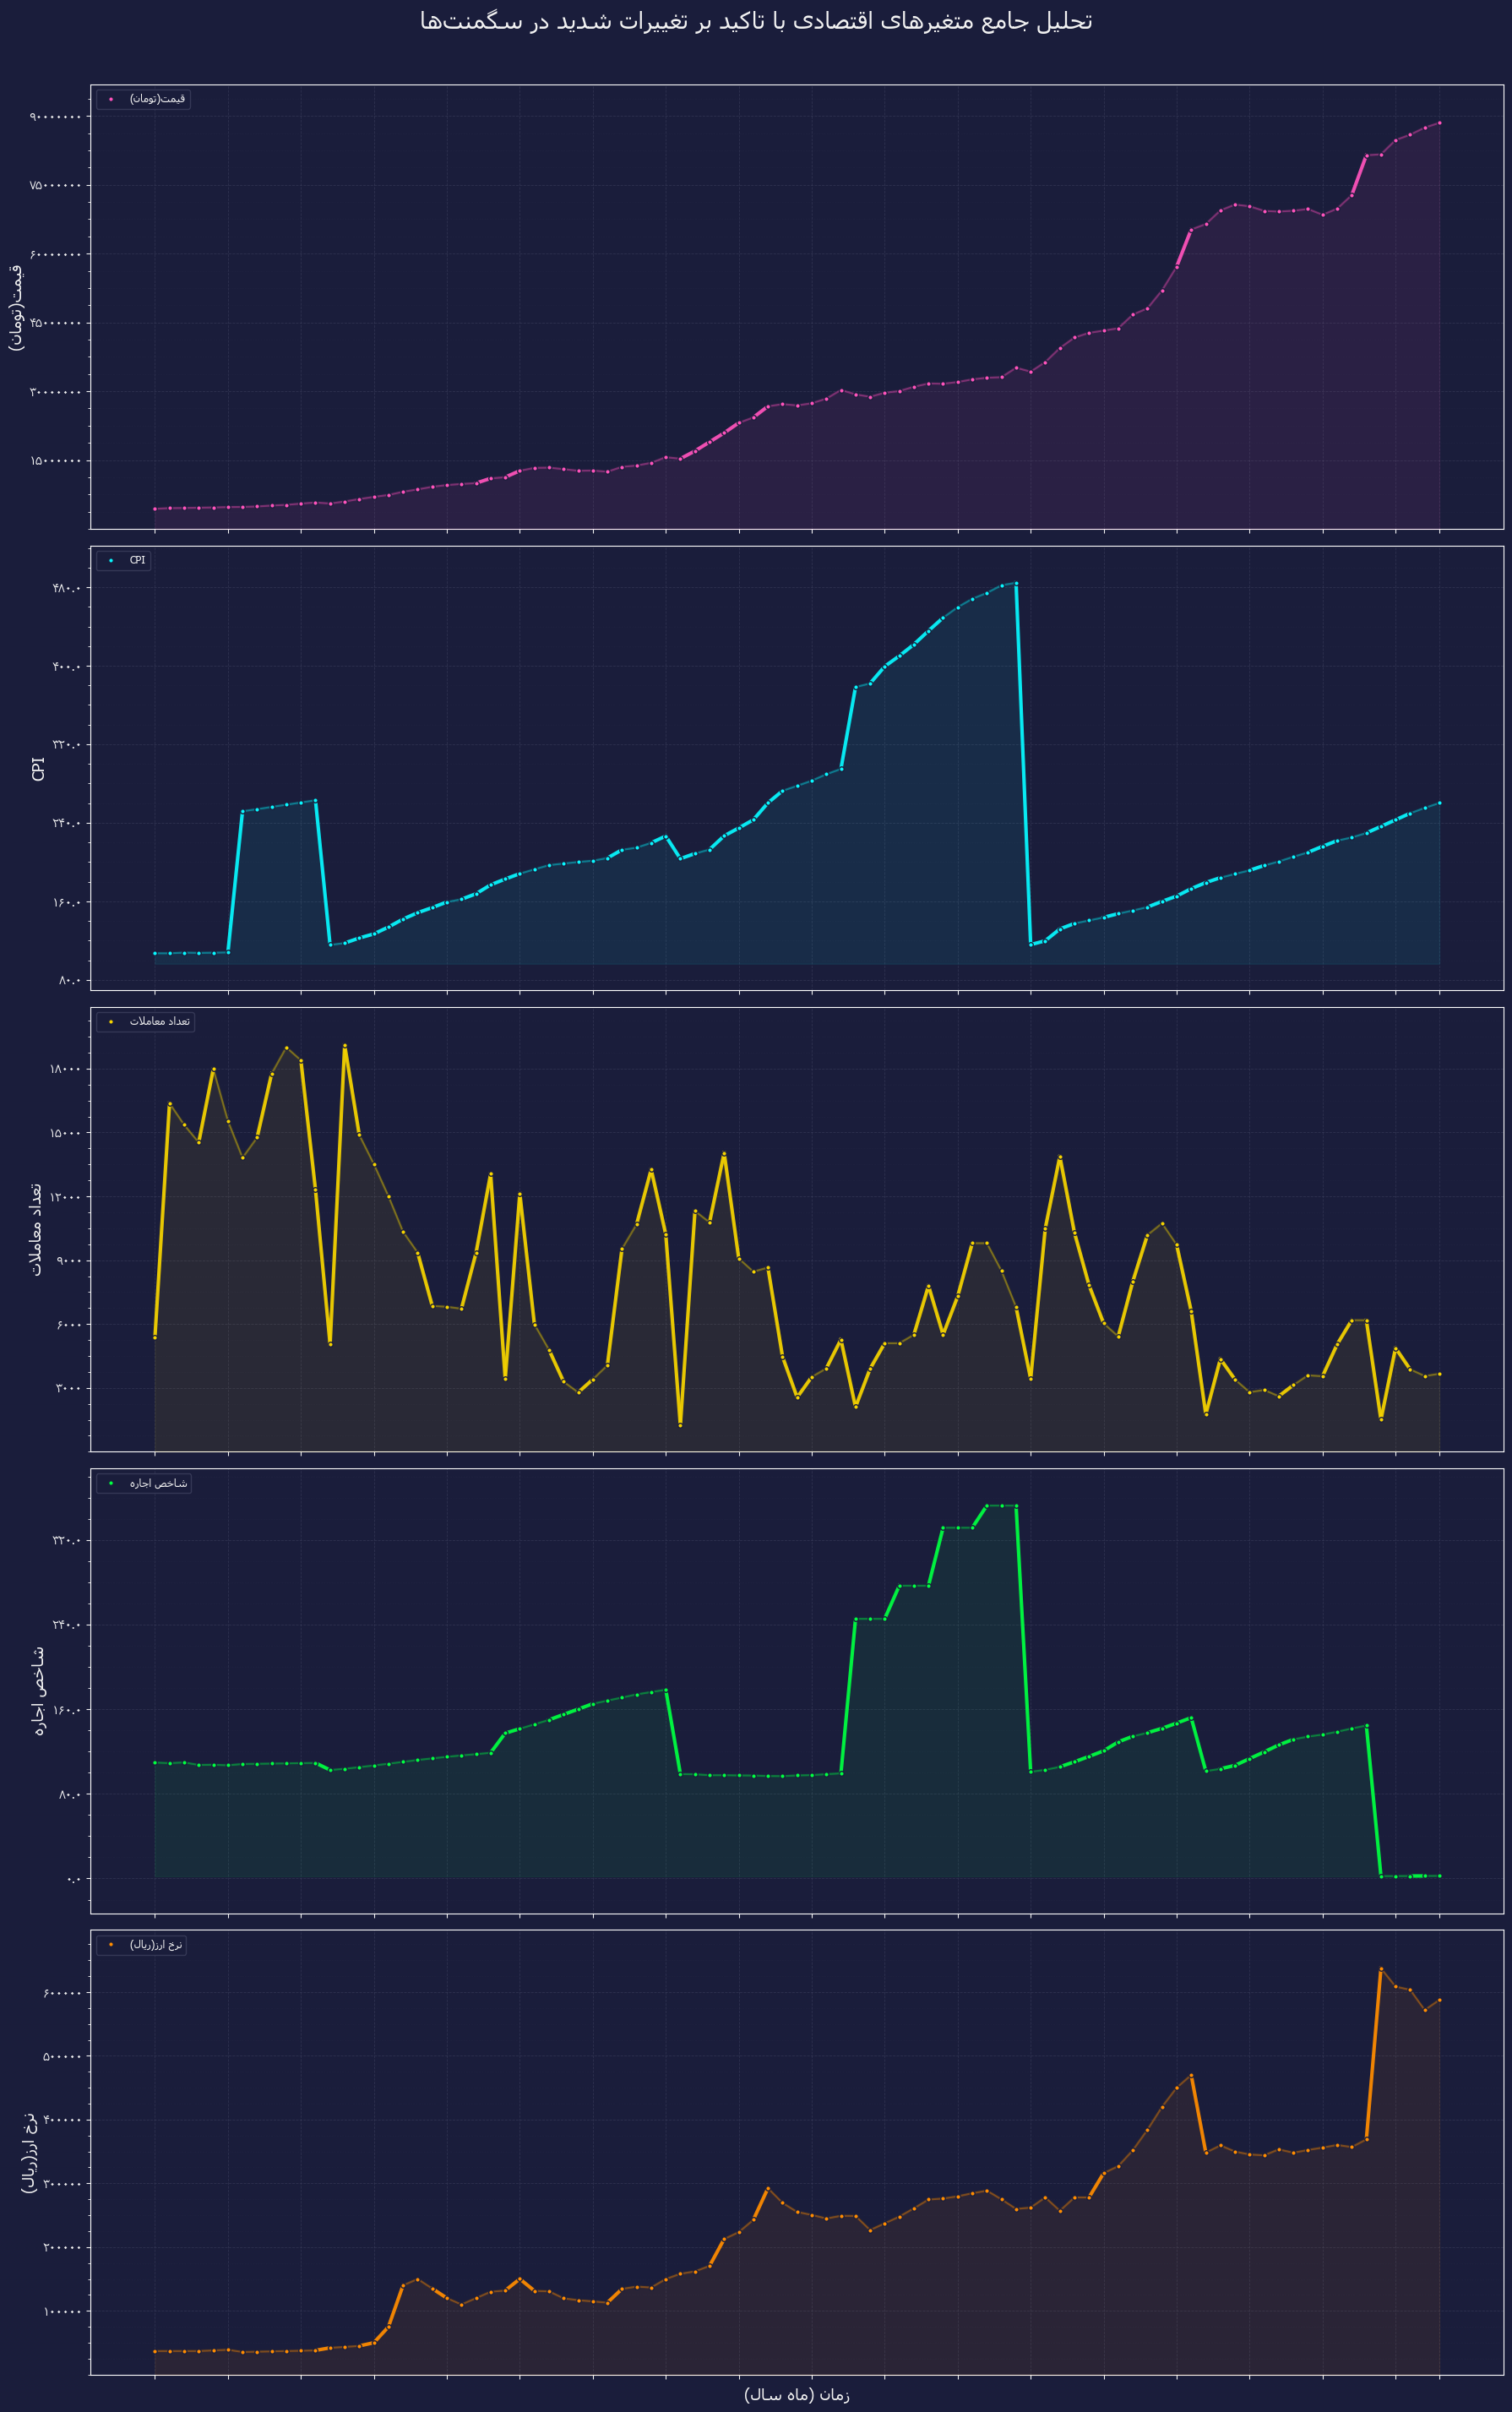

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv' # اطمینان از صحت نام فایل

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده ها برای محور Y
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

try:
    df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full.empty:
        df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full.empty:
         df_full = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full.empty:
        sorted_columns = sorted(df_full.columns, key=get_sort_key)
        df_full_processed = df_full[sorted_columns].head(10).copy()

        for col in df_full_processed.columns:
            if df_full_processed[col].dtype == 'object':
                df_full_processed[col] = df_full_processed[col].astype(str).str.replace(',', '', regex=False)
                df_full_processed[col] = pd.to_numeric(df_full_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        variables_to_plot = {
            'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0},
            'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 2.5}, # آستانه حساس تر
            'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 20.0}, # آستانه بالاتر
            'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 3.0}, # آستانه حساس تر
            'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0}
        }
        
        plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

        fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 30), sharex=True)
        
        font_name_to_use = 'Tahoma'
        plt.rcParams['font.family'] = font_name_to_use
        
        time_periods = df_full_processed.columns.tolist()
        x_numeric = np.arange(len(time_periods))

        for i, var_name in enumerate(plot_order):
            ax = axes[i]
            if var_name not in df_full_processed.index:
                print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. این زیرنمودار خالی خواهد بود.")
                ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                continue

            data_series = df_full_processed.loc[var_name].astype(float).interpolate() # درون یابی برای مقادیر NaN احتمالی جهت محاسبه pct_change
            plot_config = variables_to_plot[var_name]
            current_color = plot_config['color']
            threshold_pct = plot_config['change_threshold_pct']

            # --- شناسایی تغییرات شدید ---
            # pct_change در نقطه i، تغییر از i-1 به i را نشان می دهد
            pct_change = data_series.pct_change() * 100 
            significant_change_mask = (np.abs(pct_change) >= threshold_pct).fillna(False)
            
            # 1. رسم افکت تابش کلی و بسیار ملایم (زیر همه چیز)
            n_shades_glow = 5
            diff_linewidth_glow = 0.5
            alpha_value_glow = 0.02
            for n in range(1, n_shades_glow + 1):
                ax.plot(x_numeric, data_series, linewidth=1.0 + (diff_linewidth_glow * n), alpha=alpha_value_glow,
                        color=current_color, linestyle='-', marker='', zorder=6)

            # 2. رسم خط پایه (کم رنگ و نازک برای کل سری)
            ax.plot(x_numeric, data_series, color=current_color, linewidth=1.5, linestyle='-', 
                    alpha=0.35, zorder=7) # شفافیت بیشتر، ضخامت کمتر

            # 3. رسم سگمنت های با تغییر شدید (پررنگ تر و ضخیم تر)
            for k in range(1, len(x_numeric)): # از دومین نقطه شروع میکنیم
                if significant_change_mask.iloc[k]: # اگر تغییر از k-1 به k شدید بود
                    # رسم سگمنت بین k-1 و k
                    ax.plot(x_numeric[k-1:k+1], data_series.iloc[k-1:k+1], 
                            color=current_color, 
                            linewidth=3.0, # ضخیم تر
                            linestyle='-', 
                            alpha=0.9, # پررنگ تر
                            zorder=8) # روی خط پایه

            # 4. رسم مارکرها در تمام نقاط داده (روی همه چیز)
            ax.plot(x_numeric, data_series, color=current_color, linewidth=0, # فقط مارکرها، بدون خط اتصال دهنده در این لایه
                    marker='o', markersize=4, markerfacecolor=current_color, markeredgecolor=new_background_color,
                    label=get_persian_display(var_name), zorder=10)


            # پر کردن ناحیه زیر نمودار (با شفافیت کم)
            fill_base_val = 0
            if 'fill_base' in plot_config:
                fill_base_val = plot_config['fill_base']
            elif 'fill_base_factor' in plot_config:
                min_val = data_series.min()
                fill_base_val = (min_val * plot_config['fill_base_factor']) if min_val > 0 else 0
            
            ax.fill_between(x_numeric, data_series, fill_base_val, color=current_color, alpha=0.07, zorder=5)


            ax.set_ylabel(get_persian_display(var_name), fontsize=14)
            
            ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.tick_params(axis='y', labelsize=10)

            padding_factor = 0.10 
            data_min_val = data_series.min()
            data_max_val = data_series.max()
            range_val = data_max_val - data_min_val
            if pd.isna(range_val) or range_val == 0 : range_val = abs(data_max_val * 0.2) if (not pd.isna(data_max_val) and data_max_val != 0) else 0.2
            
            current_bottom = data_min_val - (range_val * padding_factor) if not pd.isna(data_min_val) else 0
            current_top = data_max_val + (range_val * padding_factor) if not pd.isna(data_max_val) else 1

            if fill_base_val == 0 and (not pd.isna(data_min_val) and data_min_val >= 0):
                current_bottom = 0
            elif 'fill_base_factor' in plot_config and (not pd.isna(fill_base_val)) and (not pd.isna(current_bottom)) and fill_base_val < current_bottom :
                 current_bottom = fill_base_val * 0.98 

            ax.set_ylim(bottom = current_bottom, top = current_top)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            # لجند اصلی برای نام متغیر (از طریق مارکرها ایجاد می شود)
            handles, labels = ax.get_legend_handles_labels()
            if handles: # فقط اگر مارکرها (و در نتیجه لجند) وجود دارند
                 legend_main = ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize=9, 
                                         facecolor=new_background_color, edgecolor=grid_color, 
                                         labelcolor=text_color_on_dark)
                 for text_obj in legend_main.get_texts():
                     text_obj.set_color(text_color_on_dark)


        processed_time_periods = [get_persian_display(tp) for tp in time_periods]
        num_ticks_x = 15 
        step_x = max(1, int(len(processed_time_periods) / num_ticks_x))
        selected_ticks_x_indices = x_numeric[::step_x]
        selected_ticks_x_labels = [processed_time_periods[i] for i in selected_ticks_x_indices if i < len(processed_time_periods)]
        
        if len(x_numeric)>0 and x_numeric[-1] not in selected_ticks_x_indices and len(selected_ticks_x_indices) > 0 : # بررسی خالی نبودن x_numeric
            if selected_ticks_x_indices[-1] < x_numeric[-1] :
                selected_ticks_x_indices = np.append(selected_ticks_x_indices, x_numeric[-1])
                selected_ticks_x_labels.append(processed_time_periods[-1])

        if len(axes) > 0 : # بررسی وجود محورها
            axes[-1].set_xticks(selected_ticks_x_indices)
            axes[-1].set_xticklabels(selected_ticks_x_labels, rotation=45, ha='right', fontsize=10)
            axes[-1].set_xlabel(get_persian_display('زمان (ماه سال)'), fontsize=14)
        
            for ax_idx in range(len(plot_order) -1):
                if ax_idx < len(axes): # بررسی وجود محور
                    axes[ax_idx].set_xticklabels([])

        fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی با تاکید بر تغییرات شدید در سگمنت‌ها'), fontsize=20)
        fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
        plt.show()

    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

دیتافریم پردازش شده آماده است.


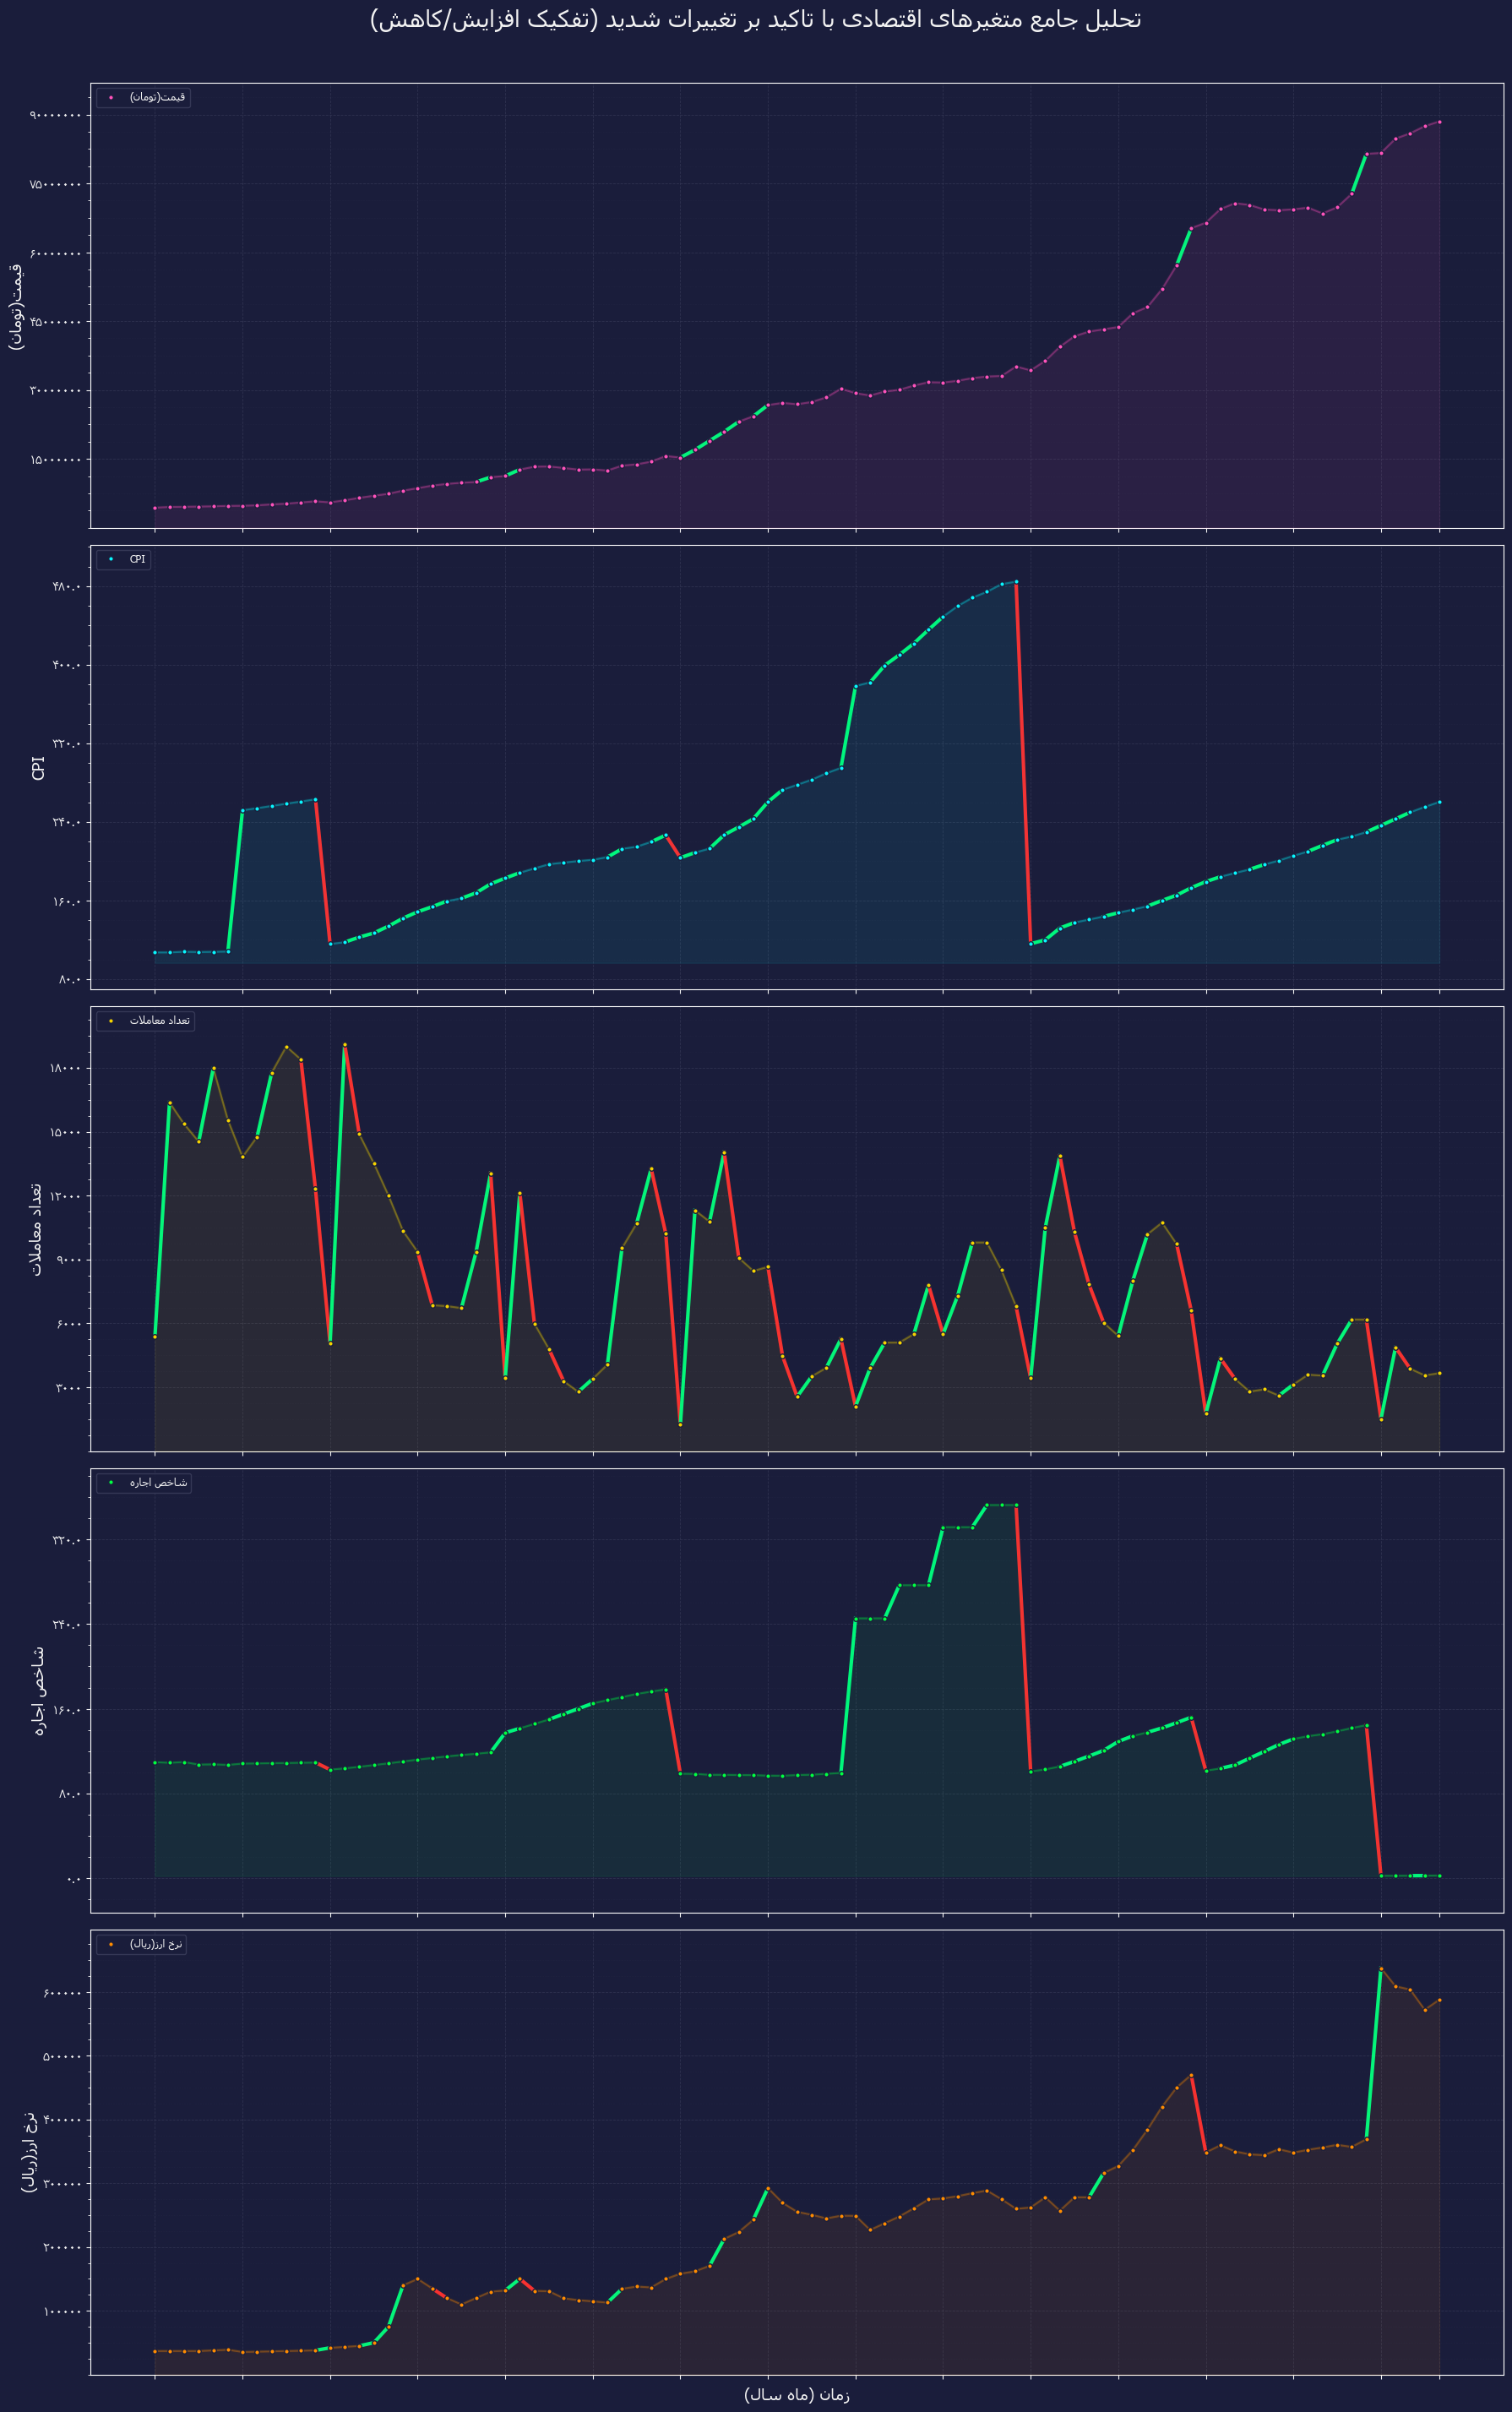

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
increase_highlight_color = '#00FF7F'
decrease_highlight_color = '#FF3131'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

try:
    df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full.empty:
        df_full = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full.empty:
         df_full = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full.empty:
        sorted_columns = sorted(df_full.columns, key=get_sort_key)
        df_full_processed = df_full[sorted_columns].head(10).copy()

        for col in df_full_processed.columns:
            if df_full_processed[col].dtype == 'object':
                df_full_processed[col] = df_full_processed[col].astype(str).str.replace(',', '', regex=False)
                df_full_processed[col] = pd.to_numeric(df_full_processed[col], errors='coerce')
        
        print("دیتافریم پردازش شده آماده است.")

        variables_to_plot = {
            'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0},
            'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 2.5},
            'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 20.0},
            'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 3.0},
            'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0}
        }
        
        plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

        fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 30), sharex=True)
        
        font_name_to_use = 'Tahoma'
        plt.rcParams['font.family'] = font_name_to_use
        
        time_periods_original = df_full_processed.columns.tolist()
        if not time_periods_original:
            print("خطا: هیچ ستون تاریخی در دیتافریم برای محور X یافت نشد.")
            # return # یا مدیریت خطا به شکل دیگر

        x_numeric = np.arange(len(time_periods_original))
        processed_time_periods = [get_persian_display(tp) for tp in time_periods_original]


        for i, var_name in enumerate(plot_order):
            ax = axes[i]
            if var_name not in df_full_processed.index:
                # ... (کد مدیریت خطای عدم وجود داده، بدون تغییر) ...
                print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. این زیرنمودار خالی خواهد بود.")
                ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                continue


            data_series = df_full_processed.loc[var_name].astype(float).interpolate()
            plot_config = variables_to_plot[var_name]
            original_series_color = plot_config['color']
            threshold_pct = plot_config['change_threshold_pct']

            pct_change = data_series.pct_change() * 100 
            significant_change_mask = (np.abs(pct_change) >= threshold_pct).fillna(False)
            
            n_shades_glow = 5
            diff_linewidth_glow = 0.5
            alpha_value_glow = 0.02
            for n in range(1, n_shades_glow + 1):
                ax.plot(x_numeric, data_series, linewidth=1.0 + (diff_linewidth_glow * n), alpha=alpha_value_glow,
                        color=original_series_color, linestyle='-', marker='', zorder=6)

            ax.plot(x_numeric, data_series, color=original_series_color, linewidth=1.5, linestyle='-', 
                    alpha=0.30, zorder=7)

            for k in range(1, len(x_numeric)):
                if significant_change_mask.iloc[k]:
                    segment_color = increase_highlight_color if pct_change.iloc[k] > 0 else decrease_highlight_color
                    ax.plot(x_numeric[k-1:k+1], data_series.iloc[k-1:k+1], 
                            color=segment_color, 
                            linewidth=3.0, 
                            linestyle='-', 
                            alpha=0.95,
                            zorder=8) 

            ax.plot(x_numeric, data_series, color=original_series_color, linewidth=0, 
                    marker='o', markersize=4, markerfacecolor=original_series_color, markeredgecolor=new_background_color,
                    label=get_persian_display(var_name), zorder=10)

            fill_base_val = 0
            if 'fill_base' in plot_config:
                fill_base_val = plot_config['fill_base']
            elif 'fill_base_factor' in plot_config:
                min_val = data_series.min()
                fill_base_val = (min_val * plot_config['fill_base_factor']) if min_val > 0 else 0
            
            ax.fill_between(x_numeric, data_series, fill_base_val, color=original_series_color, alpha=0.07, zorder=5)

            ax.set_ylabel(get_persian_display(var_name), fontsize=14)
            ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.tick_params(axis='y', labelsize=10)

            padding_factor = 0.10 
            data_min_val = data_series.min()
            data_max_val = data_series.max()
            range_val = data_max_val - data_min_val
            if pd.isna(range_val) or range_val == 0 : range_val = abs(data_max_val * 0.2) if (not pd.isna(data_max_val) and data_max_val != 0) else 0.2
            
            current_bottom = data_min_val - (range_val * padding_factor) if not pd.isna(data_min_val) else 0
            current_top = data_max_val + (range_val * padding_factor) if not pd.isna(data_max_val) else 1

            if fill_base_val == 0 and (not pd.isna(data_min_val) and data_min_val >= 0):
                current_bottom = 0
            elif 'fill_base_factor' in plot_config and (not pd.isna(fill_base_val)) and (not pd.isna(current_bottom)) and fill_base_val < current_bottom :
                 current_bottom = fill_base_val * 0.98 

            ax.set_ylim(bottom = current_bottom, top = current_top)
            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            handles, labels = ax.get_legend_handles_labels()
            if handles:
                 legend_main = ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize=9, 
                                         facecolor=new_background_color, edgecolor=grid_color)


        # --- اصلاح و تاکید بر تنظیمات محور X ---
        if len(x_numeric) > 0 and len(axes) > 0: # فقط اگر داده و محوری برای نمایش وجود دارد
            num_ticks_x = 15 # تعداد مطلوب تیک‌ها روی محور X
            
            # انتخاب گام به طوری که تعداد تیک‌ها معقول باشد
            step_x = max(1, int(np.ceil(len(x_numeric) / num_ticks_x)))
            
            selected_tick_positions = x_numeric[::step_x]
            selected_tick_labels = [processed_time_periods[int(pos)] for pos in selected_tick_positions]

            # اطمینان از اینکه اولین و آخرین برچسب زمانی نمایش داده می شوند (اگر قبلا انتخاب نشده اند)
            if x_numeric[0] not in selected_tick_positions:
                selected_tick_positions = np.insert(selected_tick_positions, 0, x_numeric[0])
                selected_tick_labels.insert(0, processed_time_periods[0])
            
            # بررسی برای آخرین تیک متفاوت از روش قبلی برای جلوگیری از تکرار
            if len(x_numeric) > 1 and x_numeric[-1] not in selected_tick_positions:
                 # اگر آخرین تیک محاسبه شده، خود آخرین نقطه داده نیست، آن را اضافه کن
                 if selected_tick_positions[-1] < x_numeric[-1]:
                    selected_tick_positions = np.append(selected_tick_positions, x_numeric[-1])
                    selected_tick_labels.append(processed_time_periods[-1])
            elif len(x_numeric) == 1 and len(selected_tick_positions) == 0 : # اگر فقط یک نقطه داده داریم
                 selected_tick_positions = x_numeric
                 selected_tick_labels = [processed_time_periods[0]]


            # اعمال تیک‌ها و برچسب‌ها به آخرین (پایین‌ترین) محور
            axes[-1].set_xticks(selected_tick_positions)
            axes[-1].set_xticklabels(selected_tick_labels, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
            axes[-1].set_xlabel(get_persian_display('زمان (ماه سال)'), fontsize=14)
        
            # مخفی کردن برچسب‌های X برای سایر محورهای بالایی
            for ax_idx in range(len(axes) - 1):
                axes[ax_idx].set_xticklabels([])
        elif len(axes) > 0 : # اگر داده ای برای محور X نیست اما محورها ایجاد شده اند
             axes[-1].set_xlabel(get_persian_display('زمان (ماه سال)'), fontsize=14)


        fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی با تاکید بر تغییرات شدید (تفکیک افزایش/کاهش)'), fontsize=20)
        fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
        plt.show()

    else:
        print(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد.")

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

## 1402

12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


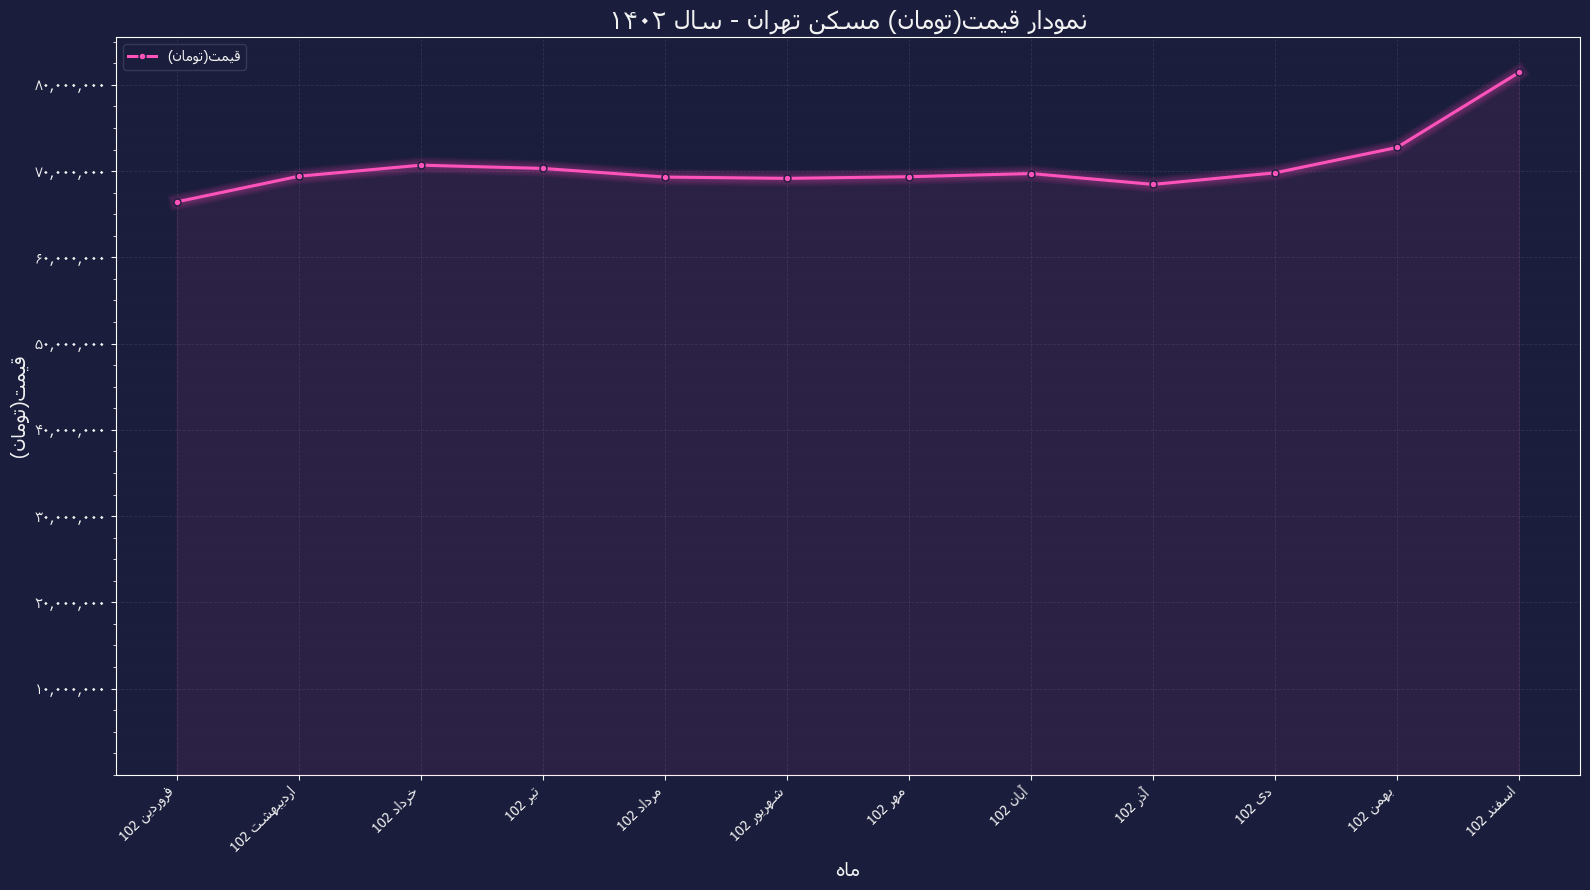

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    # print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.") # این پیام در کد شما بود

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# رنگ اصلی نمودار قیمت (صورتی)
main_line_color = '#FE53BB'
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

# تابع تبدیل اعداد به فارسی (مطابق کد ارائه شده شما)
def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    persian_numerals_map = str.maketrans("0123456789", "۰۱۲۳۴۵۶۷۸۹")
    return text_str.translate(persian_numerals_map)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables = df_full_data[sorted_columns_all].head(10).copy() # انتخاب ۱۰ ردیف اول متغیرها

        # پاک‌سازی داده‌ها
        for col in df_all_variables.columns:
            if df_all_variables[col].dtype == 'object':
                df_all_variables[col] = df_all_variables[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables[col] = pd.to_numeric(df_all_variables[col], errors='coerce')
        
        # --- فیلتر کردن ستون‌ها برای سال 102 (1402 شمسی) ---
        columns_year_102 = [col for col in df_all_variables.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed_year_102 = df_all_variables[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            price_row_name = 'قیمت(تومان)'

            if price_row_name in df_processed_year_102.index:
                price_data = df_processed_year_102.loc[price_row_name]
                time_periods = columns_year_102 # ماه‌های سال 102
                x_numeric = np.arange(len(time_periods))

                fig, ax = plt.subplots(figsize=(16, 9))
                
                font_name_to_use = 'Tahoma' 
                plt.rcParams['font.family'] = font_name_to_use

                plot_title = get_persian_display(f'نمودار {price_row_name} مسکن تهران - سال ۱۴۰۲')
                x_label_text = get_persian_display('ماه') # تغییر عنوان محور X
                y_label_text = get_persian_display(price_row_name)
                legend_label = get_persian_display(price_row_name)

                ax.plot(x_numeric, price_data, color=main_line_color, linewidth=2.2, linestyle='-', 
                        marker='o', markersize=5, markerfacecolor=main_line_color, markeredgecolor=new_background_color,
                        label=legend_label, zorder=10)

                n_shades = 10
                diff_linewidth = 1.0 
                alpha_value = 0.035 

                for n in range(1, n_shades + 1):
                    ax.plot(x_numeric, price_data,
                            linewidth=2.2 + (diff_linewidth * n), 
                            alpha=alpha_value,
                            color=main_line_color,
                            linestyle='-', 
                            marker='', 
                            zorder=9)

                ax.fill_between(x_numeric, price_data, 0, color=main_line_color, alpha=0.08, zorder=5)

                ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
                ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                
                processed_time_periods = [get_persian_display(tp) for tp in time_periods]
                
                # نمایش تمام ماه‌های سال 102 روی محور X
                ax.set_xticks(x_numeric) # موقعیت تیک‌ها برابر با ایندکس ماه‌ها
                ax.set_xticklabels(processed_time_periods, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)

                # فرمت‌کننده محور Y (مطابق کد ارائه شده شما)
                def y_tick_formatter(value, pos):
                    formatted_value = f'{int(value):,}' 
                    return convert_to_persian_numerals(formatted_value)

                ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(y_tick_formatter))
                ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                
                ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
                ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                ax.set_ylim(bottom=0) 
                if len(x_numeric) > 0:
                    ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
                else: # اگر هیچ داده ای برای سال 102 نباشد
                    ax.set_xlim(left=-0.5, right=0.5)


                legend = ax.legend(frameon=True, loc='upper left', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
                for text_obj in legend.get_texts():
                    text_obj.set_color(plt.rcParams['text.color'])

                fig.tight_layout()
                plt.show()

            else:
                print(get_persian_display(f"خطا: ردیف با نام '{price_row_name}' در داده‌های سال 102 یافت نشد."))
                print(get_persian_display("ردیف‌های موجود در داده‌های سال 102 عبارتند از:"), get_persian_display(str(df_processed_year_102.index.tolist())))
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


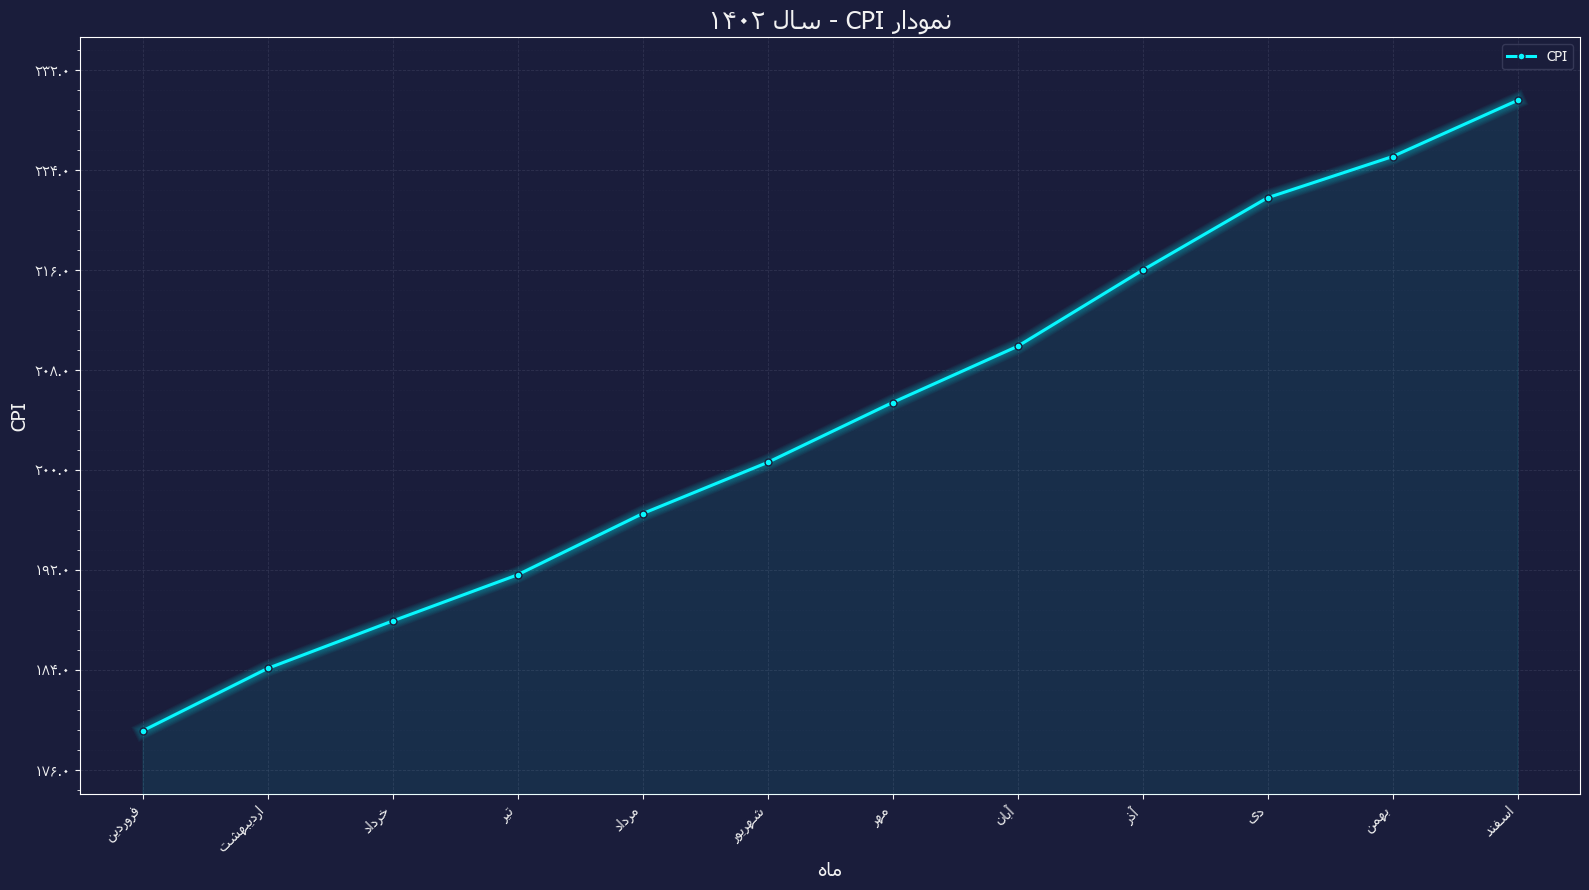

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    # print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.") # این پیام در کد شما بود

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# رنگ اصلی نمودار CPI (آبی فیروزه ای)
main_line_color_cpi = '#08F7FE'
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

# تابع تبدیل اعداد به فارسی (مطابق کد ارائه شده شما)
def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    # اضافه کردن نقطه و منفی به نقشه تبدیل برای پشتیبانی از اعداد اعشاری و منفی
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables = df_full_data[sorted_columns_all].head(10).copy() # انتخاب ۱۰ ردیف اول متغیرها

        # پاک‌سازی داده‌ها
        for col in df_all_variables.columns:
            if df_all_variables[col].dtype == 'object':
                df_all_variables[col] = df_all_variables[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables[col] = pd.to_numeric(df_all_variables[col], errors='coerce')
        
        # --- فیلتر کردن ستون‌ها برای سال 102 (1402 شمسی) ---
        columns_year_102 = [col for col in df_all_variables.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed_year_102 = df_all_variables[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            data_row_name = 'CPI' # ردیف داده مورد نظر

            if data_row_name in df_processed_year_102.index:
                cpi_data = df_processed_year_102.loc[data_row_name].astype(float)
                time_periods = columns_year_102 # ماه‌های سال 102
                x_numeric = np.arange(len(time_periods))

                fig, ax = plt.subplots(figsize=(16, 9))
                
                font_name_to_use = 'Tahoma' 
                plt.rcParams['font.family'] = font_name_to_use

                plot_title = get_persian_display(f'نمودار {data_row_name} - سال ۱۴۰۲')
                x_label_text = get_persian_display('ماه') # تغییر عنوان محور X
                y_label_text = get_persian_display(data_row_name)
                legend_label = get_persian_display(data_row_name)

                ax.plot(x_numeric, cpi_data, color=main_line_color_cpi, linewidth=2.2, linestyle='-', 
                        marker='o', markersize=5, markerfacecolor=main_line_color_cpi, markeredgecolor=new_background_color,
                        label=legend_label, zorder=10)

                n_shades = 10
                diff_linewidth = 1.0 
                alpha_value = 0.035 

                for n in range(1, n_shades + 1):
                    ax.plot(x_numeric, cpi_data,
                            linewidth=2.2 + (diff_linewidth * n), 
                            alpha=alpha_value,
                            color=main_line_color_cpi,
                            linestyle='-', 
                            marker='', 
                            zorder=9)
                
                # پایه برای fill_between برای CPI
                min_cpi_val = cpi_data.min() if not cpi_data.empty and cpi_data.min() > 0 else 0 
                fill_base = min_cpi_val * 0.9 if min_cpi_val > 0 else 0 # اطمینان از اینکه پایه منفی نشود
                ax.fill_between(x_numeric, cpi_data, fill_base, color=main_line_color_cpi, alpha=0.08, zorder=5)


                ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
                ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                
                processed_time_periods = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods] # حذف سال از نام ماه برای محور X
                
                # نمایش تمام ماه‌های سال 102 روی محور X
                ax.set_xticks(x_numeric) 
                ax.set_xticklabels(processed_time_periods, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)

                # فرمت‌کننده محور Y برای CPI (با یک رقم اعشار)
                def cpi_y_tick_formatter(value, pos):
                    formatted_value = f'{value:.1f}' 
                    return convert_to_persian_numerals(formatted_value)

                ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(cpi_y_tick_formatter))
                ax.yaxis.set_minor_locator(AutoMinorLocator(5))
                
                ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
                ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                # تنظیم محدوده محور Y بر اساس داده‌های CPI سال 1402
                if not cpi_data.empty:
                    padding_factor = 0.10 
                    data_min = cpi_data.min()
                    data_max = cpi_data.max()
                    range_cpi = data_max - data_min
                    if range_cpi == 0 : range_cpi = abs(data_max * 0.2) if data_max != 0 else 0.2 # اگر همه مقادیر یکسان یا صفر باشند
                    
                    ax.set_ylim(bottom = data_min - (range_cpi * padding_factor) if data_min > 0 else data_min * (1+padding_factor if data_min < 0 else 1-padding_factor), 
                                top = data_max + (range_cpi * padding_factor))
                else:
                    ax.set_ylim(bottom=0, top=1) # محدوده پیش فرض اگر داده ای نباشد


                if len(x_numeric) > 0:
                    ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
                else:
                    ax.set_xlim(left=-0.5, right=0.5)


                legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
                for text_obj in legend.get_texts():
                    text_obj.set_color(plt.rcParams['text.color'])

                fig.tight_layout()
                plt.show()

            else:
                print(get_persian_display(f"خطا: ردیف با نام '{data_row_name}' در داده‌های سال 102 یافت نشد."))
                if 'df_processed_year_102' in locals(): # بررسی وجود متغیر
                     print(get_persian_display("ردیف‌های موجود در داده‌های سال 102 عبارتند از:"), get_persian_display(str(df_processed_year_102.index.tolist())))
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


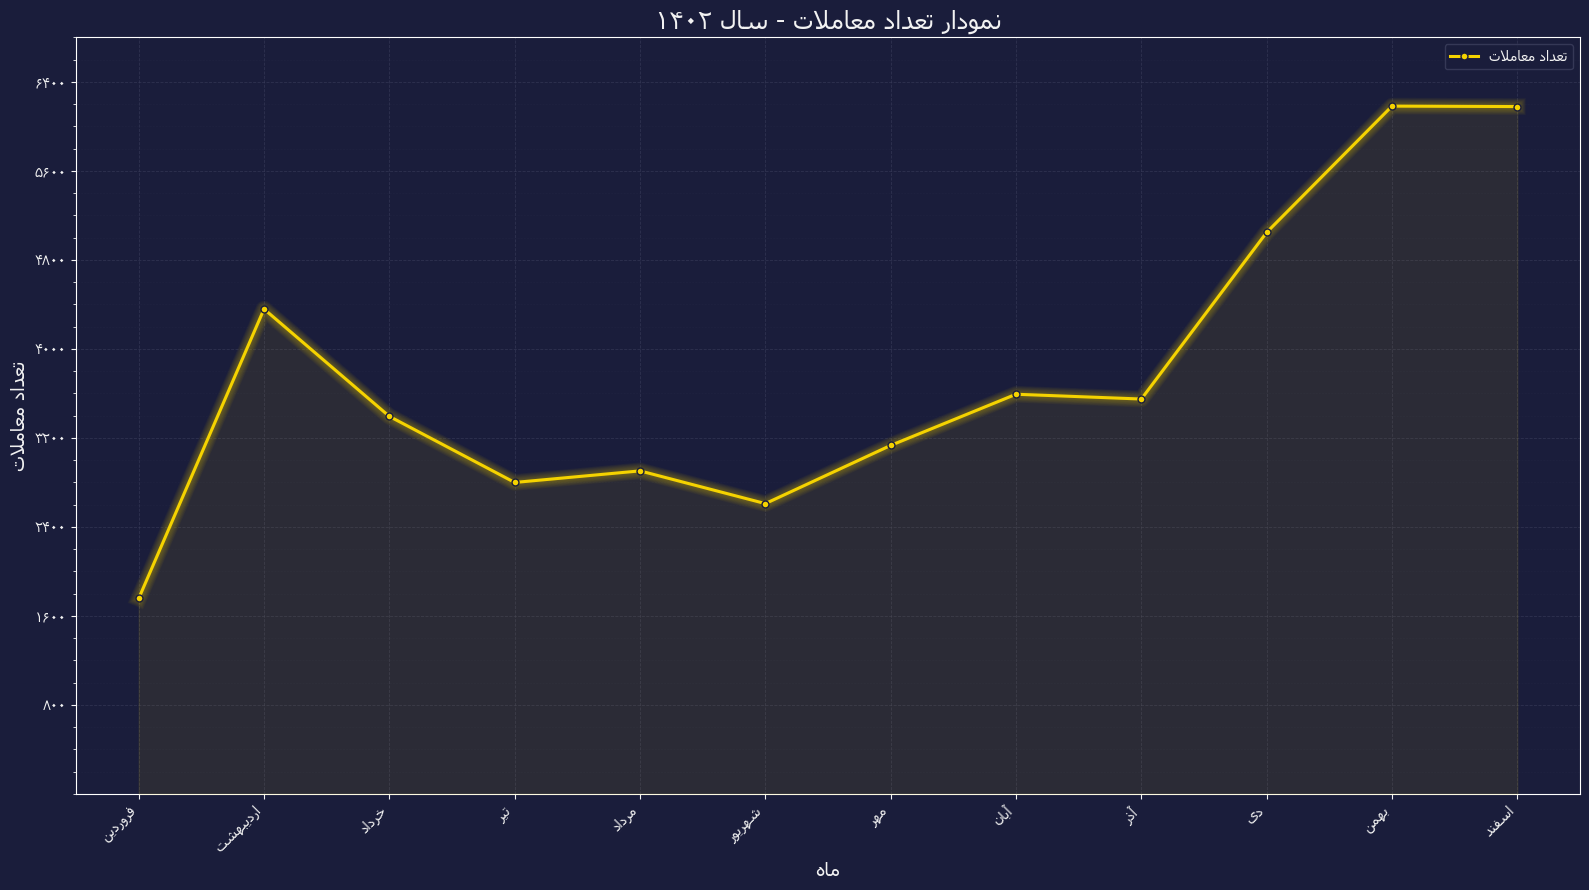

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ اصلی نمودار تعداد معاملات (زرد) ---
main_line_color_transactions = '#F5D300'
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

# تابع تبدیل اعداد به فارسی
def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    # حذف کاما قبل از تبدیل، اگرچه فرمت کننده باید این را مدیریت کند
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای اعداد صحیح بزرگ (مانند تعداد معاملات)
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}' # جداکننده هزارگان
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables.columns:
            if df_all_variables[col].dtype == 'object':
                df_all_variables[col] = df_all_variables[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables[col] = pd.to_numeric(df_all_variables[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed_year_102 = df_all_variables[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            # --- تغییر برای استفاده از داده "تعداد معاملات" ---
            data_row_name = 'تعداد معاملات' 

            if data_row_name in df_processed_year_102.index:
                transactions_data = df_processed_year_102.loc[data_row_name].astype(float) # float برای سازگاری با NaN
                time_periods = columns_year_102
                x_numeric = np.arange(len(time_periods))

                fig, ax = plt.subplots(figsize=(16, 9))
                
                font_name_to_use = 'Tahoma' 
                plt.rcParams['font.family'] = font_name_to_use

                plot_title = get_persian_display(f'نمودار {data_row_name} - سال ۱۴۰۲')
                x_label_text = get_persian_display('ماه')
                y_label_text = get_persian_display(data_row_name)
                legend_label = get_persian_display(data_row_name)

                ax.plot(x_numeric, transactions_data, color=main_line_color_transactions, linewidth=2.2, linestyle='-', 
                        marker='o', markersize=5, markerfacecolor=main_line_color_transactions, markeredgecolor=new_background_color,
                        label=legend_label, zorder=10)

                n_shades = 10
                diff_linewidth = 1.0 
                alpha_value = 0.035 

                for n in range(1, n_shades + 1):
                    ax.plot(x_numeric, transactions_data,
                            linewidth=2.2 + (diff_linewidth * n), 
                            alpha=alpha_value,
                            color=main_line_color_transactions,
                            linestyle='-', 
                            marker='', 
                            zorder=9)
                
                # تعداد معاملات از صفر شروع می شود
                ax.fill_between(x_numeric, transactions_data, 0, color=main_line_color_transactions, alpha=0.08, zorder=5)


                ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
                ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                
                processed_time_periods = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                
                ax.set_xticks(x_numeric) 
                ax.set_xticklabels(processed_time_periods, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)

                # --- استفاده از فرمت‌کننده مناسب برای محور Y ---
                ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(large_int_y_tick_formatter)) # تغییر به فرمت کننده اعداد بزرگ
                ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # تعداد خطوط فرعی مانند نمودار قیمت
                
                ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
                ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                # تنظیم محدوده محور Y
                ax.set_ylim(bottom=0) # تعداد معاملات از صفر شروع می شود
                if not transactions_data.empty: # اگر داده ای برای تنظیم سقف وجود دارد
                    padding_factor = 0.10
                    data_max = transactions_data.max()
                    ax.set_ylim(top=data_max * (1 + padding_factor) if data_max > 0 else 1) # کمی فضا در بالا

                if len(x_numeric) > 0:
                    ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
                else:
                    ax.set_xlim(left=-0.5, right=0.5)

                legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
                for text_obj in legend.get_texts():
                    text_obj.set_color(plt.rcParams['text.color'])

                fig.tight_layout()
                plt.show()

            else:
                print(get_persian_display(f"خطا: ردیف با نام '{data_row_name}' در داده‌های سال 102 یافت نشد."))
                if 'df_processed_year_102' in locals():
                     print(get_persian_display("ردیف‌های موجود در داده‌های سال 102 عبارتند از:"), get_persian_display(str(df_processed_year_102.index.tolist())))
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))

12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


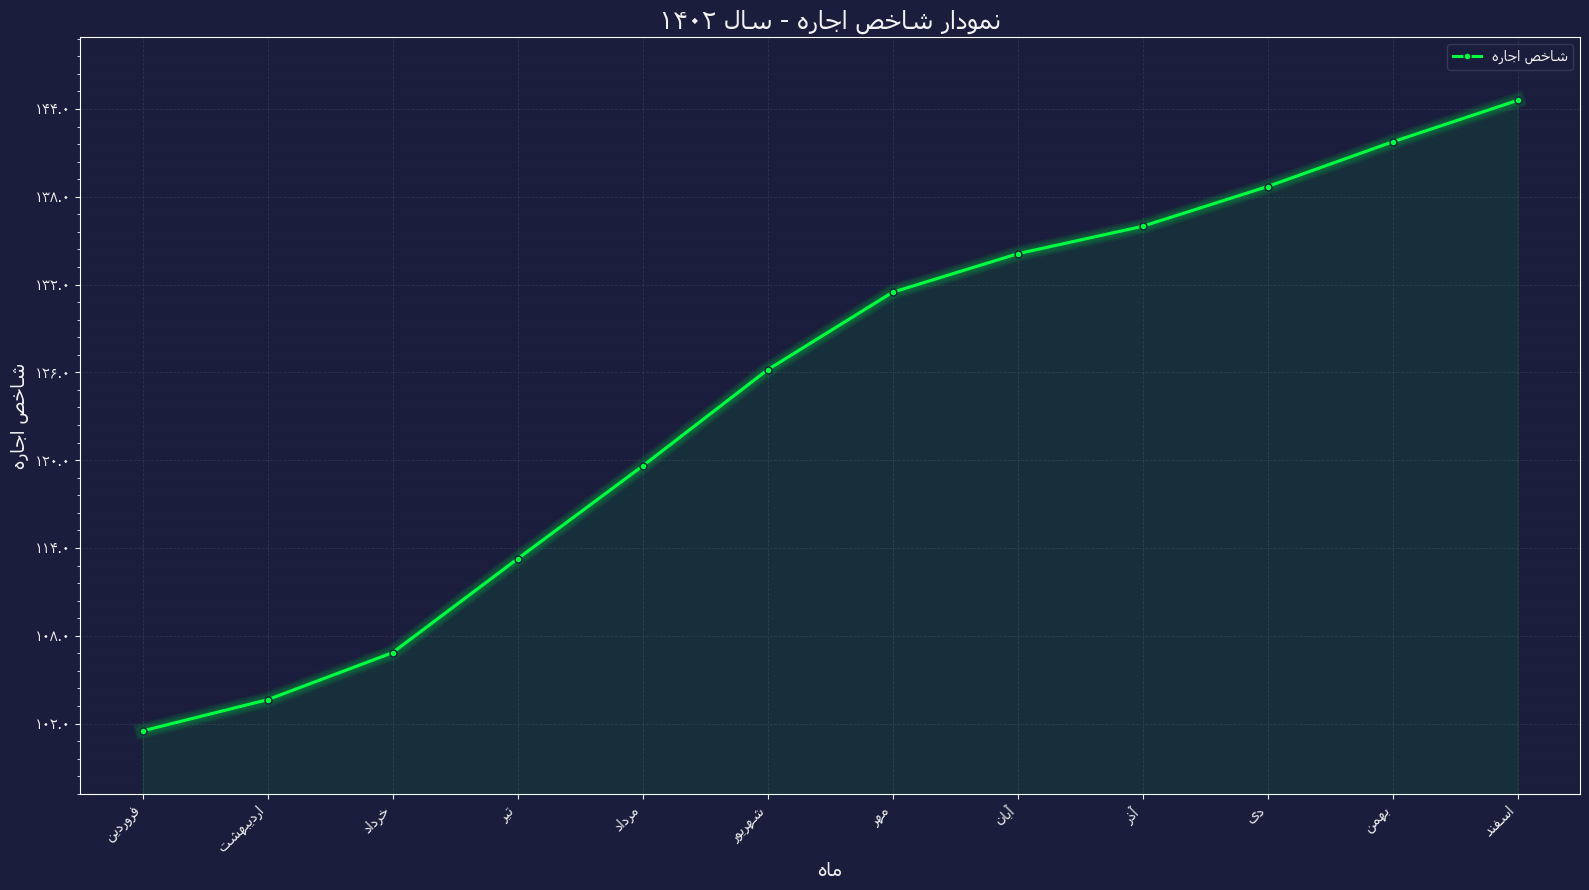

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ اصلی نمودار شاخص اجاره (سبز ماتریکسی) ---
main_line_color_rental = '#00ff41'
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

# تابع تبدیل اعداد به فارسی
def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای اعداد اعشاری (مانند شاخص اجاره)
def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}' # نمایش یک رقم اعشار
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables.columns:
            if df_all_variables[col].dtype == 'object':
                df_all_variables[col] = df_all_variables[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables[col] = pd.to_numeric(df_all_variables[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed_year_102 = df_all_variables[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            # --- تغییر برای استفاده از داده "شاخص اجاره" ---
            data_row_name = 'شاخص اجاره' 

            if data_row_name in df_processed_year_102.index:
                rental_data = df_processed_year_102.loc[data_row_name].astype(float)
                time_periods = columns_year_102
                x_numeric = np.arange(len(time_periods))

                fig, ax = plt.subplots(figsize=(16, 9))
                
                font_name_to_use = 'Tahoma' 
                plt.rcParams['font.family'] = font_name_to_use

                plot_title = get_persian_display(f'نمودار {data_row_name} - سال ۱۴۰۲')
                x_label_text = get_persian_display('ماه')
                y_label_text = get_persian_display(data_row_name)
                legend_label = get_persian_display(data_row_name)

                ax.plot(x_numeric, rental_data, color=main_line_color_rental, linewidth=2.2, linestyle='-', 
                        marker='o', markersize=5, markerfacecolor=main_line_color_rental, markeredgecolor=new_background_color,
                        label=legend_label, zorder=10)

                n_shades = 10
                diff_linewidth = 1.0 
                alpha_value = 0.035 

                for n in range(1, n_shades + 1):
                    ax.plot(x_numeric, rental_data,
                            linewidth=2.2 + (diff_linewidth * n), 
                            alpha=alpha_value,
                            color=main_line_color_rental,
                            linestyle='-', 
                            marker='', 
                            zorder=9)
                
                # پایه برای fill_between برای شاخص اجاره
                min_rental_val = rental_data.min() if not rental_data.empty and rental_data.min() > 0 else 0 
                fill_base = min_rental_val * 0.9 if min_rental_val > 0 else 0
                ax.fill_between(x_numeric, rental_data, fill_base, color=main_line_color_rental, alpha=0.08, zorder=5)


                ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
                ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                
                processed_time_periods = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                
                ax.set_xticks(x_numeric) 
                ax.set_xticklabels(processed_time_periods, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)

                # --- استفاده از فرمت‌کننده مناسب برای محور Y ---
                ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(index_y_tick_formatter)) # تغییر به فرمت کننده اعداد اعشاری
                ax.yaxis.set_minor_locator(AutoMinorLocator(5)) 
                
                ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
                ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                # تنظیم محدوده محور Y بر اساس داده‌های شاخص اجاره
                if not rental_data.empty:
                    padding_factor = 0.10 
                    data_min = rental_data.min()
                    data_max = rental_data.max()
                    range_rental = data_max - data_min
                    if range_rental == 0 : range_rental = abs(data_max * 0.2) if data_max != 0 else 0.2
                    
                    ax.set_ylim(bottom = data_min - (range_rental * padding_factor) if data_min > 0 else data_min * (1+padding_factor if data_min < 0 else 1-padding_factor), 
                                top = data_max + (range_rental * padding_factor))
                else:
                    ax.set_ylim(bottom=0, top=1)


                if len(x_numeric) > 0:
                    ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
                else:
                    ax.set_xlim(left=-0.5, right=0.5)

                legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
                for text_obj in legend.get_texts():
                    text_obj.set_color(plt.rcParams['text.color'])

                fig.tight_layout()
                plt.show()

            else:
                print(get_persian_display(f"خطا: ردیف با نام '{data_row_name}' در داده‌های سال 102 یافت نشد."))
                if 'df_processed_year_102' in locals():
                     print(get_persian_display("ردیف‌های موجود در داده‌های سال 102 عبارتند از:"), get_persian_display(str(df_processed_year_102.index.tolist())))
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


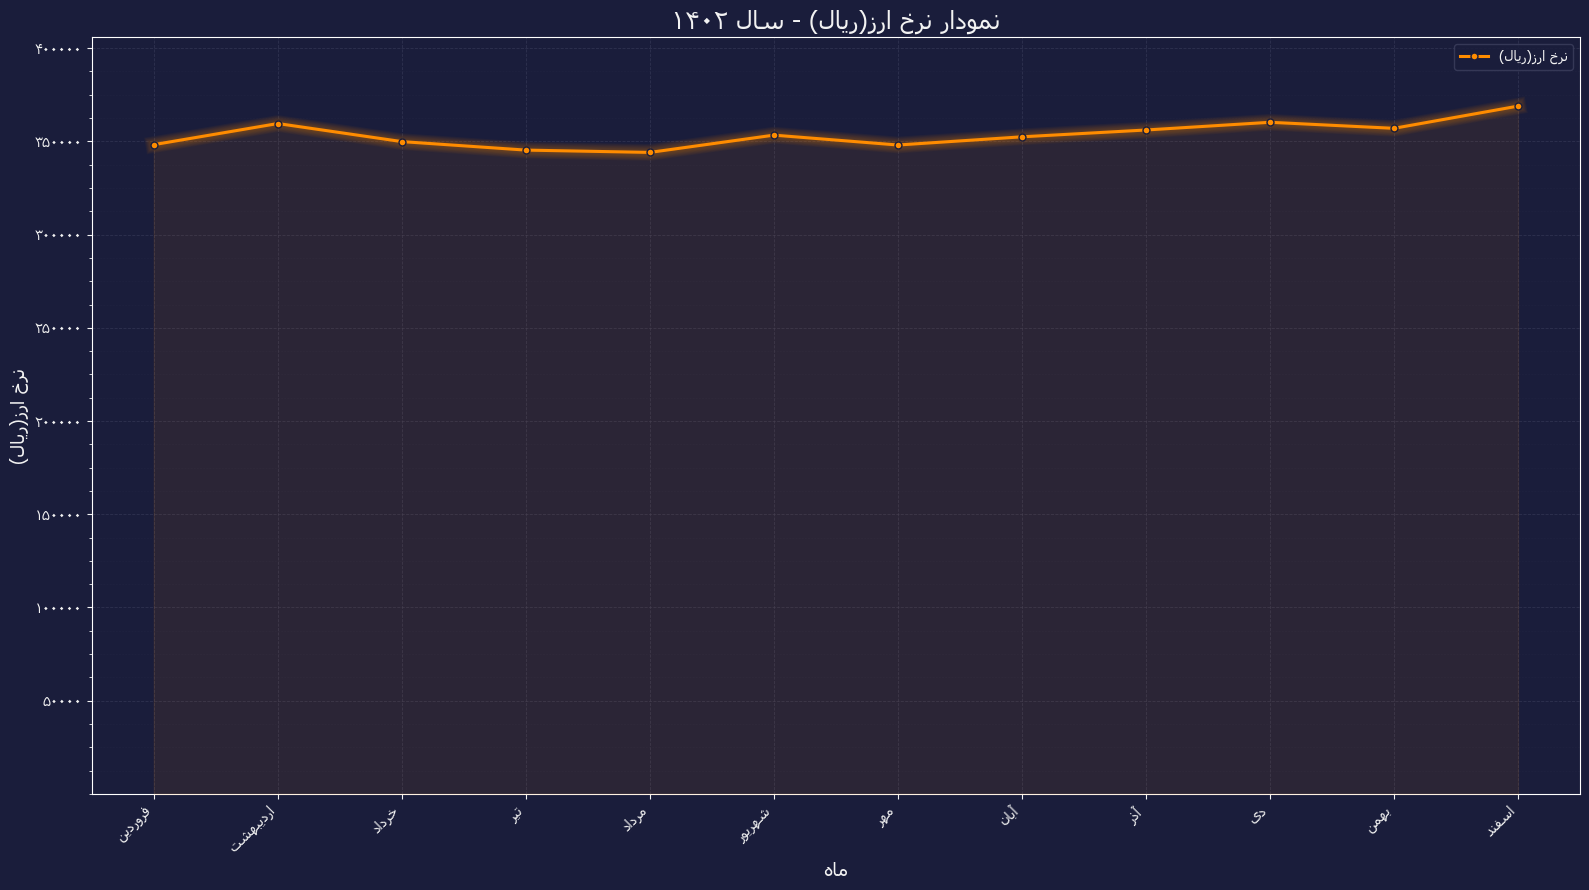

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background") # پایه استایل تیره

# تنظیمات رنگ برای متن و پس زمینه
new_background_color = '#1A1D3B' # رنگ پس زمینه جدید (آبی/بنفش تیره)
text_color_on_dark = '0.95' # خاکستری بسیار روشن (نزدیک به سفید)

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

# --- رنگ اصلی نمودار نرخ ارز (نارنجی تیره) ---
main_line_color_exchange_rate = '#FF8C00'
grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

# تابع تبدیل اعداد به فارسی
def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '') # حذف کاما قبل از تبدیل
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای اعداد صحیح بزرگ (مانند نرخ ارز)
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}' # جداکننده هزارگان
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables.columns:
            if df_all_variables[col].dtype == 'object':
                df_all_variables[col] = df_all_variables[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables[col] = pd.to_numeric(df_all_variables[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed_year_102 = df_all_variables[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            # --- تغییر برای استفاده از داده "نرخ ارز(ریال)" ---
            data_row_name = 'نرخ ارز(ریال)' 

            if data_row_name in df_processed_year_102.index:
                exchange_rate_data = df_processed_year_102.loc[data_row_name].astype(float)
                time_periods = columns_year_102
                x_numeric = np.arange(len(time_periods))

                fig, ax = plt.subplots(figsize=(16, 9))
                
                font_name_to_use = 'Tahoma' 
                plt.rcParams['font.family'] = font_name_to_use

                plot_title = get_persian_display(f'نمودار {data_row_name} - سال ۱۴۰۲')
                x_label_text = get_persian_display('ماه')
                y_label_text = get_persian_display(data_row_name)
                legend_label = get_persian_display(data_row_name)

                ax.plot(x_numeric, exchange_rate_data, color=main_line_color_exchange_rate, linewidth=2.2, linestyle='-', 
                        marker='o', markersize=5, markerfacecolor=main_line_color_exchange_rate, markeredgecolor=new_background_color,
                        label=legend_label, zorder=10)

                n_shades = 10
                diff_linewidth = 1.0 
                alpha_value = 0.035 

                for n in range(1, n_shades + 1):
                    ax.plot(x_numeric, exchange_rate_data,
                            linewidth=2.2 + (diff_linewidth * n), 
                            alpha=alpha_value,
                            color=main_line_color_exchange_rate,
                            linestyle='-', 
                            marker='', 
                            zorder=9)
                
                # نرخ ارز از صفر شروع می شود
                ax.fill_between(x_numeric, exchange_rate_data, 0, color=main_line_color_exchange_rate, alpha=0.08, zorder=5)


                ax.set_title(plot_title, fontsize=18, color=plt.rcParams['text.color'])
                ax.set_xlabel(x_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                ax.set_ylabel(y_label_text, fontsize=14, color=plt.rcParams['axes.labelcolor'])
                
                processed_time_periods = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                
                ax.set_xticks(x_numeric) 
                ax.set_xticklabels(processed_time_periods, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)

                # --- استفاده از فرمت‌کننده مناسب برای محور Y ---
                ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(large_int_y_tick_formatter)) # تغییر به فرمت کننده اعداد بزرگ
                ax.yaxis.set_minor_locator(AutoMinorLocator(4)) 
                
                ax.tick_params(axis='x', colors=plt.rcParams['xtick.color'], labelsize=10)
                ax.tick_params(axis='y', colors=plt.rcParams['ytick.color'], labelsize=10)

                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                # تنظیم محدوده محور Y
                ax.set_ylim(bottom=0) # نرخ ارز از صفر شروع می شود
                if not exchange_rate_data.empty: 
                    padding_factor = 0.10
                    data_max = exchange_rate_data.max()
                    ax.set_ylim(top=data_max * (1 + padding_factor) if data_max > 0 else 1) # کمی فضا در بالا

                if len(x_numeric) > 0:
                    ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
                else:
                    ax.set_xlim(left=-0.5, right=0.5)

                legend = ax.legend(frameon=True, loc='best', facecolor=plt.rcParams['axes.facecolor'], edgecolor=grid_color)
                for text_obj in legend.get_texts():
                    text_obj.set_color(plt.rcParams['text.color'])

                fig.tight_layout()
                plt.show()

            else:
                print(get_persian_display(f"خطا: ردیف با نام '{data_row_name}' در داده‌های سال 102 یافت نشد."))
                if 'df_processed_year_102' in locals():
                     print(get_persian_display("ردیف‌های موجود در داده‌های سال 102 عبارتند از:"), get_persian_display(str(df_processed_year_102.index.tolist())))
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


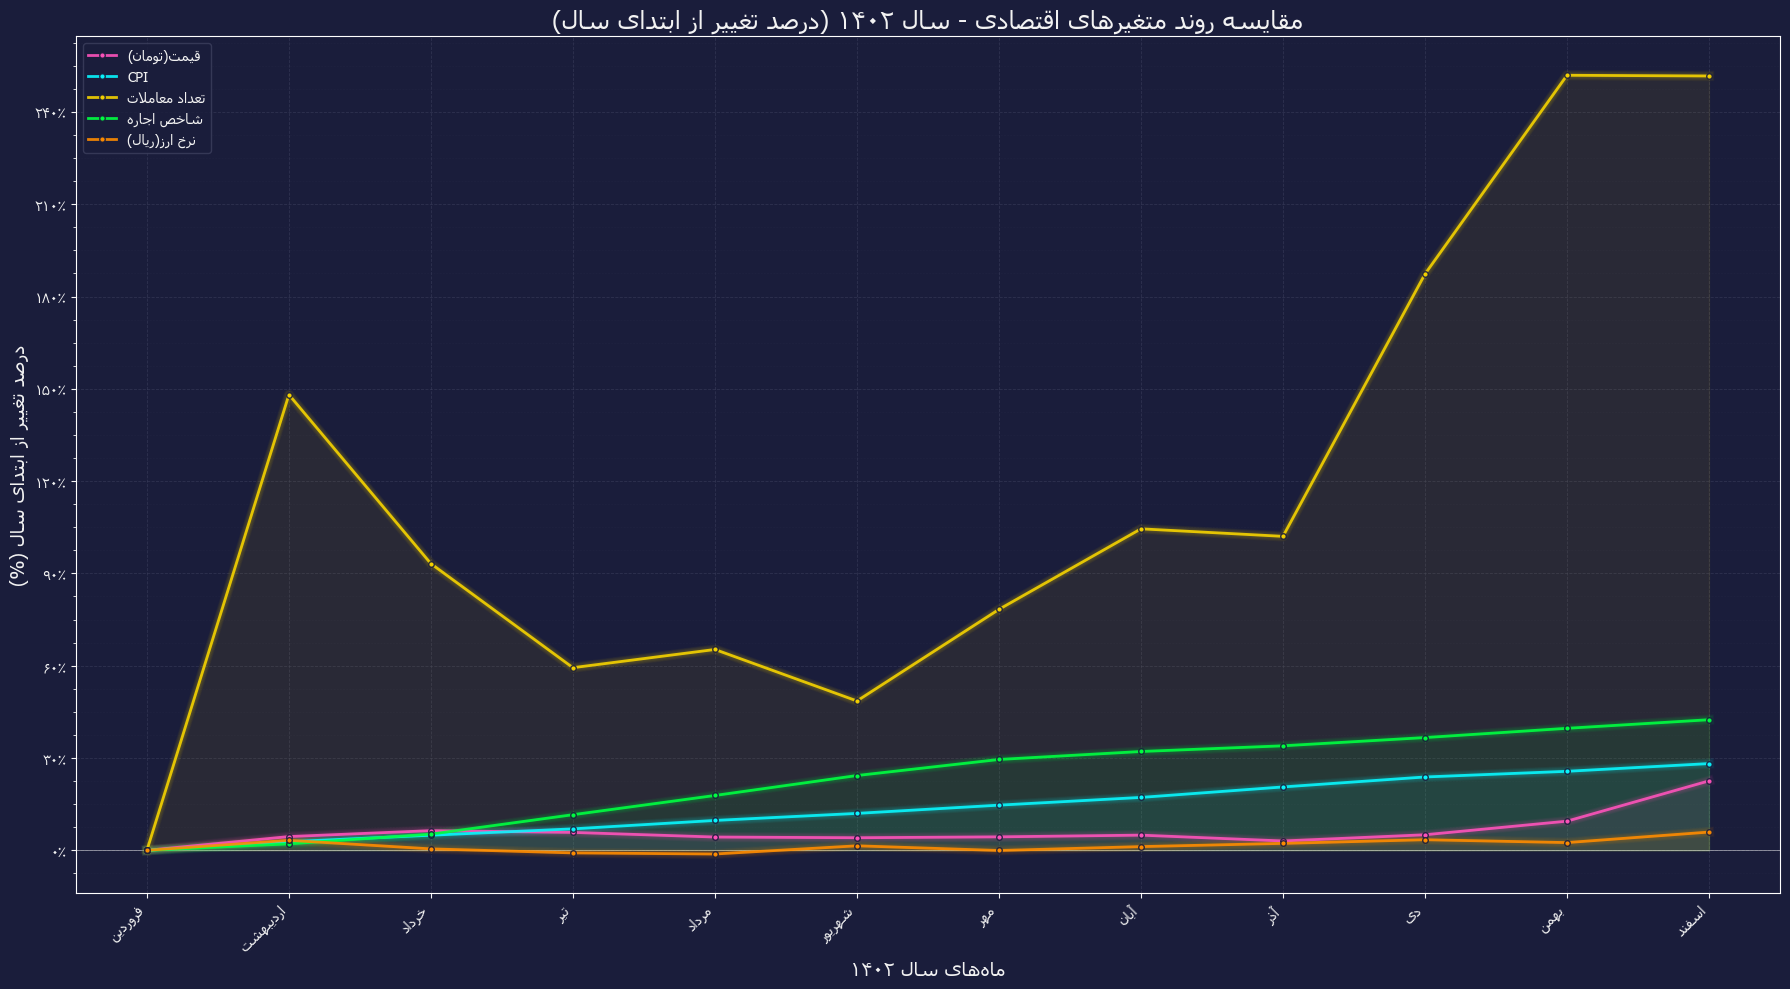

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '') # حذف کاما قبل از تبدیل
    persian_numerals_map = str.maketrans("0123456789.-%", "۰۱۲۳۴۵۶۷۸۹.-٪") # اضافه کردن درصد
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای محور Y (درصد)
def percentage_y_tick_formatter(value, pos):
    formatted_value = f'{value:.0f}%' # نمایش درصد به صورت عدد صحیح
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables_original = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables_original.columns:
            if df_all_variables_original[col].dtype == 'object':
                df_all_variables_original[col] = df_all_variables_original[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables_original[col] = pd.to_numeric(df_all_variables_original[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables_original.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed = df_all_variables_original[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            variables_config = {
                'قیمت(تومان)': {'color': '#FE53BB'}, # حذف change_threshold_pct
                'CPI': {'color': '#08F7FE'},
                'تعداد معاملات': {'color': '#F5D300'},
                'شاخص اجاره': {'color': '#00ff41'},
                'نرخ ارز(ریال)': {'color': '#FF8C00'}
            }
            plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

            # --- ایجاد یک نمودار واحد ---
            fig, ax = plt.subplots(figsize=(18, 10)) # یک محور برای همه نمودارها
            
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            for var_name in plot_order:
                if var_name not in df_processed.index:
                    print(f"هشدار: ردیف '{var_name}' در دیتافریم سال 102 یافت نشد. از رسم آن صرف نظر می شود.")
                    continue

                raw_series_year_102 = df_processed.loc[var_name].astype(float).interpolate()
                if raw_series_year_102.empty:
                    print(f"سری داده برای '{var_name}' در سال 102 خالی است.")
                    continue
                
                first_value_102 = raw_series_year_102.iloc[0]
                if pd.isna(first_value_102) or first_value_102 == 0:
                    print(f"مقدار اولیه برای '{var_name}' در سال 102 صفر یا NaN است. امکان محاسبه درصد تغییر وجود ندارد.")
                    normalized_series = pd.Series(np.nan, index=raw_series_year_102.index) # یا رسم خط صاف در صفر
                else:
                    normalized_series = (raw_series_year_102 / first_value_102 - 1) * 100
                
                plot_config = variables_config[var_name]
                current_color = plot_config['color']
                
                # --- رسم خط اصلی با مارکر و افکت تابش ---
                main_linewidth = 2.0
                main_alpha = 0.9 # شفافیت خط اصلی

                # 1. رسم خط اصلی با مارکر
                ax.plot(x_numeric, normalized_series, 
                        color=current_color, 
                        linewidth=main_linewidth, 
                        linestyle='-', 
                        marker='o', markersize=4, 
                        markerfacecolor=current_color, 
                        markeredgecolor=new_background_color,
                        label=get_persian_display(var_name), 
                        zorder=8, # بالاتر از تابش و ناحیه پر شده
                        alpha=main_alpha)

                # 2. افکت تابش کلی (با رنگ اصلی سری)
                n_shades_glow = 7 
                diff_linewidth_glow = 0.8 
                alpha_value_glow = 0.035 # کمی واضح تر از قبل
                for n in range(1, n_shades_glow + 1):
                    ax.plot(x_numeric, normalized_series, 
                            linewidth=main_linewidth + (diff_linewidth_glow * n), 
                            alpha=alpha_value_glow,
                            color=current_color, 
                            linestyle='-', 
                            marker='', 
                            zorder=7) # پشت خط اصلی

                # 3. پر کردن ناحیه زیر نمودار نرمال شده (از خط صفر درصد تغییر)
                ax.fill_between(x_numeric, normalized_series, 0, color=current_color, alpha=0.07, zorder=5) # پایین ترین لایه

            # --- تنظیمات کلی نمودار واحد ---
            ax.set_title(get_persian_display('مقایسه روند متغیرهای اقتصادی - سال ۱۴۰۲ (درصد تغییر از ابتدای سال)'), fontsize=18)
            ax.set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)
            ax.set_ylabel(get_persian_display('درصد تغییر از ابتدای سال (%)'), fontsize=14)
            
            if len(x_numeric) > 0 :
                processed_time_periods_year_102 = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                ax.set_xticks(x_numeric)
                ax.set_xticklabels(processed_time_periods_year_102, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
                ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
            else: 
                ax.set_xticks([])
                ax.set_xticklabels([])

            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(percentage_y_tick_formatter))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.tick_params(axis='y', labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            ax.axhline(0, color=text_color_on_dark, linestyle='-', linewidth=0.7, alpha=0.5, zorder=6)

            legend = ax.legend(frameon=True, loc='best', facecolor=new_background_color, edgecolor=grid_color, fontsize=10)
            if legend: 
                for text_obj in legend.get_texts():
                     text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()
            
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


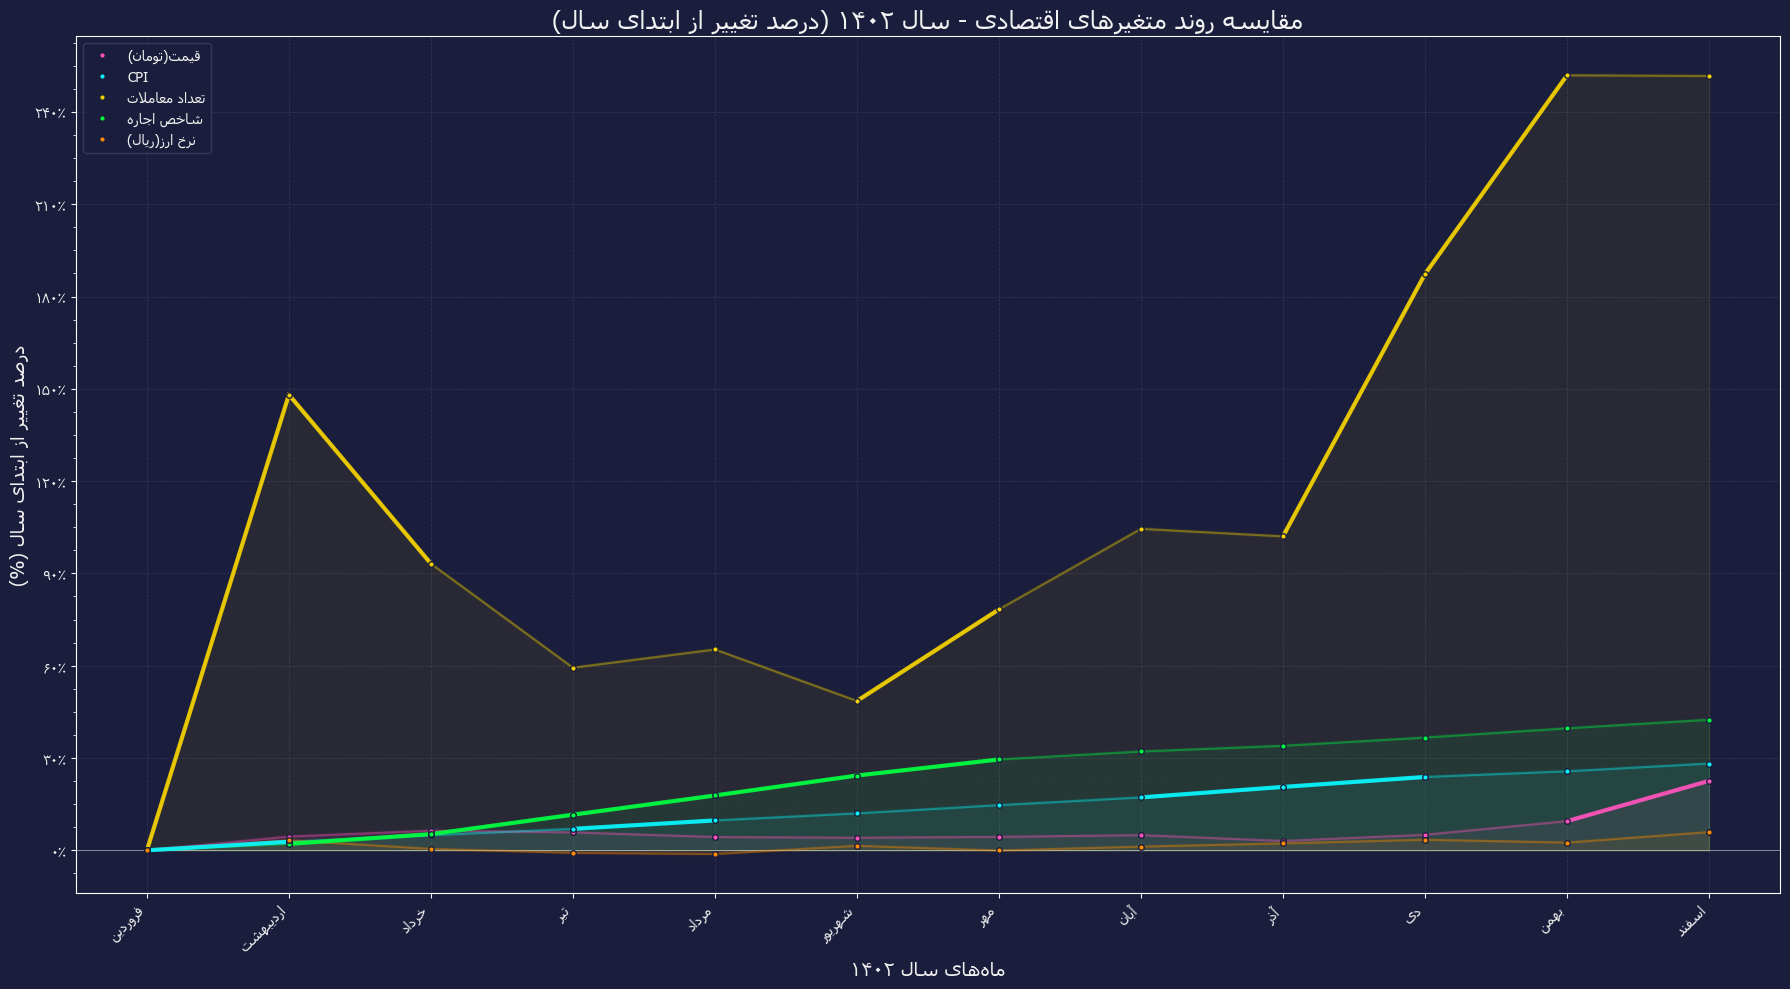

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '') # حذف کاما قبل از تبدیل
    persian_numerals_map = str.maketrans("0123456789.-%", "۰۱۲۳۴۵۶۷۸۹.-٪") # اضافه کردن درصد
    return text_str.translate(persian_numerals_map)

# فرمت کننده برای محور Y (درصد)
def percentage_y_tick_formatter(value, pos):
    formatted_value = f'{value:.0f}%' # نمایش درصد به صورت عدد صحیح
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables_original = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables_original.columns:
            if df_all_variables_original[col].dtype == 'object':
                df_all_variables_original[col] = df_all_variables_original[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables_original[col] = pd.to_numeric(df_all_variables_original[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables_original.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed = df_all_variables_original[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            variables_config = {
                'قیمت(تومان)': {'color': '#FE53BB', 'change_threshold_pct': 10.0},
                'CPI': {'color': '#08F7FE', 'change_threshold_pct': 2.5},
                'تعداد معاملات': {'color': '#F5D300', 'change_threshold_pct': 20.0},
                'شاخص اجاره': {'color': '#00ff41', 'change_threshold_pct': 3.0},
                'نرخ ارز(ریال)': {'color': '#FF8C00', 'change_threshold_pct': 10.0}
            }
            plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

            # --- ایجاد یک نمودار واحد ---
            fig, ax = plt.subplots(figsize=(18, 10)) # یک محور برای همه نمودارها
            
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            for var_name in plot_order:
                if var_name not in df_processed.index:
                    print(f"هشدار: ردیف '{var_name}' در دیتافریم سال 102 یافت نشد. از رسم آن صرف نظر می شود.")
                    continue

                raw_series_year_102 = df_processed.loc[var_name].astype(float).interpolate()
                if raw_series_year_102.empty:
                    print(f"سری داده برای '{var_name}' در سال 102 خالی است.")
                    continue
                
                # نرمال سازی نسبت به اولین مقدار سال 102
                first_value_102 = raw_series_year_102.iloc[0]
                if pd.isna(first_value_102) or first_value_102 == 0:
                    print(f"مقدار اولیه برای '{var_name}' در سال 102 صفر یا NaN است. امکان محاسبه درصد تغییر وجود ندارد.")
                    normalized_series = pd.Series(0, index=raw_series_year_102.index) # رسم خط صاف در صفر
                else:
                    normalized_series = (raw_series_year_102 / first_value_102 - 1) * 100
                
                plot_config = variables_config[var_name]
                current_color = plot_config['color']
                threshold_pct = plot_config['change_threshold_pct']

                # شناسایی تغییرات شدید بر اساس داده های خام (غیرنرمال شده) همان سال
                pct_change_raw = raw_series_year_102.pct_change() * 100 
                significant_change_mask = (np.abs(pct_change_raw) >= threshold_pct).fillna(False)
                
                # 1. افکت تابش کلی (با رنگ اصلی سری)
                n_shades_glow = 5
                diff_linewidth_glow = 0.5
                alpha_value_glow = 0.02
                for n in range(1, n_shades_glow + 1):
                    ax.plot(x_numeric, normalized_series, linewidth=1.0 + (diff_linewidth_glow * n), alpha=alpha_value_glow,
                            color=current_color, linestyle='-', marker='', zorder=6)

                # 2. خط پایه نرمال شده (کم رنگ و نازک با رنگ اصلی سری)
                ax.plot(x_numeric, normalized_series, color=current_color, linewidth=1.5, linestyle='-', 
                        alpha=0.35, zorder=7) 

                # 3. سگمنت های با تغییر شدید (پررنگ تر و ضخیم تر با رنگ اصلی سری)
                #    این سگمنت ها روی نمودار نرمال شده رسم می شوند، اما بر اساس تغییرات شدید داده خام شناسایی می شوند
                for k in range(1, len(x_numeric)):
                    if significant_change_mask.iloc[k]: # اگر تغییر خام از k-1 به k شدید بود
                        ax.plot(x_numeric[k-1:k+1], normalized_series.iloc[k-1:k+1], 
                                color=current_color, 
                                linewidth=3.0, 
                                linestyle='-', 
                                alpha=0.9, 
                                zorder=8) 

                # 4. مارکرها در تمام نقاط داده نرمال شده (با رنگ اصلی سری)
                ax.plot(x_numeric, normalized_series, color=current_color, linewidth=0, 
                        marker='o', markersize=4, markerfacecolor=current_color, markeredgecolor=new_background_color,
                        label=get_persian_display(var_name), zorder=10)

                # پر کردن ناحیه زیر نمودار نرمال شده (از خط صفر درصد تغییر)
                ax.fill_between(x_numeric, normalized_series, 0, color=current_color, alpha=0.07, zorder=5)

            # --- تنظیمات کلی نمودار واحد ---
            ax.set_title(get_persian_display('مقایسه روند متغیرهای اقتصادی - سال ۱۴۰۲ (درصد تغییر از ابتدای سال)'), fontsize=18)
            ax.set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)
            ax.set_ylabel(get_persian_display('درصد تغییر از ابتدای سال (%)'), fontsize=14)
            
            if len(x_numeric) > 0 :
                processed_time_periods_year_102 = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                ax.set_xticks(x_numeric)
                ax.set_xticklabels(processed_time_periods_year_102, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
                ax.set_xlim(left=x_numeric[0]-0.5, right=x_numeric[-1]+0.5)
            else: # اگر هیچ داده ای برای محور X نیست
                ax.set_xticks([])
                ax.set_xticklabels([])


            ax.yaxis.set_major_locator(MaxNLocator(nbins=10, prune='both'))
            ax.yaxis.set_major_formatter(FuncFormatter(percentage_y_tick_formatter))
            ax.yaxis.set_minor_locator(AutoMinorLocator(4))
            ax.tick_params(axis='y', labelsize=10)

            ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
            ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
            
            ax.axhline(0, color=text_color_on_dark, linestyle='-', linewidth=0.7, alpha=0.5, zorder=6) # خط مبنای صفر درصد

            legend = ax.legend(frameon=True, loc='best', facecolor=new_background_color, edgecolor=grid_color, fontsize=10)
            if legend: # بررسی وجود لجند قبل از دسترسی به متون آن
                for text_obj in legend.get_texts():
                     text_obj.set_color(plt.rcParams['text.color'])

            fig.tight_layout()
            plt.show()
            
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


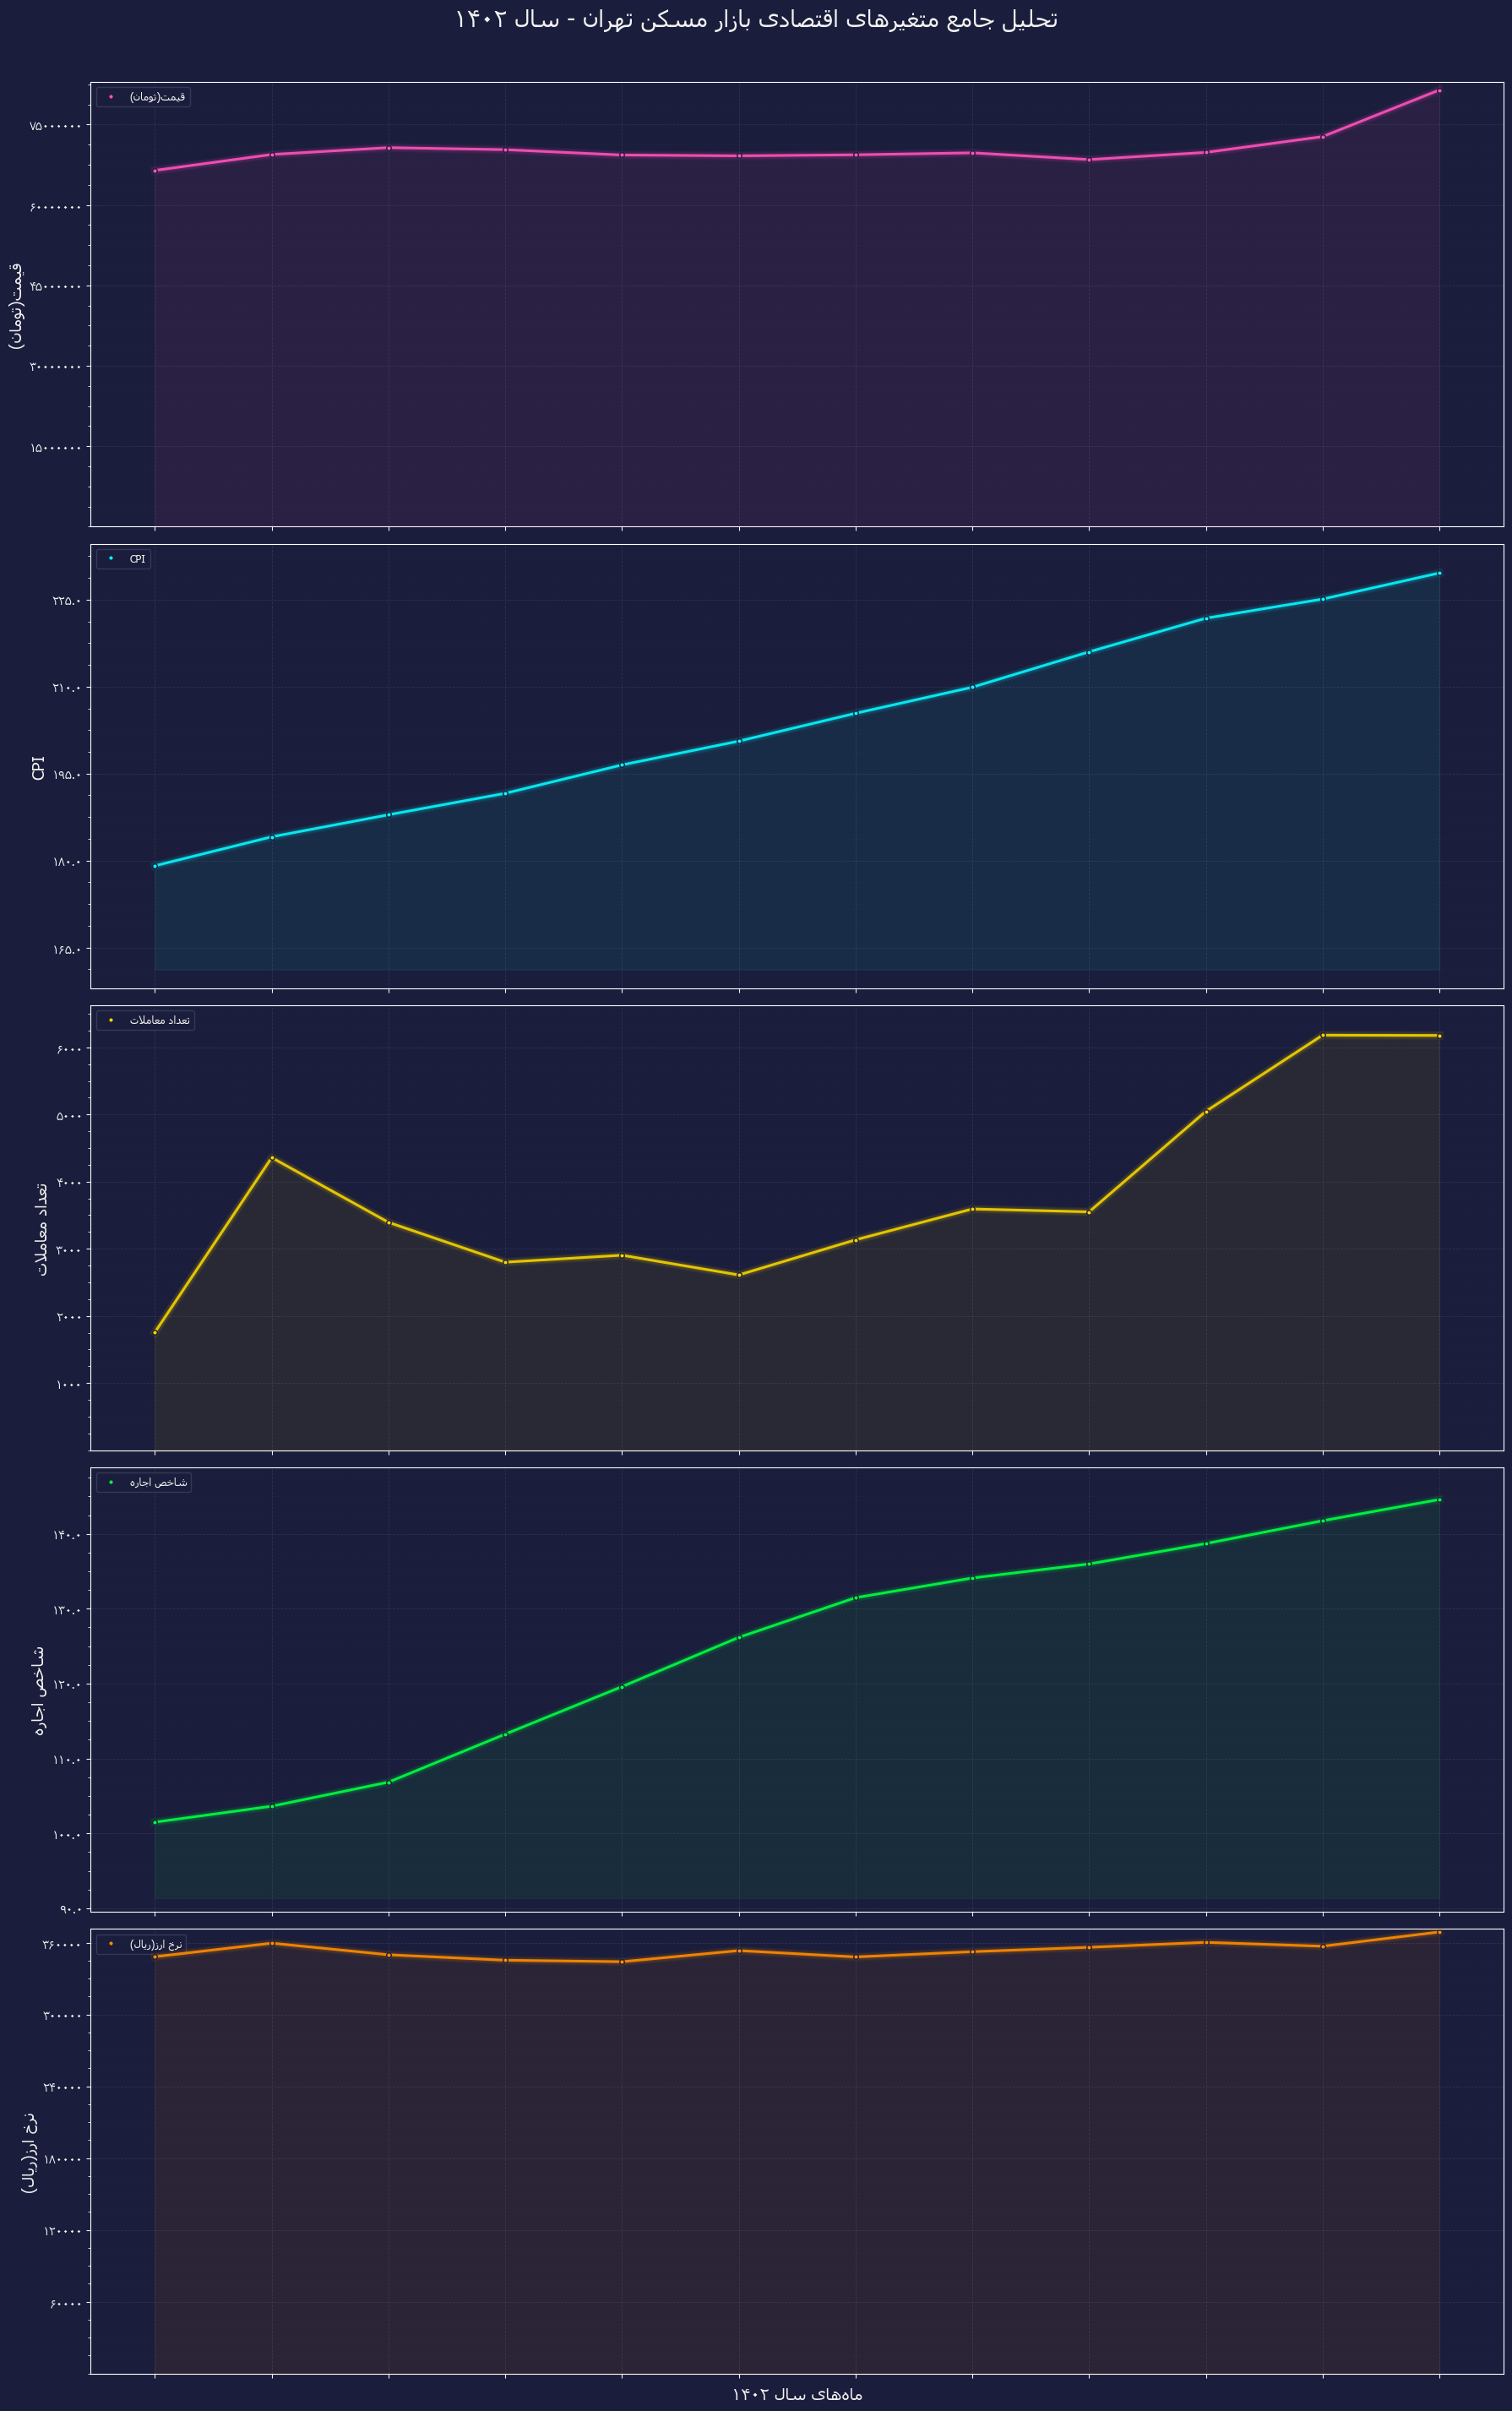

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use


# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده ها برای محور Y
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables_original = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables_original.columns:
            if df_all_variables_original[col].dtype == 'object':
                df_all_variables_original[col] = df_all_variables_original[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables_original[col] = pd.to_numeric(df_all_variables_original[col], errors='coerce')
        
        columns_year_102 = [col for col in df_all_variables_original.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed = df_all_variables_original[columns_year_102].copy()
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            variables_to_plot = {
                'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0}, # حذف change_threshold_pct
                'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9},
                'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0},
                'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9},
                'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0}
            }
            
            plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

            fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 30), sharex=True)
            
            time_periods = df_processed.columns.tolist()
            x_numeric = np.arange(len(time_periods))

            for i, var_name in enumerate(plot_order):
                ax = axes[i]
                if var_name not in df_processed.index:
                    print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. این زیرنمودار خالی خواهد بود.")
                    ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                    ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                    continue

                data_series = df_processed.loc[var_name].astype(float).interpolate()
                if data_series.empty:
                    print(f"سری داده برای '{var_name}' در سال 102 پس از پردازش خالی است.")
                    ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                    ax.text(0.5, 0.5, get_persian_display("داده برای نمایش موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                    continue

                plot_config = variables_to_plot[var_name]
                current_color = plot_config['color']
                
                main_linewidth = 2.2
                main_alpha = 0.9 # شفافیت برای خط اصلی یکنواخت

                # 1. افکت تابش کلی (با رنگ اصلی سری) - پشت خط اصلی
                n_shades_glow = 7
                diff_linewidth_glow = 0.8
                alpha_value_glow = 0.035
                for n in range(1, n_shades_glow + 1):
                    ax.plot(x_numeric, data_series, 
                            linewidth=main_linewidth + (diff_linewidth_glow * n), # شروع از ضخامت خط اصلی
                            alpha=alpha_value_glow,
                            color=current_color, 
                            linestyle='-', 
                            marker='', 
                            zorder=7) # پشت خط اصلی

                # 2. رسم خط اصلی یکنواخت (بدون مارکر در این لایه)
                ax.plot(x_numeric, data_series, 
                        color=current_color, 
                        linewidth=main_linewidth, 
                        linestyle='-', 
                        alpha=main_alpha, 
                        zorder=8) # روی تابش

                # 3. رسم مارکرها در تمام نقاط داده (روی همه چیز)
                ax.plot(x_numeric, data_series, 
                        color=current_color, 
                        linewidth=0, # فقط مارکرها
                        marker='o', markersize=4, 
                        markerfacecolor=current_color, 
                        markeredgecolor=new_background_color,
                        label=get_persian_display(var_name), 
                        zorder=10) # بالاترین لایه

                # 4. پر کردن ناحیه زیر نمودار (با رنگ اصلی سری و شفافیت کم)
                fill_base_val = 0
                if 'fill_base' in plot_config:
                    fill_base_val = plot_config['fill_base']
                elif 'fill_base_factor' in plot_config:
                    min_val = data_series.min()
                    fill_base_val = (min_val * plot_config['fill_base_factor']) if not pd.isna(min_val) and min_val > 0 else 0
                
                ax.fill_between(x_numeric, data_series, fill_base_val, color=current_color, alpha=0.07, zorder=5) # پایین ترین لایه

                ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
                ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax.tick_params(axis='y', labelsize=10)

                padding_factor = 0.10 
                data_min_val = data_series.min() if not data_series.empty else 0
                data_max_val = data_series.max() if not data_series.empty else 1
                
                range_val = data_max_val - data_min_val
                if pd.isna(range_val) or range_val == 0 : range_val = abs(data_max_val * 0.2) if (not pd.isna(data_max_val) and data_max_val != 0) else 0.2
                
                current_bottom = data_min_val - (range_val * padding_factor) if not pd.isna(data_min_val) else 0
                current_top = data_max_val + (range_val * padding_factor) if not pd.isna(data_max_val) else 1

                if fill_base_val == 0 and (not pd.isna(data_min_val) and data_min_val >= 0):
                    current_bottom = 0
                elif 'fill_base_factor' in plot_config and (not pd.isna(fill_base_val)) and (not pd.isna(current_bottom)) and fill_base_val < current_bottom :
                     current_bottom = fill_base_val * 0.98 

                ax.set_ylim(bottom = current_bottom, top = current_top)
                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                handles, labels = ax.get_legend_handles_labels()
                if handles: # فقط اگر لجندی برای نمایش وجود دارد (از لایه مارکرها)
                     legend_main = ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize=9, 
                                             facecolor=new_background_color, edgecolor=grid_color)


            if len(x_numeric) > 0 and len(axes) > 0:
                processed_time_periods_year_102 = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                axes[-1].set_xticks(x_numeric)
                axes[-1].set_xticklabels(processed_time_periods_year_102, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
                axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)
            
                for ax_idx in range(len(axes) - 1):
                    axes[ax_idx].set_xticklabels([])
            elif len(axes) > 0:
                 axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)

            fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی بازار مسکن تهران - سال ۱۴۰۲'), fontsize=20)
            fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
            plt.show()
            
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


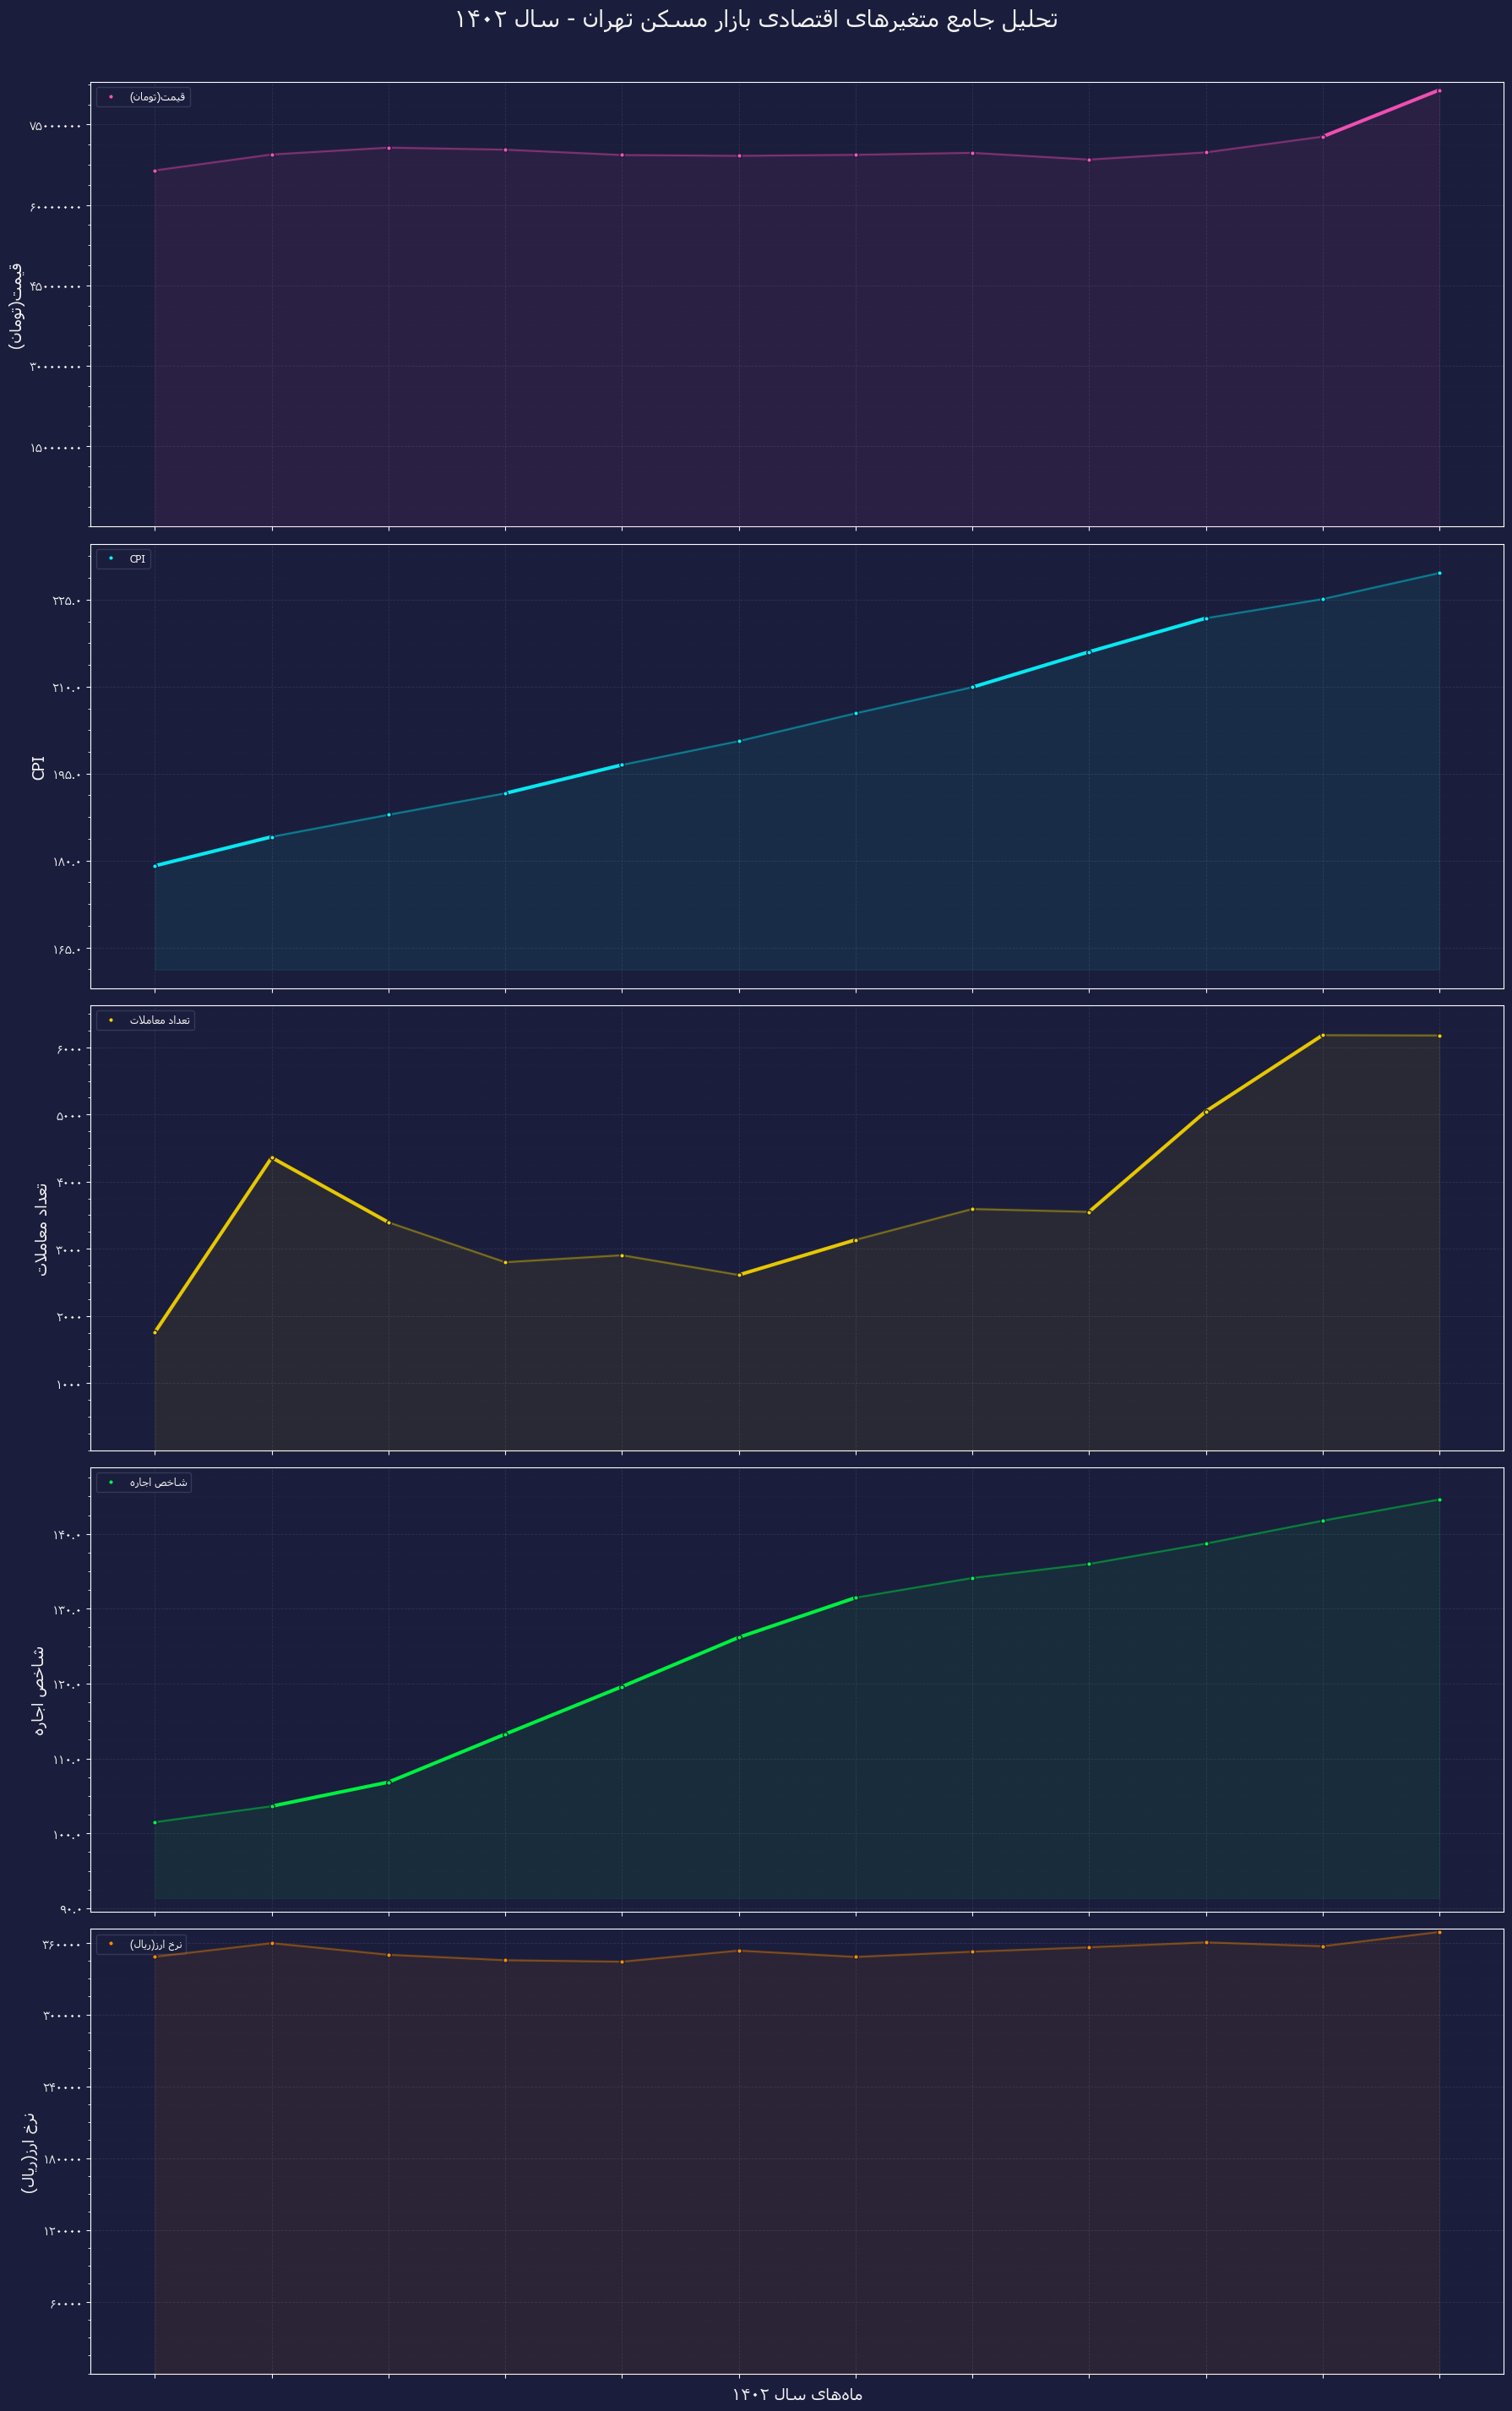

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")
    # print("متن‌های فارسی ممکن است به درستی نمایش داده نشوند.") # این پیام در کد شما بود

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'

# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده ها برای محور Y
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables_original = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables_original.columns:
            if df_all_variables_original[col].dtype == 'object':
                df_all_variables_original[col] = df_all_variables_original[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables_original[col] = pd.to_numeric(df_all_variables_original[col], errors='coerce')
        
        # --- فیلتر کردن داده‌ها برای سال 102 (1402 شمسی) ---
        columns_year_102 = [col for col in df_all_variables_original.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed = df_all_variables_original[columns_year_102].copy() # استفاده از داده های فیلتر شده
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            variables_to_plot = {
                'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0},
                'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 2.5},
                'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 20.0},
                'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 3.0},
                'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0}
            }
            
            plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

            fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 30), sharex=True)
            
            font_name_to_use = 'Tahoma'
            plt.rcParams['font.family'] = font_name_to_use
            
            time_periods = df_processed.columns.tolist() # استفاده از ستون های فیلتر شده
            x_numeric = np.arange(len(time_periods))

            for i, var_name in enumerate(plot_order):
                ax = axes[i]
                if var_name not in df_processed.index:
                    print(f"هشدار: ردیف '{var_name}' در دیتافریم یافت نشد. این زیرنمودار خالی خواهد بود.")
                    ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                    ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                    continue

                data_series = df_processed.loc[var_name].astype(float).interpolate()
                plot_config = variables_to_plot[var_name]
                current_color = plot_config['color']
                threshold_pct = plot_config['change_threshold_pct']

                pct_change = data_series.pct_change() * 100 
                significant_change_mask = (np.abs(pct_change) >= threshold_pct).fillna(False)
                
                n_shades_glow = 5
                diff_linewidth_glow = 0.5
                alpha_value_glow = 0.02
                for n in range(1, n_shades_glow + 1):
                    ax.plot(x_numeric, data_series, linewidth=1.0 + (diff_linewidth_glow * n), alpha=alpha_value_glow,
                            color=current_color, linestyle='-', marker='', zorder=6)

                ax.plot(x_numeric, data_series, color=current_color, linewidth=1.5, linestyle='-', 
                        alpha=0.35, zorder=7) 

                for k in range(1, len(x_numeric)):
                    if significant_change_mask.iloc[k]:
                        ax.plot(x_numeric[k-1:k+1], data_series.iloc[k-1:k+1], 
                                color=current_color, 
                                linewidth=3.0, 
                                linestyle='-', 
                                alpha=0.9, 
                                zorder=8) 

                ax.plot(x_numeric, data_series, color=current_color, linewidth=0, 
                        marker='o', markersize=4, markerfacecolor=current_color, markeredgecolor=new_background_color,
                        label=get_persian_display(var_name), zorder=10)

                fill_base_val = 0
                if 'fill_base' in plot_config:
                    fill_base_val = plot_config['fill_base']
                elif 'fill_base_factor' in plot_config:
                    min_val = data_series.min()
                    fill_base_val = (min_val * plot_config['fill_base_factor']) if min_val > 0 else 0
                
                ax.fill_between(x_numeric, data_series, fill_base_val, color=current_color, alpha=0.07, zorder=5)

                ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
                ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax.tick_params(axis='y', labelsize=10)

                padding_factor = 0.10 
                data_min_val = data_series.min() if not data_series.empty else 0
                data_max_val = data_series.max() if not data_series.empty else 1
                
                range_val = data_max_val - data_min_val
                if pd.isna(range_val) or range_val == 0 : range_val = abs(data_max_val * 0.2) if (not pd.isna(data_max_val) and data_max_val != 0) else 0.2
                
                current_bottom = data_min_val - (range_val * padding_factor) if not pd.isna(data_min_val) else 0
                current_top = data_max_val + (range_val * padding_factor) if not pd.isna(data_max_val) else 1

                if fill_base_val == 0 and (not pd.isna(data_min_val) and data_min_val >= 0):
                    current_bottom = 0
                elif 'fill_base_factor' in plot_config and (not pd.isna(fill_base_val)) and (not pd.isna(current_bottom)) and fill_base_val < current_bottom :
                     current_bottom = fill_base_val * 0.98 

                ax.set_ylim(bottom = current_bottom, top = current_top)
                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                handles, labels = ax.get_legend_handles_labels()
                if handles:
                     legend_main = ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize=9, 
                                             facecolor=new_background_color, edgecolor=grid_color)


            # --- تنظیمات محور X برای سال 1402 ---
            if len(x_numeric) > 0 and len(axes) > 0:
                # فقط نام ماه ها بدون سال برای برچسب محور X
                processed_time_periods_year_102 = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                
                axes[-1].set_xticks(x_numeric) # نمایش تیک برای هر ماه
                axes[-1].set_xticklabels(processed_time_periods_year_102, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
                axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)
            
                for ax_idx in range(len(axes) - 1):
                    axes[ax_idx].set_xticklabels([])
            elif len(axes) > 0:
                 axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)

            fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی بازار مسکن تهران - سال ۱۴۰۲'), fontsize=20)
            fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
            plt.show()
            
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



12 :ﺎﻫﻩﺎﻣ ﺩﺍﺪﻌﺗ .ﺪﻧﺪﺷ ﺮﺘﻠﯿﻓ (ﯽﺴﻤﺷ 1402) 102 ﻝﺎﺳ ﯼﺍﺮﺑ ﺎﻫﻩﺩﺍﺩ


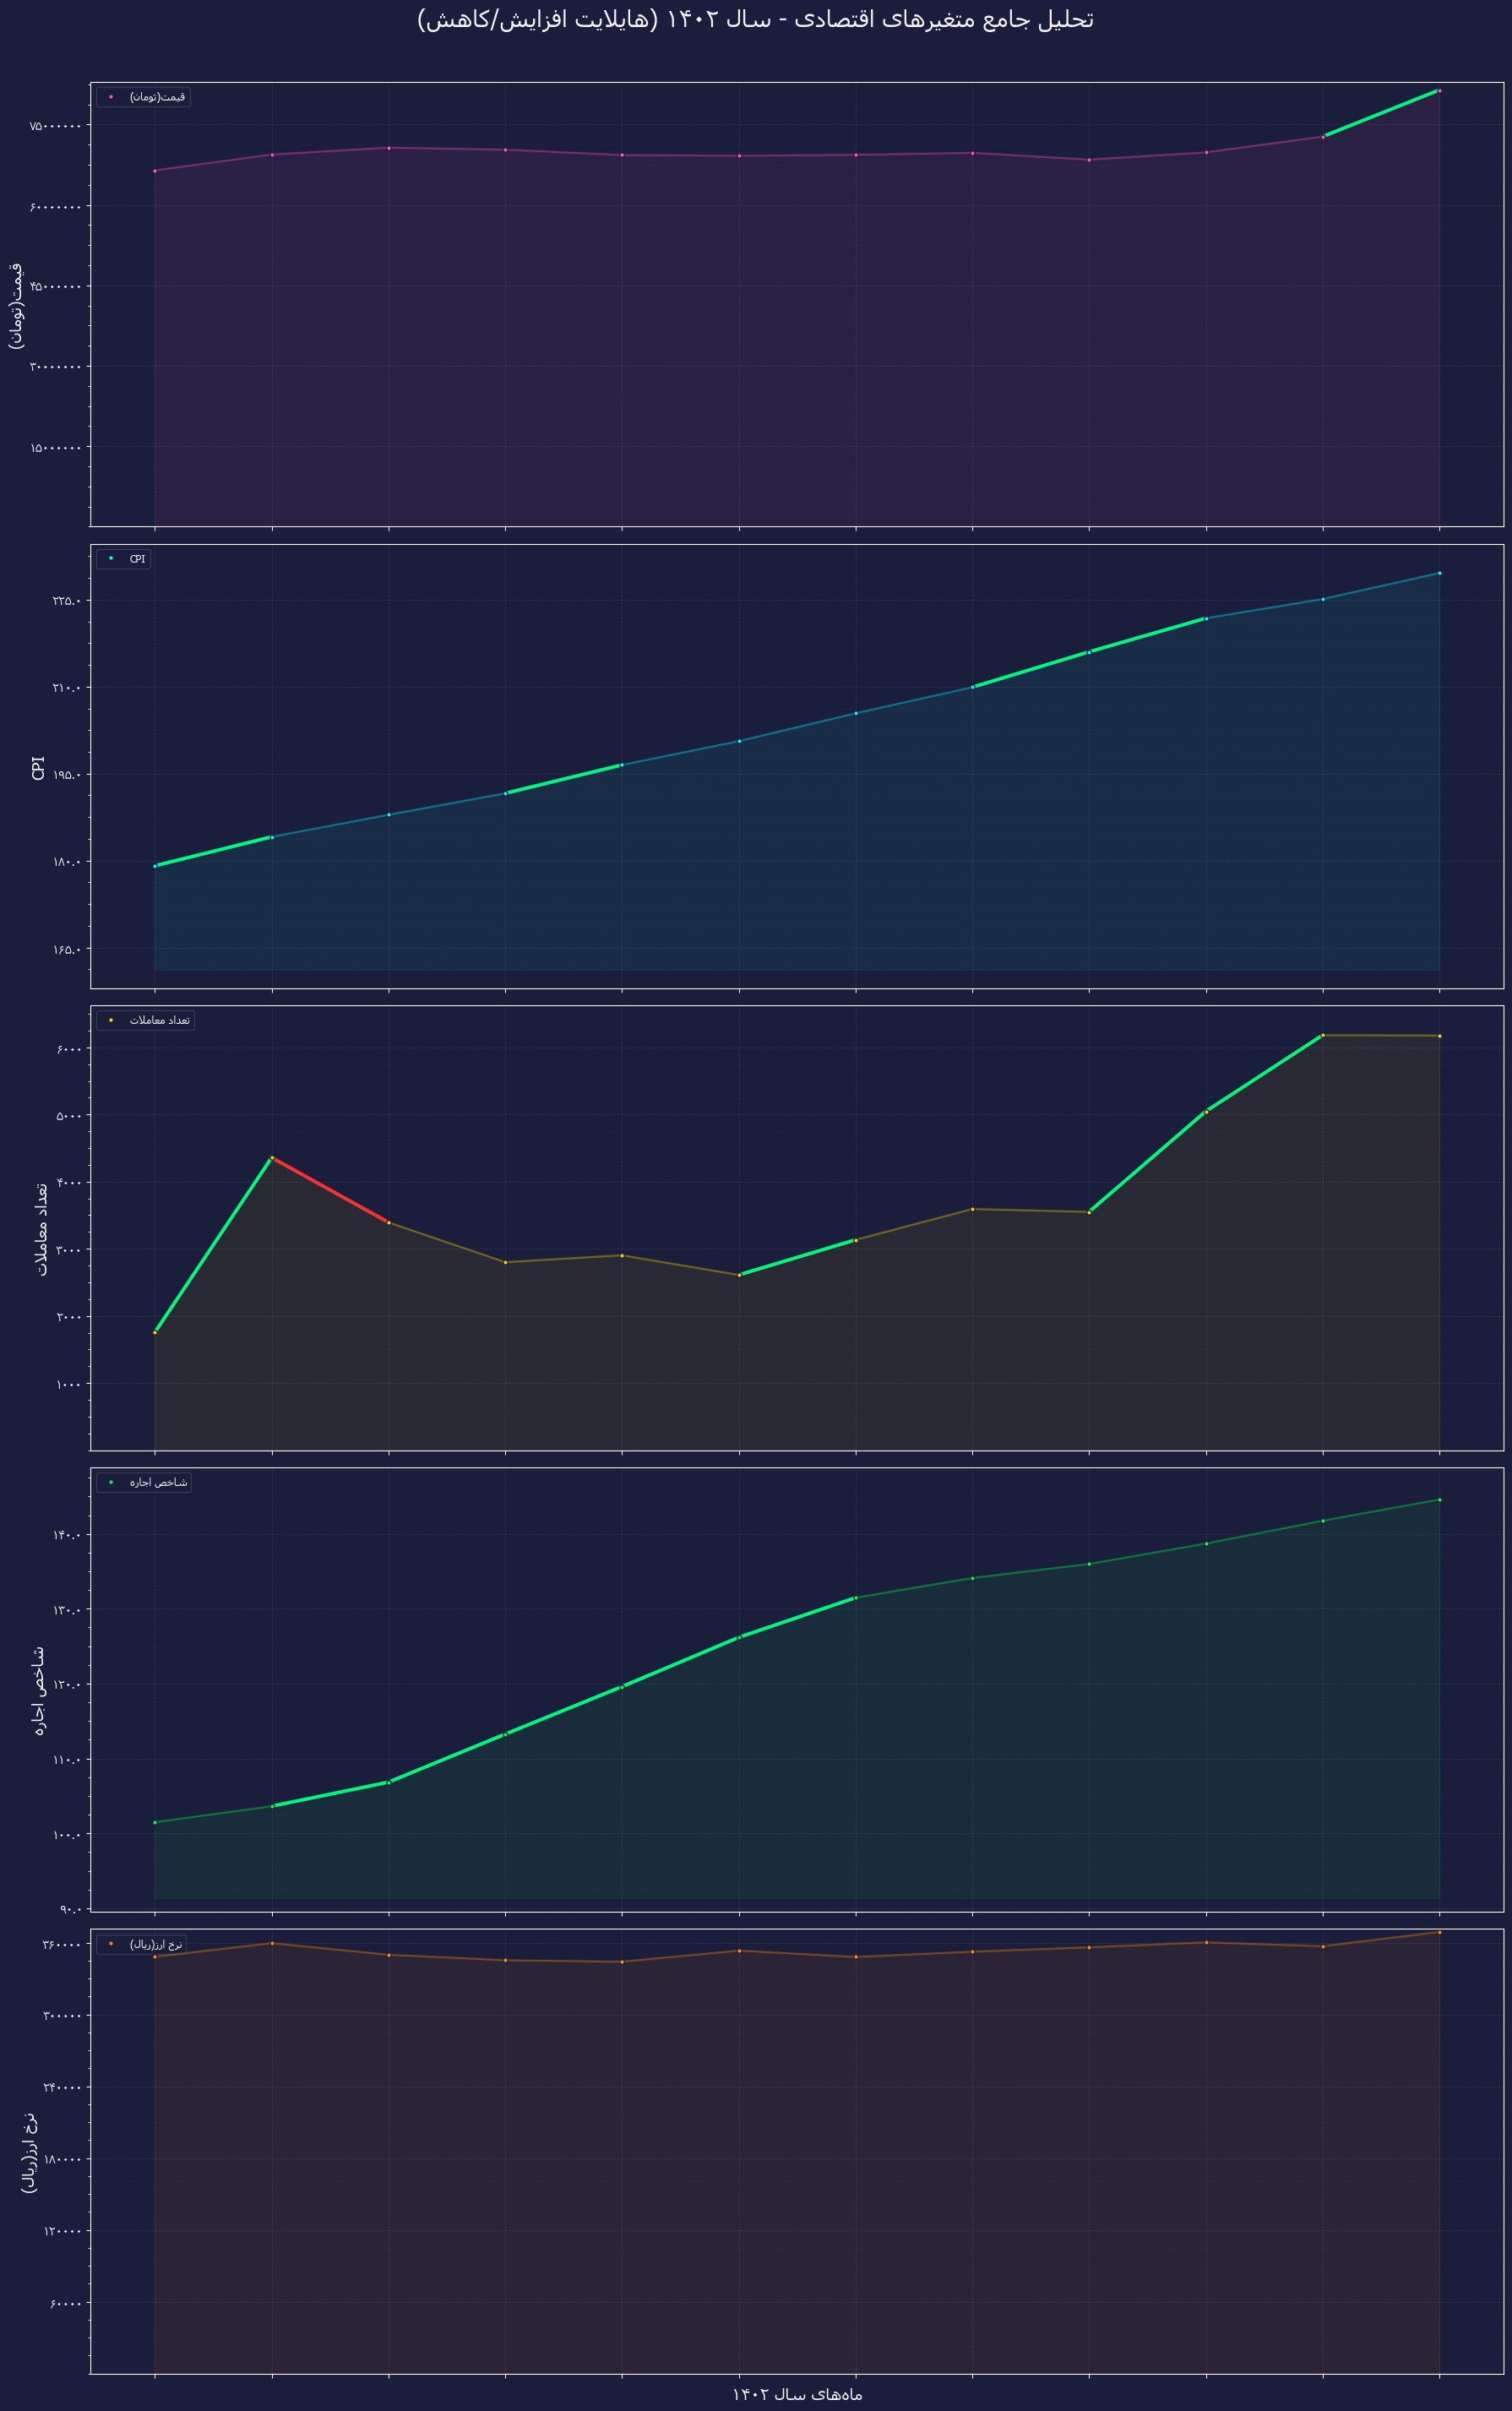

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FuncFormatter, MaxNLocator, AutoMinorLocator

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("هشدار: کتابخانه‌های arabic_reshaper یا python-bidi یافت نشدند.")
    print("برای نمایش صحیح متن فارسی، لطفاً آنها را نصب کنید: pip install arabic-reshaper python-bidi")

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
increase_highlight_color = '#00FF7F'  # سبز روشن برای افزایش
decrease_highlight_color = '#FF3131'  # قرمز روشن برای کاهش
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use


# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

# لیست ماه‌های فارسی برای مرتب‌سازی صحیح
persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text):
    if persian_text_support and isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    return text

def convert_to_persian_numerals(text_value):
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

# فرمت کننده ها برای محور Y
def large_int_y_tick_formatter(value, pos):
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos):
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

try:
    df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_full_data.empty:
        df_full_data = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_full_data.empty:
         df_full_data = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_full_data.empty:
        sorted_columns_all = sorted(df_full_data.columns, key=get_sort_key)
        df_all_variables_original = df_full_data[sorted_columns_all].head(10).copy()

        for col in df_all_variables_original.columns:
            if df_all_variables_original[col].dtype == 'object':
                df_all_variables_original[col] = df_all_variables_original[col].astype(str).str.replace(',', '', regex=False)
                df_all_variables_original[col] = pd.to_numeric(df_all_variables_original[col], errors='coerce')
        
        # --- فیلتر کردن داده‌ها برای سال 102 (1402 شمسی) ---
        columns_year_102 = [col for col in df_all_variables_original.columns if col.endswith("102")]
        
        if not columns_year_102:
            print(get_persian_display("خطا: هیچ ستونی برای سال 102 (1402 شمسی) در داده‌ها یافت نشد."))
        else:
            df_processed = df_all_variables_original[columns_year_102].copy() # استفاده از داده های فیلتر شده
            print(get_persian_display(f"داده‌ها برای سال 102 (1402 شمسی) فیلتر شدند. تعداد ماه‌ها: {len(columns_year_102)}"))

            variables_to_plot = {
                'قیمت(تومان)': {'color': '#FE53BB', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0},
                'CPI': {'color': '#08F7FE', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 2.5},
                'تعداد معاملات': {'color': '#F5D300', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 20.0},
                'شاخص اجاره': {'color': '#00ff41', 'formatter': index_y_tick_formatter, 'fill_base_factor': 0.9, 'change_threshold_pct': 3.0},
                'نرخ ارز(ریال)': {'color': '#FF8C00', 'formatter': large_int_y_tick_formatter, 'fill_base': 0, 'change_threshold_pct': 10.0}
            }
            
            plot_order = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']

            fig, axes = plt.subplots(len(plot_order), 1, figsize=(18, 30), sharex=True)
            
            time_periods = df_processed.columns.tolist() # استفاده از ستون های فیلتر شده
            x_numeric = np.arange(len(time_periods))

            for i, var_name in enumerate(plot_order):
                ax = axes[i]
                if var_name not in df_processed.index:
                    print(f"هشدار: ردیف '{var_name}' در دیتافریم سال 102 یافت نشد. این زیرنمودار خالی خواهد بود.")
                    ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                    ax.text(0.5, 0.5, get_persian_display("داده موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                    continue

                data_series = df_processed.loc[var_name].astype(float).interpolate()
                if data_series.empty:
                    print(f"سری داده برای '{var_name}' در سال 102 پس از پردازش خالی است.")
                    ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                    ax.text(0.5, 0.5, get_persian_display("داده برای نمایش موجود نیست"), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)
                    continue

                plot_config = variables_to_plot[var_name]
                original_series_color = plot_config['color']
                threshold_pct = plot_config['change_threshold_pct']

                pct_change = data_series.pct_change() * 100 
                significant_change_mask = (np.abs(pct_change) >= threshold_pct).fillna(False)
                
                # 1. افکت تابش کلی و بسیار ملایم (با رنگ اصلی سری)
                n_shades_glow = 5
                diff_linewidth_glow = 0.5
                alpha_value_glow = 0.02
                for n in range(1, n_shades_glow + 1):
                    ax.plot(x_numeric, data_series, linewidth=1.0 + (diff_linewidth_glow * n), alpha=alpha_value_glow,
                            color=original_series_color, linestyle='-', marker='', zorder=6)

                # 2. خط پایه (کم رنگ و نازک با رنگ اصلی سری)
                ax.plot(x_numeric, data_series, color=original_series_color, linewidth=1.5, linestyle='-', 
                        alpha=0.30, zorder=7)

                # 3. سگمنت های با تغییر شدید (با رنگ هایلایت افزایش/کاهش)
                for k in range(1, len(x_numeric)):
                    if significant_change_mask.iloc[k]:
                        segment_color = increase_highlight_color if pct_change.iloc[k] > 0 else decrease_highlight_color
                        ax.plot(x_numeric[k-1:k+1], data_series.iloc[k-1:k+1], 
                                color=segment_color, 
                                linewidth=3.0, 
                                linestyle='-', 
                                alpha=0.95,
                                zorder=8) 

                # 4. مارکرها در تمام نقاط داده (با رنگ اصلی سری)
                ax.plot(x_numeric, data_series, color=original_series_color, linewidth=0, 
                        marker='o', markersize=4, markerfacecolor=original_series_color, markeredgecolor=new_background_color,
                        label=get_persian_display(var_name), zorder=10)

                fill_base_val = 0
                if 'fill_base' in plot_config:
                    fill_base_val = plot_config['fill_base']
                elif 'fill_base_factor' in plot_config:
                    min_val = data_series.min()
                    fill_base_val = (min_val * plot_config['fill_base_factor']) if not pd.isna(min_val) and min_val > 0 else 0
                
                ax.fill_between(x_numeric, data_series, fill_base_val, color=original_series_color, alpha=0.07, zorder=5)

                ax.set_ylabel(get_persian_display(var_name), fontsize=14)
                ax.yaxis.set_major_locator(MaxNLocator(nbins=7, prune='both'))
                ax.yaxis.set_major_formatter(FuncFormatter(plot_config['formatter']))
                ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                ax.tick_params(axis='y', labelsize=10)

                padding_factor = 0.10 
                data_min_val = data_series.min() if not data_series.empty else 0
                data_max_val = data_series.max() if not data_series.empty else 1
                
                range_val = data_max_val - data_min_val
                if pd.isna(range_val) or range_val == 0 : range_val = abs(data_max_val * 0.2) if (not pd.isna(data_max_val) and data_max_val != 0) else 0.2
                
                current_bottom = data_min_val - (range_val * padding_factor) if not pd.isna(data_min_val) else 0
                current_top = data_max_val + (range_val * padding_factor) if not pd.isna(data_max_val) else 1

                if fill_base_val == 0 and (not pd.isna(data_min_val) and data_min_val >= 0):
                    current_bottom = 0
                elif 'fill_base_factor' in plot_config and (not pd.isna(fill_base_val)) and (not pd.isna(current_bottom)) and fill_base_val < current_bottom :
                     current_bottom = fill_base_val * 0.98 

                ax.set_ylim(bottom = current_bottom, top = current_top)
                ax.grid(which='major', linestyle='--', linewidth='0.6', color=grid_color, alpha=0.6)
                ax.grid(which='minor', linestyle=':', linewidth='0.4', color=grid_color, alpha=0.3)
                
                handles, labels = ax.get_legend_handles_labels()
                if handles:
                     legend_main = ax.legend([handles[0]], [labels[0]], loc='upper left', fontsize=9, 
                                             facecolor=new_background_color, edgecolor=grid_color)


            if len(x_numeric) > 0 and len(axes) > 0:
                # فقط نام ماه ها بدون سال برای برچسب محور X
                processed_time_periods_year_102 = [get_persian_display(tp.replace(" 102", "")) for tp in time_periods]
                
                axes[-1].set_xticks(x_numeric) # نمایش تیک برای هر ماه
                axes[-1].set_xticklabels(processed_time_periods_year_102, rotation=45, ha='right', fontsize=10, fontname=font_name_to_use)
                axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)
            
                for ax_idx in range(len(axes) - 1):
                    axes[ax_idx].set_xticklabels([])
            elif len(axes) > 0:
                 axes[-1].set_xlabel(get_persian_display('ماه‌های سال ۱۴۰۲'), fontsize=14)

            fig.suptitle(get_persian_display('تحلیل جامع متغیرهای اقتصادی - سال ۱۴۰۲ (هایلایت افزایش/کاهش)'), fontsize=20)
            fig.tight_layout(rect=[0, 0.03, 1, 0.97]) 
            plt.show()
            
    else:
        print(get_persian_display(f"خطا: فایل '{file_path}' پس از تلاش با انکودینگ های مختلف، خالی یا به درستی خوانده نشد."))

except FileNotFoundError:
    print(get_persian_display(f"خطا: فایل '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید."))
except pd.errors.EmptyDataError:
    print(get_persian_display(f"خطا: فایل '{file_path}' خالی است یا فرمت صحیحی ندارد."))
except Exception as e:
    print(get_persian_display(f"خطای دیگری در پردازش داده‌ها یا رسم نمودار رخ داد: {e}"))



## تحلیل و بررسی و پیش بینی 


--- Selected data for VAR model (first 5 observations): ---
             قیمت(تومان)    CPI  تعداد معاملات  شاخص اجاره  نرخ ارز(ریال)
زمان                                                                     
فروردین 96     4370000.0  107.1         5384.0       109.6        37000.0
اردیبهشت 96    4530000.0  107.1        16374.0       109.0        37000.0
خرداد 96       4560000.0  107.8        15362.0       109.7        37000.0
تیر 96         4620000.0  107.5        14533.0       107.3        37000.0
مرداد 96       4670000.0  107.7        17984.0       107.5        38000.0

--- Stationarizing variables ---

Processing variable: قیمت(تومان)
Applying log transform for: قیمت(تومان)
Augmented Dickey-Fuller Test Results for series: قیمت(تومان) (log)
ADF Test Statistic : -2.294229516623369
p-value : 0.17383582207965614
#Lags Used : 12
Number of Observations Used : 76
Result: Data is non-stationary.
Augmented Dickey-Fuller Test Results for series: قیمت(تومان) (log) (diff1)
ADF Test Statistic :

C:\Users\Foadglb\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Foadglb\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Foadglb\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Foadglb\AppData\Roaming\Python\Python312\site-packag

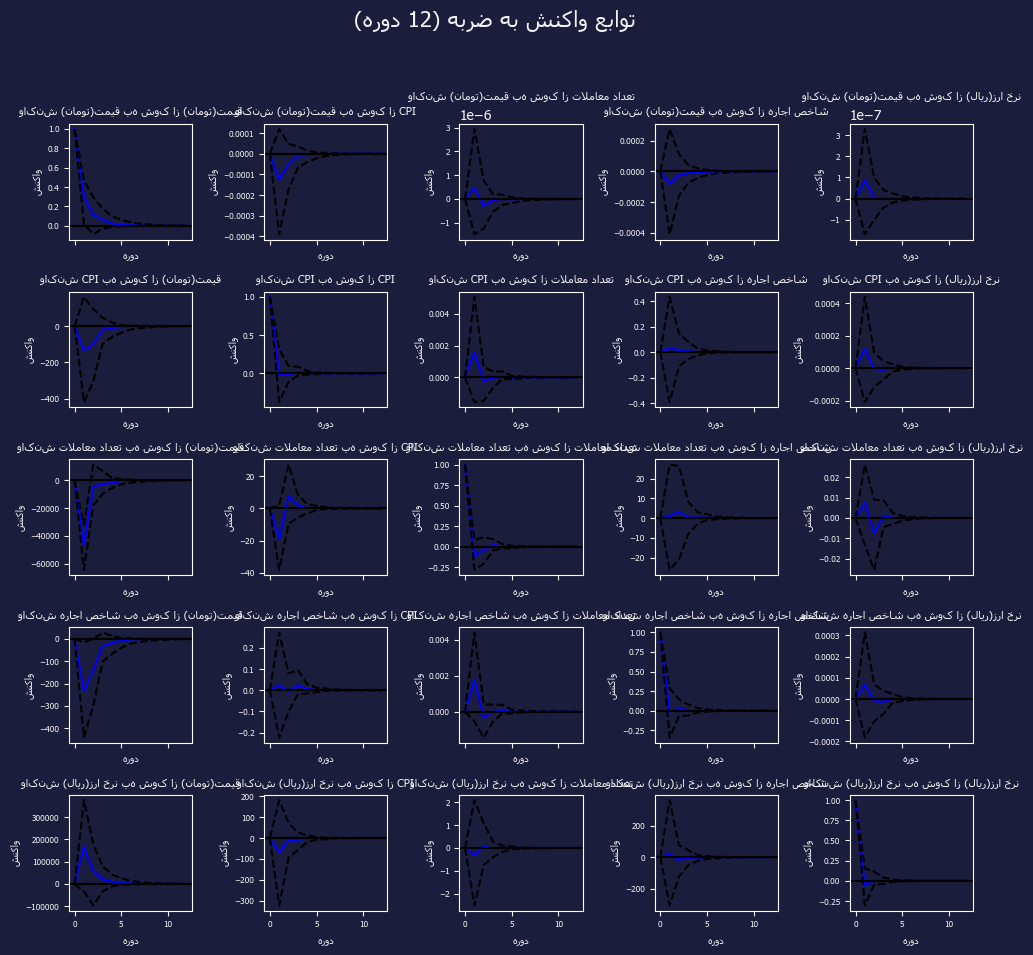


--- Forecasting with VAR model ---

--- Final forecasts in original scale: ---
              قیمت(تومان)_orig_forecast  CPI_orig_forecast  \
شهریور 103                 9.100867e+07         266.383420   
مهر 103                    9.389630e+07         270.112197   
آبان 103                   9.700974e+07         272.180109   
آذر 103                    1.003143e+08         274.135958   
دی 103                     1.037621e+08         275.943822   
بهمن 103                   1.073415e+08         277.669714   
اسفند 103                  1.110508e+08         279.372779   
فروردین 104                1.148910e+08         281.064784   
اردیبهشت 104               1.188651e+08         282.751594   
خرداد 104                  1.229773e+08         284.436428   
تیر 104                    1.272318e+08         286.120411   
مرداد 104                  1.316337e+08         287.804021   

              تعداد معاملات_orig_forecast  شاخص اجاره_orig_forecast  \
شهریور 103                    4566.463536 

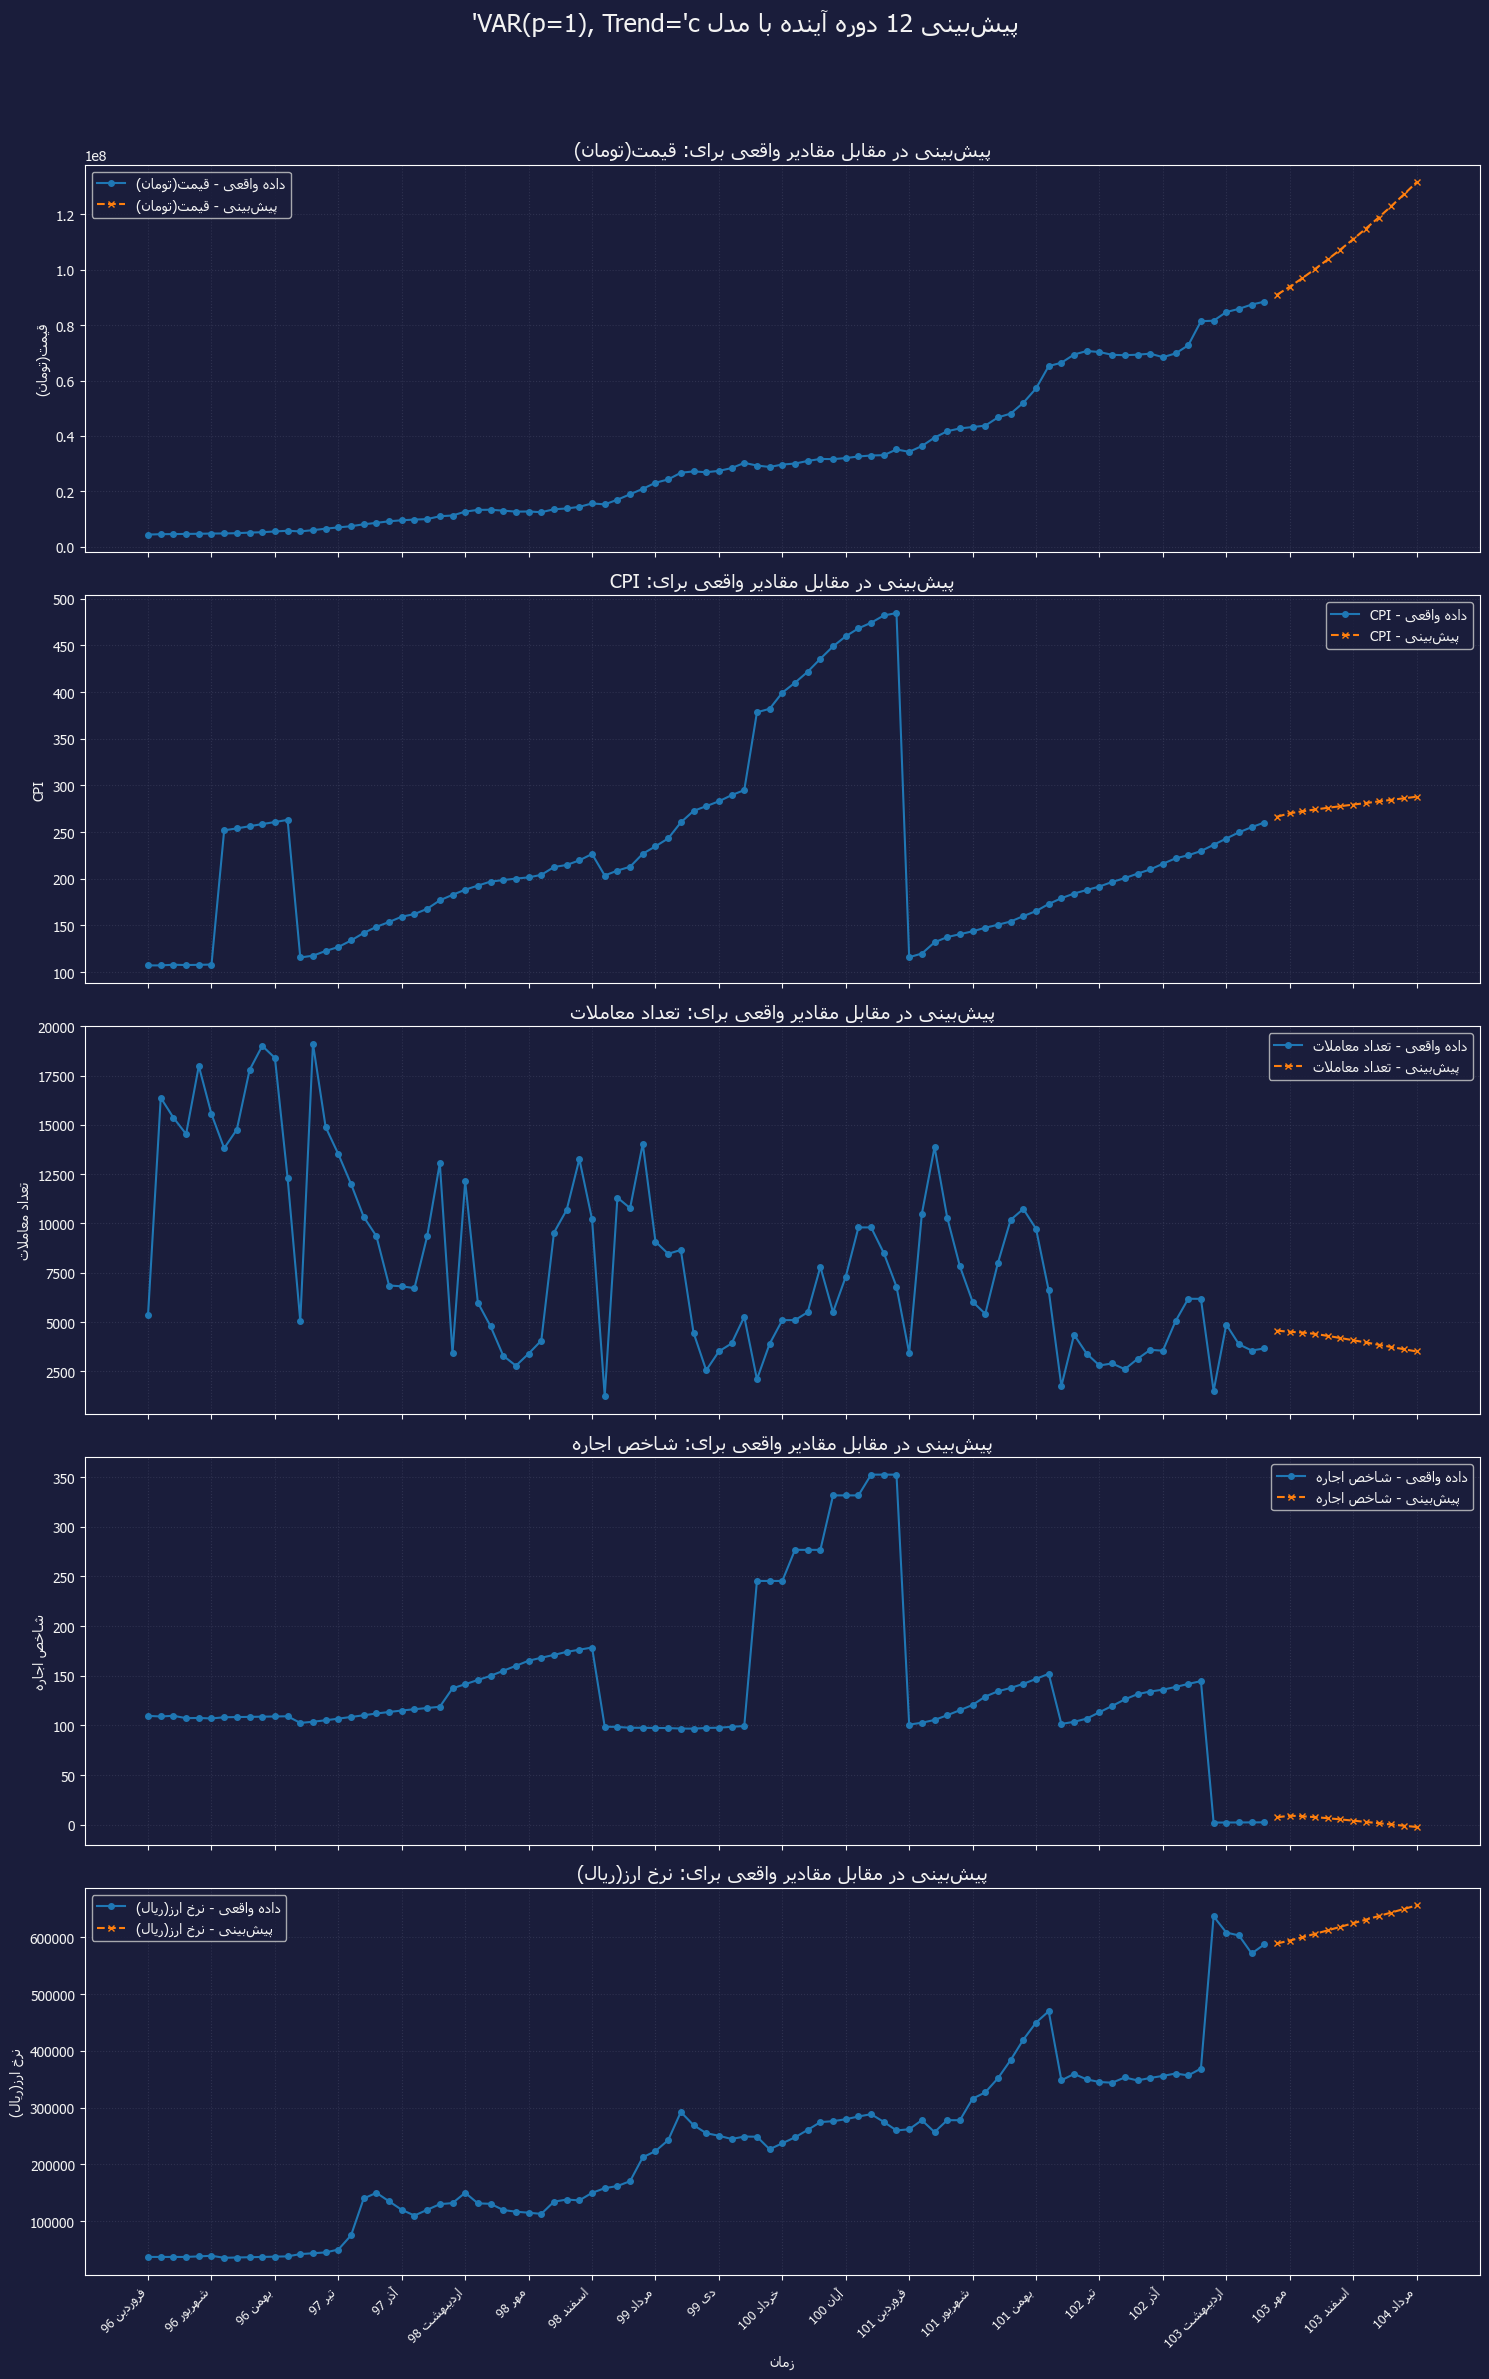

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import aic, bic
# import warnings
# from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
# warnings.simplefilter('ignore', ValueWarning)
# warnings.simplefilter('ignore', ConvergenceWarning)

# کتابخانه های لازم برای نمایش صحیح فارسی
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    persian_text_support = True
except ImportError:
    persian_text_support = False
    print("Warning: 'arabic_reshaper' or 'python-bidi' libraries not found.") # English
    print("Persian text in plots might not display correctly. Please install them: pip install arabic-reshaper python-bidi") # English

# --- اعمال استایل تیره و جذاب ---
plt.style.use("dark_background")

new_background_color = '#1A1D3B'
text_color_on_dark = '0.95'

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color', 'legend.labelcolor']:
    plt.rcParams[param] = text_color_on_dark

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = new_background_color

grid_color = '#3C3F5D'
increase_highlight_color = '#00FF7F'
decrease_highlight_color = '#FF3131'
font_name_to_use = 'Tahoma' 
plt.rcParams['font.family'] = font_name_to_use


# نام فایل CSV شما
file_path = 'microeconomics_project new.csv'

persian_months_order = [
    'فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
    'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند'
]

def get_sort_key(column_name):
    match = re.match(r'(\D+)\s*(\d+)', column_name)
    if match:
        month_name = match.group(1).strip()
        year = int(match.group(2))
        if month_name in persian_months_order:
            month_index = persian_months_order.index(month_name)
            return (year, month_index)
    return (float('inf'), float('inf'))

def get_persian_display(text): # This function is for plot labels, keep as is.
    if persian_text_support and isinstance(text, str):
        try: return get_display(arabic_reshaper.reshape(text))
        except Exception: return text
    return text

def convert_to_persian_numerals(text_value): # This function is for plot labels, keep as is.
    text_str = str(text_value)
    text_str = text_str.replace(',', '')
    persian_numerals_map = str.maketrans("0123456789.-", "۰۱۲۳۴۵۶۷۸۹.-")
    return text_str.translate(persian_numerals_map)

def large_int_y_tick_formatter(value, pos): # For plot labels
    formatted_value = f'{int(value):,}'
    return convert_to_persian_numerals(formatted_value)

def index_y_tick_formatter(value, pos): # For plot labels
    formatted_value = f'{value:.1f}'
    return convert_to_persian_numerals(formatted_value)

def adf_test(series, name=''): # Modified for English terminal output
    # Name can still be Persian if it's a column name, get_persian_display is for plots
    print(f'Augmented Dickey-Fuller Test Results for series: {name}') 
    is_stationary = False
    series_dropna = series.dropna()
    if len(series_dropna) < 15:
        print(f"Not enough observations for {name} to perform ADF test ({len(series_dropna)}).") # English
        return False
    try:
        result = adfuller(series_dropna, autolag='AIC')
        labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
        for value,label_en in zip(result,labels):
            print(f"{label_en} : {value}")
        if result[1] <= 0.05:
            print("Result: Data is stationary.") # English
            is_stationary = True
        else:
            print("Result: Data is non-stationary.") # English
    except Exception as e:
        print(f"Error during ADF test for {name}: {e}") # English
    return is_stationary

def robust_inverse_transform(original_series_hist, forecast_stationary_array, is_log, diff_order):
    if diff_order < 0: raise ValueError("Differencing order cannot be negative")
    base_series_for_inv = np.log(original_series_hist.replace(0, 1e-9)) if is_log else original_series_hist.copy()
    forecast_values = forecast_stationary_array.copy()
    if diff_order == 2:
        last_val_diff1 = base_series_for_inv.diff().iloc[-1]
        forecast_values = last_val_diff1 + forecast_values.cumsum()
        diff_order = 1 # Reduce order for next step
        
    if diff_order == 1:
        last_val_level = base_series_for_inv.iloc[-1]
        forecast_values = last_val_level + forecast_values.cumsum()
    
    if is_log:
        forecast_values = np.exp(forecast_values)
    return forecast_values

# --- بدنه اصلی کد ---
try:
    df_raw = pd.read_csv(file_path, index_col=0, encoding='utf-8')
    if df_raw.empty: df_raw = pd.read_csv(file_path, index_col=0, encoding='utf-8-sig')
    if df_raw.empty: df_raw = pd.read_csv(file_path, index_col=0, encoding='cp1256')

    if not df_raw.empty:
        sorted_columns = sorted(df_raw.columns, key=get_sort_key)
        df_processed_rows_as_vars = df_raw[sorted_columns].head(10).copy()

        for col_name_iter in df_processed_rows_as_vars.columns:
            if df_processed_rows_as_vars[col_name_iter].dtype == 'object':
                df_processed_rows_as_vars[col_name_iter] = df_processed_rows_as_vars[col_name_iter].astype(str).str.replace(',', '', regex=False)
                df_processed_rows_as_vars[col_name_iter] = pd.to_numeric(df_processed_rows_as_vars[col_name_iter], errors='coerce')
        
        var_list = ['قیمت(تومان)', 'CPI', 'تعداد معاملات', 'شاخص اجاره', 'نرخ ارز(ریال)']
        df_var_input_original = df_processed_rows_as_vars.loc[var_list].T.copy()
        df_var_input_original.index.name = 'زمان'
        df_var_input_original.dropna(how='any', inplace=True)

        if df_var_input_original.empty or len(df_var_input_original) < 30:
             print(f"Error: Not enough data ({len(df_var_input_original)} observations) for VAR model after initial NaN drop.") # English
        else:
            print("\n--- Selected data for VAR model (first 5 observations): ---") # English
            print(df_var_input_original.head())
            
            print("\n--- Stationarizing variables ---") # English
            transformed_series_dict = {}
            transformations = {} 
            
            for name in df_var_input_original.columns:
                print(f"\nProcessing variable: {name}") # Variable name will be Persian
                series_orig = df_var_input_original[name].copy()
                current_series_for_stationarity_check = series_orig.copy()
                is_log = False
                num_d = 0
                is_stationary_final = False

                if name == 'قیمت(تومان)':
                    print(f"Applying log transform for: {name}") # English
                    current_series_for_stationarity_check = np.log(current_series_for_stationarity_check.mask(current_series_for_stationarity_check <= 0, 1e-9)).dropna()
                    is_log = True
                
                for d_order in range(3): 
                    adf_name_suffix = f"{' (log)' if is_log else ''}{' (diff'+str(d_order)+')' if d_order > 0 else ''}"
                    temp_series_to_test = current_series_for_stationarity_check.copy()
                    if d_order > 0:
                        if temp_series_to_test.empty: break 
                        temp_series_to_test = current_series_for_stationarity_check.diff(periods=d_order).dropna()
                    
                    if temp_series_to_test.empty or len(temp_series_to_test) < 15:
                        print(f"Series {name}{adf_name_suffix} became too short for ADF test after {d_order} differences.") # English
                        break 
                    if adf_test(temp_series_to_test, name=name + adf_name_suffix): # adf_test now prints English
                        is_stationary_final = True
                        num_d = d_order
                        transformed_series_dict[name] = temp_series_to_test
                        break 
                
                transformations[name] = {'log': is_log, 'diff': num_d, 'stationary': is_stationary_final}
                if not is_stationary_final:
                    print(f"CRITICAL WARNING: Variable {name} did not become stationary and will be excluded from the model.") # English

            valid_stationary_names = [name for name, props in transformations.items() if props['stationary']]
            if len(valid_stationary_names) < 2:
                print("Error: Not enough stationary variables for VAR model (minimum 2 required).") # English
            else:
                df_stationary_list = [transformed_series_dict[name].rename(name) for name in valid_stationary_names]
                df_stationary = pd.concat(df_stationary_list, axis=1, join='inner')
                final_var_columns = df_stationary.columns.tolist()

                if df_stationary.empty or len(df_stationary) < 20:
                    print(f"Error: Not enough data ({len(df_stationary)} observations, {df_stationary.shape[1]} variables) for VAR model after alignment.") # English
                else:
                    print("\n--- Final stationarized data for VAR model (first 5 observations): ---") # English
                    print(df_stationary.head())

                    print("\n--- Selecting optimal lag order for VAR model ---") # English
                    max_lags_to_test = min(6, len(df_stationary) // (len(final_var_columns) +1 ) -1 ) 
                    if max_lags_to_test < 1: max_lags_to_test = 1
                    
                    var_model_for_lag_selection = VAR(df_stationary)
                    best_lag = 1 
                    try:
                        selected_orders = var_model_for_lag_selection.select_order(maxlags=max_lags_to_test)
                        print("\nLag Order Selection Summary:") # English
                        print(selected_orders.summary())
                        chosen_lag_aic = selected_orders.aic
                        if chosen_lag_aic > 0 and chosen_lag_aic <= max_lags_to_test:
                            best_lag = int(chosen_lag_aic)
                            print(f"\nOptimal lag order selected (based on AIC): {best_lag}") # English
                        else:
                            best_lag = 1 
                            print(f"\nAIC did not suggest a reasonable lag. Defaulting to lag: {best_lag}") # English
                        if best_lag == 0: best_lag = 1 
                    except Exception as e_lag:
                        print(f"Error during automatic lag selection: {e_lag}. Defaulting to lag 1.") # English
                        best_lag = 1
                    print(f"Final lag order for model fitting: {best_lag}") # English

                    print("\n--- Fitting VAR model ---") # English
                    trend_param = 'c' 
                    print(f"Fitting VAR model with trend parameter: '{trend_param}'") # English
                    model_to_fit = VAR(df_stationary)
                    var_model_fitted = model_to_fit.fit(maxlags=best_lag, ic=None, trend=trend_param)
                    print(var_model_fitted.summary()) # This summary will have Persian column names

                    if best_lag > 0:
                        print("\n--- Granger Causality Test ---") # English
                        try:
                            for col_caused in final_var_columns:
                                for col_causing in final_var_columns:
                                    if col_caused == col_causing: continue
                                    # Variable names (col_caused, col_causing) will be Persian
                                    print(f"\nGranger causality test: Does '{col_causing}' Granger-cause '{col_caused}'? (up to lag {best_lag})") # English
                                    test_result = var_model_fitted.test_causality(col_caused, [col_causing], kind='f')
                                    # Accessing results from WaldTestResults object
                                    f_value = test_result.test_statistic
                                    p_value = test_result.pvalue
                                    df_num = test_result.df_num
                                    # df_denom might not be directly available or named consistently across versions for test_causality's specific result.
                                    # The summary table usually has it. test_result.summary() might be better if direct attributes are tricky.
                                    print(f"  F-Statistic: {f_value:.4f}, p-value: {p_value:.4f}, df_num: {df_num}")
                                    if p_value <= 0.05: print("  Result: Null hypothesis (no causality) rejected.") # English
                                    else: print("  Result: Null hypothesis (no causality) NOT rejected.") # English
                        except Exception as e_causal:
                            print(f"Error during Granger causality test: {e_causal}") # English

                        print("\n--- Impulse Response Functions (IRFs) ---") # English
                        irf_periods = 12
                        try:
                            irf = var_model_fitted.irf(periods=irf_periods)
                            fig_irf = irf.plot(orth=False, signif=0.05, plot_stderr=True, stderr_type='mc', subplot_params={'fontsize':7})
                            all_axes_in_fig = fig_irf.get_axes()
                            num_vars_in_var = len(final_var_columns)
                            if num_vars_in_var > 0:
                                for idx, ax_irf_single in enumerate(all_axes_in_fig):
                                    response_var_idx = idx // num_vars_in_var
                                    impulse_var_idx = idx % num_vars_in_var
                                    if response_var_idx < num_vars_in_var and impulse_var_idx < num_vars_in_var:
                                        response_var = get_persian_display(final_var_columns[response_var_idx]) # Persian for plot
                                        impulse_var = get_persian_display(final_var_columns[impulse_var_idx]) # Persian for plot
                                        ax_irf_single.set_title(f"واکنش {response_var} به شوک از {impulse_var}", fontsize=8) # Persian for plot
                                    ax_irf_single.set_xlabel(get_persian_display("دوره"), fontsize=7) # Persian for plot
                                    ax_irf_single.set_ylabel(get_persian_display("واکنش"), fontsize=7) # Persian for plot
                                    ax_irf_single.tick_params(axis='both', which='major', labelsize=6)
                            fig_irf.suptitle(get_persian_display(f"توابع واکنش به ضربه ({irf_periods} دوره)"), fontsize=16) # Persian for plot
                            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                            plt.show()
                        except Exception as e_irf:
                            print(f"Error plotting IRF: {e_irf}") # English
                    else:
                        print("\nGranger causality and IRF analysis not performed due to lag order being zero.") # English

                    print("\n--- Forecasting with VAR model ---") # English
                    forecast_steps = 12
                    
                    if best_lag == 0: 
                        forecast_stationary_arr = np.tile(df_stationary.mean(axis=0).values, (forecast_steps, 1))
                    else:
                        lagged_values_stationary = df_stationary.values[-best_lag:]
                        forecast_stationary_arr = var_model_fitted.forecast(y=lagged_values_stationary, steps=forecast_steps)
                    
                    last_original_index_label = df_var_input_original.index[-1]
                    forecast_index_labels = []
                    match_last_period = re.match(r'(\D+)\s*(\d+)', last_original_index_label)
                    if match_last_period:
                        last_month_str, last_year_str = match_last_period.groups()
                        current_month_idx = persian_months_order.index(last_month_str.strip())
                        current_year = int(last_year_str)
                        for _ in range(forecast_steps):
                            current_month_idx += 1
                            if current_month_idx == 12:
                                current_month_idx = 0; current_year += 1
                            forecast_index_labels.append(f"{persian_months_order[current_month_idx]} {current_year}") # Persian index for DataFrame
                    
                    df_forecast_final = pd.DataFrame(index=forecast_index_labels)

                    for name in final_var_columns:
                        original_series_hist_for_inv = df_var_input_original[name]
                        forecast_stat_for_col = forecast_stationary_arr[:, final_var_columns.index(name)]
                        is_log = transformations[name]['log']
                        diff_order = transformations[name]['diff']
                        
                        df_forecast_final[name + '_orig_forecast'] = robust_inverse_transform(
                                                                        original_series_hist_for_inv, 
                                                                        forecast_stat_for_col, 
                                                                        is_log, 
                                                                        diff_order)
                    
                    print("\n--- Final forecasts in original scale: ---") # English
                    print(df_forecast_final) # Column names will be Persian_orig_forecast

                    n_vars_to_plot_fc = len(final_var_columns)
                    fig_forecast, axes_forecast = plt.subplots(n_vars_to_plot_fc, 1, figsize=(15, 5 * n_vars_to_plot_fc), sharex=True)
                    if n_vars_to_plot_fc == 1: axes_forecast = [axes_forecast]
                    
                    x_actual_labels = df_var_input_original.index.tolist()
                    x_forecast_labels = df_forecast_final.index.tolist()
                    
                    combined_plot_labels_x = x_actual_labels + x_forecast_labels
                    combined_plot_indices_x = np.arange(len(combined_plot_labels_x))

                    for k_fc, col_name_fc in enumerate(final_var_columns):
                        ax_fc = axes_forecast[k_fc]
                        actual_data_to_plot = df_var_input_original[col_name_fc]
                        forecast_data_to_plot = df_forecast_final[col_name_fc + '_orig_forecast']
                        
                        x_plot_actual_current = np.arange(len(actual_data_to_plot))
                        x_plot_forecast_current = np.arange(len(actual_data_to_plot), len(actual_data_to_plot) + forecast_steps)

                        ax_fc.plot(x_plot_actual_current, actual_data_to_plot.values, 
                                label=get_persian_display(f'داده واقعی - {col_name_fc}'), 
                                color='#1f77b4', marker='o', markersize=4)
                        
                        ax_fc.plot(x_plot_forecast_current, forecast_data_to_plot.values, 
                                label=get_persian_display(f'پیش‌بینی - {col_name_fc}'), 
                                color='#ff7f0e', linestyle='--', marker='x', markersize=5)
                        
                        ax_fc.set_title(get_persian_display(f'پیش‌بینی در مقابل مقادیر واقعی برای: {col_name_fc}'), fontsize=14)
                        ax_fc.set_ylabel(get_persian_display(col_name_fc))
                        ax_fc.legend(loc='best')
                        ax_fc.grid(True, linestyle=':', alpha=0.6, color=grid_color)

                    num_total_display_points_fc = len(combined_plot_indices_x)
                    step_x_fc = 1 if num_total_display_points_fc <= 30 else max(1, num_total_display_points_fc // 20) 
                    
                    tick_positions_for_fc_plot = combined_plot_indices_x[::step_x_fc]
                    tick_labels_for_fc_plot = [get_persian_display(combined_plot_labels_x[int(pos_idx)]) for pos_idx in tick_positions_for_fc_plot if int(pos_idx) < len(combined_plot_labels_x)]
                    
                    if len(combined_plot_indices_x) > 0:
                        if combined_plot_indices_x[0] not in tick_positions_for_fc_plot:
                            tick_positions_for_fc_plot = np.insert(tick_positions_for_fc_plot, 0, combined_plot_indices_x[0])
                            tick_labels_for_fc_plot.insert(0, get_persian_display(combined_plot_labels_x[0]))
                        
                        is_last_tick_present_in_fc = combined_plot_indices_x[-1] in tick_positions_for_fc_plot
                        if not is_last_tick_present_in_fc and (not tick_positions_for_fc_plot.size or tick_positions_for_fc_plot[-1] < combined_plot_indices_x[-1]):
                            tick_positions_for_fc_plot = np.append(tick_positions_for_fc_plot, combined_plot_indices_x[-1])
                            if int(combined_plot_indices_x[-1]) < len(combined_plot_labels_x):
                                tick_labels_for_fc_plot.append(get_persian_display(combined_plot_labels_x[int(combined_plot_indices_x[-1])]))
                    
                    unique_tick_positions, unique_indices = np.unique(tick_positions_for_fc_plot, return_index=True)
                    final_tick_labels = [tick_labels_for_fc_plot[i] for i in unique_indices]

                    if n_vars_to_plot_fc > 0 and len(axes_forecast) > 0 and hasattr(axes_forecast[-1], 'set_xticks'):
                        axes_forecast[-1].set_xticks(unique_tick_positions)
                        axes_forecast[-1].set_xticklabels(final_tick_labels, rotation=45, ha='right', fontsize=9, fontname=font_name_to_use)
                        axes_forecast[-1].set_xlabel(get_persian_display("زمان")) # Persian for plot

                    fig_forecast.suptitle(get_persian_display(f"پیش‌بینی {forecast_steps} دوره آینده با مدل VAR(p={best_lag}), Trend='{trend_param}'"), fontsize=18) # Persian for plot
                    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                    plt.show()
    else:
        print(f"Error: File '{file_path}' is empty or could not be read correctly.") # English

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.") # English
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.") # English
except Exception as e:
    print(f"An unexpected error occurred: {e}") # English
    import traceback
    traceback.print_exc()

